# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 99525 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 99525) |           | Elapsed Time: 0:00:04 ETA:  4 days, 17:09:04

  0% (  128 of 99525) |                    | Elapsed Time: 0:00:05 ETA:  0:13:00

  0% (  257 of 99525) |                    | Elapsed Time: 0:00:06 ETA:  0:12:55

  0% (  368 of 99525) |                    | Elapsed Time: 0:00:07 ETA:  0:13:30

  0% (  481 of 99525) |                    | Elapsed Time: 0:00:08 ETA:  0:13:46

  0% (  593 of 99525) |                    | Elapsed Time: 0:00:09 ETA:  0:13:55

  0% (  704 of 99525) |                    | Elapsed Time: 0:00:10 ETA:  0:14:04

  0% (  817 of 99525) |                    | Elapsed Time: 0:00:11 ETA:  0:14:07

  0% (  931 of 99525) |                    | Elapsed Time: 0:00:12 ETA:  0:14:08

  1% ( 1048 of 99525) |                    | Elapsed Time: 0:00:13 ETA:  0:14:06

  1% ( 1163 of 99525) |                    | Elapsed Time: 0:00:14 ETA:  0:14:15

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:14 ETA:  0:14:23

  1% ( 1363 of 99525) |                    | Elapsed Time: 0:00:15 ETA:  0:14:16

  1% ( 1486 of 99525) |                    | Elapsed Time: 0:00:16 ETA:  0:14:05

  1% ( 1602 of 99525) |                    | Elapsed Time: 0:00:17 ETA:  0:14:01

  1% ( 1690 of 99525) |                    | Elapsed Time: 0:00:18 ETA:  0:14:20

  1% ( 1814 of 99525) |                    | Elapsed Time: 0:00:19 ETA:  0:14:09

  1% ( 1924 of 99525) |                    | Elapsed Time: 0:00:20 ETA:  0:14:12

  2% ( 2037 of 99525) |                    | Elapsed Time: 0:00:21 ETA:  0:14:15

  2% ( 2156 of 99525) |                    | Elapsed Time: 0:00:22 ETA:  0:14:10

  2% ( 2274 of 99525) |                    | Elapsed Time: 0:00:23 ETA:  0:14:10

  2% ( 2394 of 99525) |                    | Elapsed Time: 0:00:24 ETA:  0:14:08

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:00:25 ETA:  0:14:24

  2% ( 2593 of 99525) |                    | Elapsed Time: 0:00:26 ETA:  0:14:34

  2% ( 2704 of 99525) |                    | Elapsed Time: 0:00:27 ETA:  0:14:12

  2% ( 2814 of 99525) |                    | Elapsed Time: 0:00:28 ETA:  0:14:24

  2% ( 2927 of 99525) |                    | Elapsed Time: 0:00:29 ETA:  0:14:20

  3% ( 3040 of 99525) |                    | Elapsed Time: 0:00:30 ETA:  0:14:19

  3% ( 3153 of 99525) |                    | Elapsed Time: 0:00:31 ETA:  0:14:23

  3% ( 3266 of 99525) |                    | Elapsed Time: 0:00:32 ETA:  0:14:26

  3% ( 3371 of 99525) |                    | Elapsed Time: 0:00:33 ETA:  0:14:40

  3% ( 3451 of 99525) |                    | Elapsed Time: 0:00:34 ETA:  0:15:00

  3% ( 3537 of 99525) |                    | Elapsed Time: 0:00:35 ETA:  0:15:17

  3% ( 3623 of 99525) |                    | Elapsed Time: 0:00:36 ETA:  0:15:43

  3% ( 3706 of 99525) |                    | Elapsed Time: 0:00:37 ETA:  0:16:11

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:00:38 ETA:  0:16:34

  3% ( 3821 of 99525) |                    | Elapsed Time: 0:00:39 ETA:  0:17:06

  3% ( 3880 of 99525) |                    | Elapsed Time: 0:00:40 ETA:  0:18:25

  3% ( 3973 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  0:18:56

  4% ( 4064 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:19:17

  4% ( 4154 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  0:18:58

  4% ( 4246 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:18:48

  4% ( 4338 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  0:18:37

  4% ( 4436 of 99525) |                    | Elapsed Time: 0:00:46 ETA:  0:18:13

  4% ( 4547 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  0:17:37

  4% ( 4652 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  0:17:13

  4% ( 4761 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  0:16:11

  4% ( 4873 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  0:15:49

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:00:51 ETA:  0:15:28

  5% ( 5103 of 99525) |#                   | Elapsed Time: 0:00:52 ETA:  0:14:50

  5% ( 5230 of 99525) |#                   | Elapsed Time: 0:00:53 ETA:  0:14:15

  5% ( 5357 of 99525) |#                   | Elapsed Time: 0:00:54 ETA:  0:13:43

  5% ( 5484 of 99525) |#                   | Elapsed Time: 0:00:55 ETA:  0:13:17

  5% ( 5612 of 99525) |#                   | Elapsed Time: 0:00:56 ETA:  0:13:03

  5% ( 5740 of 99525) |#                   | Elapsed Time: 0:00:57 ETA:  0:12:45

  5% ( 5868 of 99525) |#                   | Elapsed Time: 0:00:58 ETA:  0:12:29

  6% ( 5996 of 99525) |#                   | Elapsed Time: 0:00:59 ETA:  0:12:16

  6% ( 6125 of 99525) |#                   | Elapsed Time: 0:01:00 ETA:  0:12:03

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:01:00 ETA:  0:12:01

  6% ( 6349 of 99525) |#                   | Elapsed Time: 0:01:01 ETA:  0:11:59

  6% ( 6481 of 99525) |#                   | Elapsed Time: 0:01:02 ETA:  0:11:55

  6% ( 6614 of 99525) |#                   | Elapsed Time: 0:01:03 ETA:  0:11:50

  6% ( 6723 of 99525) |#                   | Elapsed Time: 0:01:04 ETA:  0:12:01

  6% ( 6834 of 99525) |#                   | Elapsed Time: 0:01:05 ETA:  0:12:13

  6% ( 6895 of 99525) |#                   | Elapsed Time: 0:01:07 ETA:  0:13:04

  7% ( 7010 of 99525) |#                   | Elapsed Time: 0:01:08 ETA:  0:13:15

  7% ( 7125 of 99525) |#                   | Elapsed Time: 0:01:09 ETA:  0:13:26

  7% ( 7240 of 99525) |#                   | Elapsed Time: 0:01:10 ETA:  0:13:33

  7% ( 7358 of 99525) |#                   | Elapsed Time: 0:01:11 ETA:  0:13:40

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:01:11 ETA:  0:13:55

  7% ( 7584 of 99525) |#                   | Elapsed Time: 0:01:12 ETA:  0:14:08

  7% ( 7703 of 99525) |#                   | Elapsed Time: 0:01:13 ETA:  0:13:58

  7% ( 7820 of 99525) |#                   | Elapsed Time: 0:01:14 ETA:  0:13:51

  7% ( 7936 of 99525) |#                   | Elapsed Time: 0:01:15 ETA:  0:13:02

  8% ( 8051 of 99525) |#                   | Elapsed Time: 0:01:16 ETA:  0:13:01

  8% ( 8172 of 99525) |#                   | Elapsed Time: 0:01:17 ETA:  0:12:55

  8% ( 8297 of 99525) |#                   | Elapsed Time: 0:01:18 ETA:  0:12:46

  8% ( 8401 of 99525) |#                   | Elapsed Time: 0:01:20 ETA:  0:12:57

  8% ( 8491 of 99525) |#                   | Elapsed Time: 0:01:21 ETA:  0:13:16

  8% ( 8565 of 99525) |#                   | Elapsed Time: 0:01:22 ETA:  0:13:56

  8% ( 8638 of 99525) |#                   | Elapsed Time: 0:01:23 ETA:  0:14:41

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:01:23 ETA:  0:15:22

  8% ( 8786 of 99525) |#                   | Elapsed Time: 0:01:24 ETA:  0:16:08

  8% ( 8867 of 99525) |#                   | Elapsed Time: 0:01:25 ETA:  0:16:51

  9% ( 8982 of 99525) |#                   | Elapsed Time: 0:01:26 ETA:  0:16:58

  9% ( 9065 of 99525) |#                   | Elapsed Time: 0:01:27 ETA:  0:17:57

  9% ( 9148 of 99525) |#                   | Elapsed Time: 0:01:28 ETA:  0:18:28

  9% ( 9235 of 99525) |#                   | Elapsed Time: 0:01:30 ETA:  0:18:33

  9% ( 9325 of 99525) |#                   | Elapsed Time: 0:01:31 ETA:  0:18:07

  9% ( 9418 of 99525) |#                   | Elapsed Time: 0:01:32 ETA:  0:17:34

  9% ( 9526 of 99525) |#                   | Elapsed Time: 0:01:33 ETA:  0:16:50

  9% ( 9659 of 99525) |#                   | Elapsed Time: 0:01:34 ETA:  0:15:38

  9% ( 9785 of 99525) |#                   | Elapsed Time: 0:01:35 ETA:  0:14:46

  9% ( 9897 of 99525) |#                   | Elapsed Time: 0:01:36 ETA:  0:14:48

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:01:36 ETA:  0:14:23

 10% (10065 of 99525) |##                  | Elapsed Time: 0:01:37 ETA:  0:13:51

 10% (10174 of 99525) |##                  | Elapsed Time: 0:01:38 ETA:  0:13:27

 10% (10226 of 99525) |##                  | Elapsed Time: 0:01:39 ETA:  0:14:04

 10% (10334 of 99525) |##                  | Elapsed Time: 0:01:40 ETA:  0:13:47

 10% (10435 of 99525) |##                  | Elapsed Time: 0:01:41 ETA:  0:13:53

 10% (10517 of 99525) |##                  | Elapsed Time: 0:01:42 ETA:  0:14:48

 10% (10614 of 99525) |##                  | Elapsed Time: 0:01:43 ETA:  0:15:22

 10% (10711 of 99525) |##                  | Elapsed Time: 0:01:44 ETA:  0:15:40

 10% (10807 of 99525) |##                  | Elapsed Time: 0:01:45 ETA:  0:15:48

 10% (10918 of 99525) |##                  | Elapsed Time: 0:01:46 ETA:  0:15:49

 11% (11054 of 99525) |##                  | Elapsed Time: 0:01:47 ETA:  0:15:15

 11% (11197 of 99525) |##                  | Elapsed Time: 0:01:48 ETA:  0:13:55

 11% (11308 of 99525) |##                  | Elapsed Time: 0:01:49 ETA:  0:13:42

 11% (11419 of 99525) |##                  | Elapsed Time: 0:01:50 ETA:  0:13:11

 11% (11534 of 99525) |##                  | Elapsed Time: 0:01:51 ETA:  0:12:52

 11% (11646 of 99525) |##                  | Elapsed Time: 0:01:52 ETA:  0:12:37

 11% (11761 of 99525) |##                  | Elapsed Time: 0:01:53 ETA:  0:12:19

 11% (11875 of 99525) |##                  | Elapsed Time: 0:01:54 ETA:  0:12:15

 12% (11990 of 99525) |##                  | Elapsed Time: 0:01:55 ETA:  0:12:32

 12% (12105 of 99525) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:44

 12% (12219 of 99525) |##                  | Elapsed Time: 0:01:57 ETA:  0:12:42

 12% (12332 of 99525) |##                  | Elapsed Time: 0:01:58 ETA:  0:12:39

 12% (12441 of 99525) |##                  | Elapsed Time: 0:01:59 ETA:  0:12:34

 12% (12555 of 99525) |##                  | Elapsed Time: 0:02:00 ETA:  0:12:34

 12% (12670 of 99525) |##                  | Elapsed Time: 0:02:01 ETA:  0:12:31

 12% (12784 of 99525) |##                  | Elapsed Time: 0:02:02 ETA:  0:12:30

 12% (12897 of 99525) |##                  | Elapsed Time: 0:02:03 ETA:  0:12:30

 13% (13009 of 99525) |##                  | Elapsed Time: 0:02:04 ETA:  0:12:32

 13% (13121 of 99525) |##                  | Elapsed Time: 0:02:05 ETA:  0:12:33

 13% (13232 of 99525) |##                  | Elapsed Time: 0:02:06 ETA:  0:12:35

 13% (13342 of 99525) |##                  | Elapsed Time: 0:02:07 ETA:  0:12:37

 13% (13454 of 99525) |##                  | Elapsed Time: 0:02:08 ETA:  0:12:39

 13% (13573 of 99525) |##                  | Elapsed Time: 0:02:09 ETA:  0:12:34

 13% (13685 of 99525) |##                  | Elapsed Time: 0:02:10 ETA:  0:12:28

 13% (13804 of 99525) |##                  | Elapsed Time: 0:02:11 ETA:  0:12:23

 13% (13927 of 99525) |##                  | Elapsed Time: 0:02:12 ETA:  0:12:13

 14% (14050 of 99525) |##                  | Elapsed Time: 0:02:13 ETA:  0:12:03

 14% (14173 of 99525) |##                  | Elapsed Time: 0:02:14 ETA:  0:11:54

 14% (14293 of 99525) |##                  | Elapsed Time: 0:02:15 ETA:  0:11:45

 14% (14411 of 99525) |##                  | Elapsed Time: 0:02:16 ETA:  0:11:37

 14% (14527 of 99525) |##                  | Elapsed Time: 0:02:17 ETA:  0:11:32

 14% (14631 of 99525) |##                  | Elapsed Time: 0:02:19 ETA:  0:12:33

 14% (14752 of 99525) |##                  | Elapsed Time: 0:02:20 ETA:  0:12:32

 14% (14880 of 99525) |##                  | Elapsed Time: 0:02:21 ETA:  0:12:24

 15% (14929 of 99525) |###                 | Elapsed Time: 0:02:21 ETA:  0:12:28

 15% (15059 of 99525) |###                 | Elapsed Time: 0:02:22 ETA:  0:12:20

 15% (15180 of 99525) |###                 | Elapsed Time: 0:02:23 ETA:  0:12:21

 15% (15292 of 99525) |###                 | Elapsed Time: 0:02:24 ETA:  0:12:27

 15% (15404 of 99525) |###                 | Elapsed Time: 0:02:25 ETA:  0:12:32

 15% (15515 of 99525) |###                 | Elapsed Time: 0:02:26 ETA:  0:12:36

 15% (15626 of 99525) |###                 | Elapsed Time: 0:02:27 ETA:  0:11:34

 15% (15738 of 99525) |###                 | Elapsed Time: 0:02:28 ETA:  0:11:40

 15% (15848 of 99525) |###                 | Elapsed Time: 0:02:29 ETA:  0:11:55

 16% (15959 of 99525) |###                 | Elapsed Time: 0:02:30 ETA:  0:12:01

 16% (16077 of 99525) |###                 | Elapsed Time: 0:02:31 ETA:  0:12:11

 16% (16173 of 99525) |###                 | Elapsed Time: 0:02:32 ETA:  0:12:14

 16% (16292 of 99525) |###                 | Elapsed Time: 0:02:33 ETA:  0:12:07

 16% (16416 of 99525) |###                 | Elapsed Time: 0:02:34 ETA:  0:11:56

 16% (16536 of 99525) |###                 | Elapsed Time: 0:02:35 ETA:  0:11:47

 16% (16652 of 99525) |###                 | Elapsed Time: 0:02:36 ETA:  0:11:42

 16% (16771 of 99525) |###                 | Elapsed Time: 0:02:37 ETA:  0:11:35

 16% (16885 of 99525) |###                 | Elapsed Time: 0:02:38 ETA:  0:11:31

 17% (17002 of 99525) |###                 | Elapsed Time: 0:02:39 ETA:  0:11:25

 17% (17124 of 99525) |###                 | Elapsed Time: 0:02:40 ETA:  0:11:20

 17% (17240 of 99525) |###                 | Elapsed Time: 0:02:41 ETA:  0:11:20

 17% (17360 of 99525) |###                 | Elapsed Time: 0:02:42 ETA:  0:11:19

 17% (17417 of 99525) |###                 | Elapsed Time: 0:02:43 ETA:  0:11:22

 17% (17538 of 99525) |###                 | Elapsed Time: 0:02:44 ETA:  0:11:20

 17% (17661 of 99525) |###                 | Elapsed Time: 0:02:45 ETA:  0:11:13

 17% (17780 of 99525) |###                 | Elapsed Time: 0:02:46 ETA:  0:11:12

 17% (17902 of 99525) |###                 | Elapsed Time: 0:02:47 ETA:  0:11:05

 18% (18025 of 99525) |###                 | Elapsed Time: 0:02:48 ETA:  0:10:59

 18% (18149 of 99525) |###                 | Elapsed Time: 0:02:49 ETA:  0:10:57

 18% (18273 of 99525) |###                 | Elapsed Time: 0:02:50 ETA:  0:10:50

 18% (18394 of 99525) |###                 | Elapsed Time: 0:02:51 ETA:  0:10:48

 18% (18516 of 99525) |###                 | Elapsed Time: 0:02:52 ETA:  0:10:46

 18% (18661 of 99525) |###                 | Elapsed Time: 0:02:53 ETA:  0:10:45

 18% (18783 of 99525) |###                 | Elapsed Time: 0:02:54 ETA:  0:10:42

 18% (18902 of 99525) |###                 | Elapsed Time: 0:02:55 ETA:  0:10:43

 19% (19022 of 99525) |###                 | Elapsed Time: 0:02:56 ETA:  0:10:44

 19% (19139 of 99525) |###                 | Elapsed Time: 0:02:57 ETA:  0:10:48

 19% (19257 of 99525) |###                 | Elapsed Time: 0:02:58 ETA:  0:10:52

 19% (19370 of 99525) |###                 | Elapsed Time: 0:02:59 ETA:  0:10:58

 19% (19483 of 99525) |###                 | Elapsed Time: 0:03:00 ETA:  0:11:05

 19% (19599 of 99525) |###                 | Elapsed Time: 0:03:01 ETA:  0:11:10

 19% (19718 of 99525) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:08

 19% (19838 of 99525) |###                 | Elapsed Time: 0:03:03 ETA:  0:11:09

 20% (19905 of 99525) |####                | Elapsed Time: 0:03:03 ETA:  0:11:08

 20% (20025 of 99525) |####                | Elapsed Time: 0:03:04 ETA:  0:11:07

 20% (20092 of 99525) |####                | Elapsed Time: 0:03:06 ETA:  0:12:25

 20% (20208 of 99525) |####                | Elapsed Time: 0:03:07 ETA:  0:12:27

 20% (20325 of 99525) |####                | Elapsed Time: 0:03:08 ETA:  0:12:21

 20% (20444 of 99525) |####                | Elapsed Time: 0:03:09 ETA:  0:12:14

 20% (20545 of 99525) |####                | Elapsed Time: 0:03:10 ETA:  0:12:28

 20% (20636 of 99525) |####                | Elapsed Time: 0:03:11 ETA:  0:12:55

 20% (20722 of 99525) |####                | Elapsed Time: 0:03:12 ETA:  0:13:31

 20% (20812 of 99525) |####                | Elapsed Time: 0:03:13 ETA:  0:13:55

 20% (20900 of 99525) |####                | Elapsed Time: 0:03:14 ETA:  0:14:32

 21% (20986 of 99525) |####                | Elapsed Time: 0:03:15 ETA:  0:13:32

 21% (21072 of 99525) |####                | Elapsed Time: 0:03:16 ETA:  0:14:06

 21% (21150 of 99525) |####                | Elapsed Time: 0:03:17 ETA:  0:14:38

 21% (21241 of 99525) |####                | Elapsed Time: 0:03:18 ETA:  0:15:14

 21% (21330 of 99525) |####                | Elapsed Time: 0:03:19 ETA:  0:15:30

 21% (21420 of 99525) |####                | Elapsed Time: 0:03:20 ETA:  0:15:30

 21% (21513 of 99525) |####                | Elapsed Time: 0:03:21 ETA:  0:15:19

 21% (21625 of 99525) |####                | Elapsed Time: 0:03:22 ETA:  0:14:47

 21% (21739 of 99525) |####                | Elapsed Time: 0:03:23 ETA:  0:14:12

 21% (21856 of 99525) |####                | Elapsed Time: 0:03:24 ETA:  0:13:34

 22% (21972 of 99525) |####                | Elapsed Time: 0:03:25 ETA:  0:12:59

 22% (22085 of 99525) |####                | Elapsed Time: 0:03:26 ETA:  0:12:36

 22% (22194 of 99525) |####                | Elapsed Time: 0:03:27 ETA:  0:12:17

 22% (22306 of 99525) |####                | Elapsed Time: 0:03:28 ETA:  0:11:53

 22% (22394 of 99525) |####                | Elapsed Time: 0:03:29 ETA:  0:11:37

 22% (22505 of 99525) |####                | Elapsed Time: 0:03:30 ETA:  0:11:19

 22% (22621 of 99525) |####                | Elapsed Time: 0:03:31 ETA:  0:11:15

 22% (22734 of 99525) |####                | Elapsed Time: 0:03:32 ETA:  0:11:15

 22% (22850 of 99525) |####                | Elapsed Time: 0:03:33 ETA:  0:11:14

 23% (22965 of 99525) |####                | Elapsed Time: 0:03:34 ETA:  0:11:13

 23% (23080 of 99525) |####                | Elapsed Time: 0:03:35 ETA:  0:11:11

 23% (23195 of 99525) |####                | Elapsed Time: 0:03:36 ETA:  0:11:05

 23% (23310 of 99525) |####                | Elapsed Time: 0:03:37 ETA:  0:11:01

 23% (23424 of 99525) |####                | Elapsed Time: 0:03:38 ETA:  0:10:55

 23% (23534 of 99525) |####                | Elapsed Time: 0:03:39 ETA:  0:10:54

 23% (23638 of 99525) |####                | Elapsed Time: 0:03:40 ETA:  0:11:00

 23% (23745 of 99525) |####                | Elapsed Time: 0:03:41 ETA:  0:11:04

 23% (23847 of 99525) |####                | Elapsed Time: 0:03:42 ETA:  0:11:16

 24% (23944 of 99525) |####                | Elapsed Time: 0:03:43 ETA:  0:11:32

 24% (24044 of 99525) |####                | Elapsed Time: 0:03:44 ETA:  0:11:44

 24% (24146 of 99525) |####                | Elapsed Time: 0:03:45 ETA:  0:11:56

 24% (24270 of 99525) |####                | Elapsed Time: 0:03:46 ETA:  0:11:46

 24% (24393 of 99525) |####                | Elapsed Time: 0:03:47 ETA:  0:11:37

 24% (24504 of 99525) |####                | Elapsed Time: 0:03:48 ETA:  0:11:35

 24% (24601 of 99525) |####                | Elapsed Time: 0:03:49 ETA:  0:11:45

 24% (24726 of 99525) |####                | Elapsed Time: 0:03:50 ETA:  0:11:26

 24% (24844 of 99525) |####                | Elapsed Time: 0:03:51 ETA:  0:11:10

 25% (24882 of 99525) |#####               | Elapsed Time: 0:03:51 ETA:  0:10:53

 25% (25006 of 99525) |#####               | Elapsed Time: 0:03:52 ETA:  0:10:31

 25% (25122 of 99525) |#####               | Elapsed Time: 0:03:53 ETA:  0:10:17

 25% (25225 of 99525) |#####               | Elapsed Time: 0:03:54 ETA:  0:10:35

 25% (25329 of 99525) |#####               | Elapsed Time: 0:03:55 ETA:  0:10:52

 25% (25418 of 99525) |#####               | Elapsed Time: 0:03:56 ETA:  0:11:13

 25% (25525 of 99525) |#####               | Elapsed Time: 0:03:57 ETA:  0:11:02

 25% (25616 of 99525) |#####               | Elapsed Time: 0:03:58 ETA:  0:11:36

 25% (25711 of 99525) |#####               | Elapsed Time: 0:03:59 ETA:  0:12:00

 25% (25838 of 99525) |#####               | Elapsed Time: 0:04:00 ETA:  0:11:41

 26% (25949 of 99525) |#####               | Elapsed Time: 0:04:01 ETA:  0:11:53

 26% (26058 of 99525) |#####               | Elapsed Time: 0:04:02 ETA:  0:12:00

 26% (26126 of 99525) |#####               | Elapsed Time: 0:04:03 ETA:  0:12:00

 26% (26227 of 99525) |#####               | Elapsed Time: 0:04:04 ETA:  0:12:02

 26% (26266 of 99525) |#####               | Elapsed Time: 0:04:05 ETA:  0:13:24

 26% (26389 of 99525) |#####               | Elapsed Time: 0:04:06 ETA:  0:13:03

 26% (26517 of 99525) |#####               | Elapsed Time: 0:04:07 ETA:  0:12:19

 26% (26632 of 99525) |#####               | Elapsed Time: 0:04:08 ETA:  0:11:57

 26% (26751 of 99525) |#####               | Elapsed Time: 0:04:09 ETA:  0:12:04

 26% (26867 of 99525) |#####               | Elapsed Time: 0:04:10 ETA:  0:11:57

 27% (26986 of 99525) |#####               | Elapsed Time: 0:04:11 ETA:  0:11:45

 27% (27104 of 99525) |#####               | Elapsed Time: 0:04:12 ETA:  0:11:30

 27% (27221 of 99525) |#####               | Elapsed Time: 0:04:13 ETA:  0:11:14

 27% (27337 of 99525) |#####               | Elapsed Time: 0:04:14 ETA:  0:09:44

 27% (27370 of 99525) |#####               | Elapsed Time: 0:04:14 ETA:  0:09:48

 27% (27486 of 99525) |#####               | Elapsed Time: 0:04:15 ETA:  0:09:58

 27% (27607 of 99525) |#####               | Elapsed Time: 0:04:16 ETA:  0:09:52

 27% (27728 of 99525) |#####               | Elapsed Time: 0:04:17 ETA:  0:09:49

 27% (27848 of 99525) |#####               | Elapsed Time: 0:04:18 ETA:  0:09:44

 28% (27970 of 99525) |#####               | Elapsed Time: 0:04:19 ETA:  0:09:41

 28% (28082 of 99525) |#####               | Elapsed Time: 0:04:20 ETA:  0:09:46

 28% (28187 of 99525) |#####               | Elapsed Time: 0:04:21 ETA:  0:09:56

 28% (28321 of 99525) |#####               | Elapsed Time: 0:04:22 ETA:  0:09:39

 28% (28448 of 99525) |#####               | Elapsed Time: 0:04:23 ETA:  0:09:31

 28% (28578 of 99525) |#####               | Elapsed Time: 0:04:24 ETA:  0:09:19

 28% (28614 of 99525) |#####               | Elapsed Time: 0:04:25 ETA:  0:09:17

 28% (28743 of 99525) |#####               | Elapsed Time: 0:04:26 ETA:  0:09:10

 29% (28870 of 99525) |#####               | Elapsed Time: 0:04:27 ETA:  0:09:03

 29% (28998 of 99525) |#####               | Elapsed Time: 0:04:28 ETA:  0:08:57

 29% (29128 of 99525) |#####               | Elapsed Time: 0:04:29 ETA:  0:08:44

 29% (29261 of 99525) |#####               | Elapsed Time: 0:04:30 ETA:  0:08:22

 29% (29386 of 99525) |#####               | Elapsed Time: 0:04:31 ETA:  0:08:27

 29% (29476 of 99525) |#####               | Elapsed Time: 0:04:32 ETA:  0:08:54

 29% (29579 of 99525) |#####               | Elapsed Time: 0:04:33 ETA:  0:09:15

 29% (29684 of 99525) |#####               | Elapsed Time: 0:04:34 ETA:  0:09:27

 29% (29780 of 99525) |#####               | Elapsed Time: 0:04:35 ETA:  0:09:53

 30% (29858 of 99525) |######              | Elapsed Time: 0:04:35 ETA:  0:10:07

 30% (29962 of 99525) |######              | Elapsed Time: 0:04:36 ETA:  0:10:29

 30% (30073 of 99525) |######              | Elapsed Time: 0:04:37 ETA:  0:10:43

 30% (30195 of 99525) |######              | Elapsed Time: 0:04:38 ETA:  0:10:53

 30% (30322 of 99525) |######              | Elapsed Time: 0:04:39 ETA:  0:10:51

 30% (30454 of 99525) |######              | Elapsed Time: 0:04:40 ETA:  0:10:10

 30% (30576 of 99525) |######              | Elapsed Time: 0:04:41 ETA:  0:09:51

 30% (30705 of 99525) |######              | Elapsed Time: 0:04:42 ETA:  0:09:30

 30% (30828 of 99525) |######              | Elapsed Time: 0:04:43 ETA:  0:09:07

 31% (30923 of 99525) |######              | Elapsed Time: 0:04:44 ETA:  0:09:20

 31% (31036 of 99525) |######              | Elapsed Time: 0:04:45 ETA:  0:09:12

 31% (31102 of 99525) |######              | Elapsed Time: 0:04:46 ETA:  0:09:09

 31% (31213 of 99525) |######              | Elapsed Time: 0:04:47 ETA:  0:09:17

 31% (31314 of 99525) |######              | Elapsed Time: 0:04:48 ETA:  0:09:38

 31% (31421 of 99525) |######              | Elapsed Time: 0:04:49 ETA:  0:10:00

 31% (31521 of 99525) |######              | Elapsed Time: 0:04:50 ETA:  0:10:20

 31% (31614 of 99525) |######              | Elapsed Time: 0:04:51 ETA:  0:10:55

 31% (31721 of 99525) |######              | Elapsed Time: 0:04:52 ETA:  0:11:11

 31% (31821 of 99525) |######              | Elapsed Time: 0:04:53 ETA:  0:11:04

 32% (31934 of 99525) |######              | Elapsed Time: 0:04:54 ETA:  0:11:03

 32% (32041 of 99525) |######              | Elapsed Time: 0:04:55 ETA:  0:11:03

 32% (32162 of 99525) |######              | Elapsed Time: 0:04:56 ETA:  0:10:52

 32% (32272 of 99525) |######              | Elapsed Time: 0:04:57 ETA:  0:10:42

 32% (32346 of 99525) |######              | Elapsed Time: 0:04:58 ETA:  0:10:53

 32% (32444 of 99525) |######              | Elapsed Time: 0:04:59 ETA:  0:10:54

 32% (32560 of 99525) |######              | Elapsed Time: 0:05:00 ETA:  0:10:30

 32% (32670 of 99525) |######              | Elapsed Time: 0:05:01 ETA:  0:10:26

 32% (32786 of 99525) |######              | Elapsed Time: 0:05:02 ETA:  0:10:10

 33% (32889 of 99525) |######              | Elapsed Time: 0:05:03 ETA:  0:10:19

 33% (32991 of 99525) |######              | Elapsed Time: 0:05:04 ETA:  0:10:22

 33% (33099 of 99525) |######              | Elapsed Time: 0:05:05 ETA:  0:10:35

 33% (33214 of 99525) |######              | Elapsed Time: 0:05:06 ETA:  0:10:29

 33% (33331 of 99525) |######              | Elapsed Time: 0:05:07 ETA:  0:10:06

 33% (33448 of 99525) |######              | Elapsed Time: 0:05:08 ETA:  0:09:49

 33% (33566 of 99525) |######              | Elapsed Time: 0:05:09 ETA:  0:09:46

 33% (33590 of 99525) |######              | Elapsed Time: 0:05:09 ETA:  0:09:44

 33% (33699 of 99525) |######              | Elapsed Time: 0:05:10 ETA:  0:09:50

 33% (33801 of 99525) |######              | Elapsed Time: 0:05:11 ETA:  0:09:50

 34% (33853 of 99525) |######              | Elapsed Time: 0:05:13 ETA:  0:11:44

 34% (33970 of 99525) |######              | Elapsed Time: 0:05:14 ETA:  0:11:32

 34% (34098 of 99525) |######              | Elapsed Time: 0:05:15 ETA:  0:11:17

 34% (34218 of 99525) |######              | Elapsed Time: 0:05:16 ETA:  0:11:12

 34% (34347 of 99525) |######              | Elapsed Time: 0:05:17 ETA:  0:10:58

 34% (34474 of 99525) |######              | Elapsed Time: 0:05:18 ETA:  0:10:47

 34% (34603 of 99525) |######              | Elapsed Time: 0:05:19 ETA:  0:10:23

 34% (34709 of 99525) |######              | Elapsed Time: 0:05:20 ETA:  0:10:24

 34% (34791 of 99525) |######              | Elapsed Time: 0:05:21 ETA:  0:10:42

 35% (34834 of 99525) |#######             | Elapsed Time: 0:05:21 ETA:  0:09:05

 35% (34936 of 99525) |#######             | Elapsed Time: 0:05:22 ETA:  0:09:17

 35% (35028 of 99525) |#######             | Elapsed Time: 0:05:23 ETA:  0:09:50

 35% (35114 of 99525) |#######             | Elapsed Time: 0:05:24 ETA:  0:10:25

 35% (35206 of 99525) |#######             | Elapsed Time: 0:05:25 ETA:  0:11:04

 35% (35328 of 99525) |#######             | Elapsed Time: 0:05:26 ETA:  0:11:09

 35% (35432 of 99525) |#######             | Elapsed Time: 0:05:27 ETA:  0:11:39

 35% (35553 of 99525) |#######             | Elapsed Time: 0:05:28 ETA:  0:11:19

 35% (35664 of 99525) |#######             | Elapsed Time: 0:05:29 ETA:  0:10:44

 35% (35770 of 99525) |#######             | Elapsed Time: 0:05:30 ETA:  0:10:30

 36% (35874 of 99525) |#######             | Elapsed Time: 0:05:31 ETA:  0:10:27

 36% (35987 of 99525) |#######             | Elapsed Time: 0:05:32 ETA:  0:10:05

 36% (36078 of 99525) |#######             | Elapsed Time: 0:05:33 ETA:  0:09:46

 36% (36181 of 99525) |#######             | Elapsed Time: 0:05:34 ETA:  0:10:05

 36% (36280 of 99525) |#######             | Elapsed Time: 0:05:35 ETA:  0:10:09

 36% (36405 of 99525) |#######             | Elapsed Time: 0:05:36 ETA:  0:10:04

 36% (36517 of 99525) |#######             | Elapsed Time: 0:05:37 ETA:  0:10:02

 36% (36621 of 99525) |#######             | Elapsed Time: 0:05:38 ETA:  0:10:03

 36% (36738 of 99525) |#######             | Elapsed Time: 0:05:39 ETA:  0:09:48

 37% (36865 of 99525) |#######             | Elapsed Time: 0:05:40 ETA:  0:09:32

 37% (36990 of 99525) |#######             | Elapsed Time: 0:05:41 ETA:  0:08:55

 37% (37112 of 99525) |#######             | Elapsed Time: 0:05:42 ETA:  0:08:46

 37% (37218 of 99525) |#######             | Elapsed Time: 0:05:43 ETA:  0:08:43

 37% (37322 of 99525) |#######             | Elapsed Time: 0:05:44 ETA:  0:08:53

 37% (37403 of 99525) |#######             | Elapsed Time: 0:05:45 ETA:  0:09:24

 37% (37481 of 99525) |#######             | Elapsed Time: 0:05:46 ETA:  0:09:50

 37% (37564 of 99525) |#######             | Elapsed Time: 0:05:47 ETA:  0:10:28

 37% (37650 of 99525) |#######             | Elapsed Time: 0:05:48 ETA:  0:11:18

 37% (37751 of 99525) |#######             | Elapsed Time: 0:05:49 ETA:  0:11:49

 38% (37854 of 99525) |#######             | Elapsed Time: 0:05:50 ETA:  0:12:16

 38% (37963 of 99525) |#######             | Elapsed Time: 0:05:51 ETA:  0:12:10

 38% (38088 of 99525) |#######             | Elapsed Time: 0:05:52 ETA:  0:11:33

 38% (38219 of 99525) |#######             | Elapsed Time: 0:05:53 ETA:  0:10:51

 38% (38329 of 99525) |#######             | Elapsed Time: 0:05:54 ETA:  0:10:18

 38% (38443 of 99525) |#######             | Elapsed Time: 0:05:55 ETA:  0:09:40

 38% (38566 of 99525) |#######             | Elapsed Time: 0:05:56 ETA:  0:09:01

 38% (38672 of 99525) |#######             | Elapsed Time: 0:05:57 ETA:  0:08:42

 38% (38793 of 99525) |#######             | Elapsed Time: 0:05:58 ETA:  0:08:24

 39% (38922 of 99525) |#######             | Elapsed Time: 0:05:59 ETA:  0:08:02

 39% (39052 of 99525) |#######             | Elapsed Time: 0:06:00 ETA:  0:07:44

 39% (39146 of 99525) |#######             | Elapsed Time: 0:06:01 ETA:  0:08:07

 39% (39241 of 99525) |#######             | Elapsed Time: 0:06:02 ETA:  0:08:36

 39% (39334 of 99525) |#######             | Elapsed Time: 0:06:03 ETA:  0:08:50

 39% (39449 of 99525) |#######             | Elapsed Time: 0:06:04 ETA:  0:08:48

 39% (39573 of 99525) |#######             | Elapsed Time: 0:06:05 ETA:  0:08:47

 39% (39696 of 99525) |#######             | Elapsed Time: 0:06:06 ETA:  0:08:32

 40% (39810 of 99525) |########            | Elapsed Time: 0:06:07 ETA:  0:08:29

 40% (39918 of 99525) |########            | Elapsed Time: 0:06:08 ETA:  0:08:47

 40% (40025 of 99525) |########            | Elapsed Time: 0:06:09 ETA:  0:09:08

 40% (40136 of 99525) |########            | Elapsed Time: 0:06:10 ETA:  0:08:51

 40% (40235 of 99525) |########            | Elapsed Time: 0:06:11 ETA:  0:08:46

 40% (40336 of 99525) |########            | Elapsed Time: 0:06:12 ETA:  0:08:38

 40% (40423 of 99525) |########            | Elapsed Time: 0:06:13 ETA:  0:09:03

 40% (40535 of 99525) |########            | Elapsed Time: 0:06:14 ETA:  0:09:13

 40% (40646 of 99525) |########            | Elapsed Time: 0:06:15 ETA:  0:09:24

 40% (40759 of 99525) |########            | Elapsed Time: 0:06:16 ETA:  0:09:32

 41% (40871 of 99525) |########            | Elapsed Time: 0:06:17 ETA:  0:09:27

 41% (40978 of 99525) |########            | Elapsed Time: 0:06:18 ETA:  0:09:26

 41% (41055 of 99525) |########            | Elapsed Time: 0:06:19 ETA:  0:09:28

 41% (41159 of 99525) |########            | Elapsed Time: 0:06:20 ETA:  0:09:22

 41% (41258 of 99525) |########            | Elapsed Time: 0:06:21 ETA:  0:09:23

 41% (41358 of 99525) |########            | Elapsed Time: 0:06:22 ETA:  0:09:08

 41% (41459 of 99525) |########            | Elapsed Time: 0:06:23 ETA:  0:09:18

 41% (41562 of 99525) |########            | Elapsed Time: 0:06:24 ETA:  0:09:25

 41% (41662 of 99525) |########            | Elapsed Time: 0:06:25 ETA:  0:09:38

 41% (41781 of 99525) |########            | Elapsed Time: 0:06:26 ETA:  0:09:29

 42% (41920 of 99525) |########            | Elapsed Time: 0:06:27 ETA:  0:08:55

 42% (42060 of 99525) |########            | Elapsed Time: 0:06:28 ETA:  0:08:25

 42% (42201 of 99525) |########            | Elapsed Time: 0:06:29 ETA:  0:07:52

 42% (42299 of 99525) |########            | Elapsed Time: 0:06:30 ETA:  0:07:32

 42% (42412 of 99525) |########            | Elapsed Time: 0:06:31 ETA:  0:07:20

 42% (42537 of 99525) |########            | Elapsed Time: 0:06:32 ETA:  0:07:01

 42% (42661 of 99525) |########            | Elapsed Time: 0:06:33 ETA:  0:06:44

 42% (42747 of 99525) |########            | Elapsed Time: 0:06:34 ETA:  0:06:53

 43% (42841 of 99525) |########            | Elapsed Time: 0:06:35 ETA:  0:07:12

 43% (42873 of 99525) |########            | Elapsed Time: 0:06:37 ETA:  0:09:59

 43% (42965 of 99525) |########            | Elapsed Time: 0:06:38 ETA:  0:10:51

 43% (43060 of 99525) |########            | Elapsed Time: 0:06:39 ETA:  0:11:46

 43% (43153 of 99525) |########            | Elapsed Time: 0:06:40 ETA:  0:12:17

 43% (43278 of 99525) |########            | Elapsed Time: 0:06:41 ETA:  0:12:01

 43% (43407 of 99525) |########            | Elapsed Time: 0:06:42 ETA:  0:11:55

 43% (43543 of 99525) |########            | Elapsed Time: 0:06:43 ETA:  0:11:47

 43% (43666 of 99525) |########            | Elapsed Time: 0:06:44 ETA:  0:11:06

 44% (43795 of 99525) |########            | Elapsed Time: 0:06:45 ETA:  0:07:54

 44% (43930 of 99525) |########            | Elapsed Time: 0:06:46 ETA:  0:07:14

 44% (44065 of 99525) |########            | Elapsed Time: 0:06:47 ETA:  0:06:40

 44% (44167 of 99525) |########            | Elapsed Time: 0:06:48 ETA:  0:06:32

 44% (44277 of 99525) |########            | Elapsed Time: 0:06:49 ETA:  0:06:43

 44% (44394 of 99525) |########            | Elapsed Time: 0:06:50 ETA:  0:06:51

 44% (44513 of 99525) |########            | Elapsed Time: 0:06:51 ETA:  0:06:51

 44% (44632 of 99525) |########            | Elapsed Time: 0:06:52 ETA:  0:06:53

 44% (44753 of 99525) |########            | Elapsed Time: 0:06:53 ETA:  0:06:53

 45% (44787 of 99525) |#########           | Elapsed Time: 0:06:53 ETA:  0:07:01

 45% (44900 of 99525) |#########           | Elapsed Time: 0:06:54 ETA:  0:07:19

 45% (45026 of 99525) |#########           | Elapsed Time: 0:06:55 ETA:  0:07:26

 45% (45149 of 99525) |#########           | Elapsed Time: 0:06:56 ETA:  0:07:06

 45% (45274 of 99525) |#########           | Elapsed Time: 0:06:57 ETA:  0:06:52

 45% (45395 of 99525) |#########           | Elapsed Time: 0:06:58 ETA:  0:06:48

 45% (45508 of 99525) |#########           | Elapsed Time: 0:06:59 ETA:  0:06:52

 45% (45614 of 99525) |#########           | Elapsed Time: 0:07:00 ETA:  0:07:02

 45% (45697 of 99525) |#########           | Elapsed Time: 0:07:01 ETA:  0:07:36

 46% (45796 of 99525) |#########           | Elapsed Time: 0:07:02 ETA:  0:07:47

 46% (45887 of 99525) |#########           | Elapsed Time: 0:07:03 ETA:  0:08:06

 46% (45996 of 99525) |#########           | Elapsed Time: 0:07:04 ETA:  0:08:22

 46% (46031 of 99525) |#########           | Elapsed Time: 0:07:05 ETA:  0:08:34

 46% (46142 of 99525) |#########           | Elapsed Time: 0:07:06 ETA:  0:08:48

 46% (46255 of 99525) |#########           | Elapsed Time: 0:07:07 ETA:  0:08:56

 46% (46378 of 99525) |#########           | Elapsed Time: 0:07:08 ETA:  0:08:43

 46% (46495 of 99525) |#########           | Elapsed Time: 0:07:09 ETA:  0:08:30

 46% (46618 of 99525) |#########           | Elapsed Time: 0:07:10 ETA:  0:07:48

 46% (46720 of 99525) |#########           | Elapsed Time: 0:07:11 ETA:  0:07:45

 47% (46811 of 99525) |#########           | Elapsed Time: 0:07:12 ETA:  0:07:44

 47% (46929 of 99525) |#########           | Elapsed Time: 0:07:13 ETA:  0:07:34

 47% (47050 of 99525) |#########           | Elapsed Time: 0:07:14 ETA:  0:07:28

 47% (47171 of 99525) |#########           | Elapsed Time: 0:07:15 ETA:  0:07:18

 47% (47275 of 99525) |#########           | Elapsed Time: 0:07:15 ETA:  0:07:11

 47% (47372 of 99525) |#########           | Elapsed Time: 0:07:16 ETA:  0:07:32

 47% (47484 of 99525) |#########           | Elapsed Time: 0:07:17 ETA:  0:07:36

 47% (47607 of 99525) |#########           | Elapsed Time: 0:07:18 ETA:  0:07:34

 47% (47733 of 99525) |#########           | Elapsed Time: 0:07:19 ETA:  0:07:12

 48% (47855 of 99525) |#########           | Elapsed Time: 0:07:20 ETA:  0:06:45

 48% (47976 of 99525) |#########           | Elapsed Time: 0:07:22 ETA:  0:06:42

 48% (48092 of 99525) |#########           | Elapsed Time: 0:07:23 ETA:  0:06:45

 48% (48226 of 99525) |#########           | Elapsed Time: 0:07:24 ETA:  0:06:34

 48% (48348 of 99525) |#########           | Elapsed Time: 0:07:25 ETA:  0:06:33

 48% (48428 of 99525) |#########           | Elapsed Time: 0:07:26 ETA:  0:06:46

 48% (48498 of 99525) |#########           | Elapsed Time: 0:07:27 ETA:  0:07:20

 48% (48519 of 99525) |#########           | Elapsed Time: 0:07:27 ETA:  0:07:39

 48% (48644 of 99525) |#########           | Elapsed Time: 0:07:28 ETA:  0:07:39

 48% (48767 of 99525) |#########           | Elapsed Time: 0:07:29 ETA:  0:07:38

 49% (48873 of 99525) |#########           | Elapsed Time: 0:07:30 ETA:  0:07:52

 49% (48963 of 99525) |#########           | Elapsed Time: 0:07:31 ETA:  0:08:19

 49% (49026 of 99525) |#########           | Elapsed Time: 0:07:32 ETA:  0:09:44

 49% (49083 of 99525) |#########           | Elapsed Time: 0:07:33 ETA:  0:11:14

 49% (49144 of 99525) |#########           | Elapsed Time: 0:07:34 ETA:  0:11:43

 49% (49221 of 99525) |#########           | Elapsed Time: 0:07:35 ETA:  0:11:32

 49% (49347 of 99525) |#########           | Elapsed Time: 0:07:36 ETA:  0:10:34

 49% (49469 of 99525) |#########           | Elapsed Time: 0:07:37 ETA:  0:10:36

 49% (49546 of 99525) |#########           | Elapsed Time: 0:07:38 ETA:  0:11:41

 49% (49625 of 99525) |#########           | Elapsed Time: 0:07:39 ETA:  0:12:22

 49% (49728 of 99525) |#########           | Elapsed Time: 0:07:40 ETA:  0:12:00

 50% (49763 of 99525) |##########          | Elapsed Time: 0:07:40 ETA:  0:11:12

 50% (49874 of 99525) |##########          | Elapsed Time: 0:07:41 ETA:  0:09:53

 50% (49981 of 99525) |##########          | Elapsed Time: 0:07:42 ETA:  0:08:53

 50% (50088 of 99525) |##########          | Elapsed Time: 0:07:43 ETA:  0:08:17

 50% (50192 of 99525) |##########          | Elapsed Time: 0:07:44 ETA:  0:08:41

 50% (50286 of 99525) |##########          | Elapsed Time: 0:07:45 ETA:  0:09:15

 50% (50393 of 99525) |##########          | Elapsed Time: 0:07:46 ETA:  0:08:36

 50% (50520 of 99525) |##########          | Elapsed Time: 0:07:47 ETA:  0:07:41

 50% (50639 of 99525) |##########          | Elapsed Time: 0:07:48 ETA:  0:07:24

 51% (50770 of 99525) |##########          | Elapsed Time: 0:07:49 ETA:  0:07:03

 51% (50904 of 99525) |##########          | Elapsed Time: 0:07:50 ETA:  0:06:42

 51% (51007 of 99525) |##########          | Elapsed Time: 0:07:51 ETA:  0:06:21

 51% (51141 of 99525) |##########          | Elapsed Time: 0:07:52 ETA:  0:05:58

 51% (51277 of 99525) |##########          | Elapsed Time: 0:07:53 ETA:  0:05:32

 51% (51405 of 99525) |##########          | Elapsed Time: 0:07:54 ETA:  0:05:06

 51% (51510 of 99525) |##########          | Elapsed Time: 0:07:55 ETA:  0:05:07

 51% (51617 of 99525) |##########          | Elapsed Time: 0:07:56 ETA:  0:05:20

 51% (51746 of 99525) |##########          | Elapsed Time: 0:07:57 ETA:  0:05:12

 52% (51860 of 99525) |##########          | Elapsed Time: 0:07:58 ETA:  0:05:23

 52% (51980 of 99525) |##########          | Elapsed Time: 0:07:59 ETA:  0:05:32

 52% (52101 of 99525) |##########          | Elapsed Time: 0:08:00 ETA:  0:05:41

 52% (52201 of 99525) |##########          | Elapsed Time: 0:08:01 ETA:  0:06:06

 52% (52251 of 99525) |##########          | Elapsed Time: 0:08:02 ETA:  0:06:24

 52% (52384 of 99525) |##########          | Elapsed Time: 0:08:03 ETA:  0:06:19

 52% (52518 of 99525) |##########          | Elapsed Time: 0:08:04 ETA:  0:05:53

 52% (52630 of 99525) |##########          | Elapsed Time: 0:08:05 ETA:  0:05:47

 52% (52747 of 99525) |##########          | Elapsed Time: 0:08:06 ETA:  0:05:56

 53% (52868 of 99525) |##########          | Elapsed Time: 0:08:07 ETA:  0:05:50

 53% (52981 of 99525) |##########          | Elapsed Time: 0:08:08 ETA:  0:05:55

 53% (53107 of 99525) |##########          | Elapsed Time: 0:08:09 ETA:  0:05:50

 53% (53225 of 99525) |##########          | Elapsed Time: 0:08:10 ETA:  0:05:34

 53% (53320 of 99525) |##########          | Elapsed Time: 0:08:11 ETA:  0:05:50

 53% (53404 of 99525) |##########          | Elapsed Time: 0:08:12 ETA:  0:06:30

 53% (53495 of 99525) |##########          | Elapsed Time: 0:08:12 ETA:  0:06:54

 53% (53610 of 99525) |##########          | Elapsed Time: 0:08:13 ETA:  0:06:51

 53% (53723 of 99525) |##########          | Elapsed Time: 0:08:14 ETA:  0:06:53

 54% (53830 of 99525) |##########          | Elapsed Time: 0:08:15 ETA:  0:07:05

 54% (53942 of 99525) |##########          | Elapsed Time: 0:08:18 ETA:  0:09:53

 54% (54050 of 99525) |##########          | Elapsed Time: 0:08:19 ETA:  0:10:13

 54% (54168 of 99525) |##########          | Elapsed Time: 0:08:20 ETA:  0:10:11

 54% (54287 of 99525) |##########          | Elapsed Time: 0:08:21 ETA:  0:09:42

 54% (54400 of 99525) |##########          | Elapsed Time: 0:08:22 ETA:  0:09:10

 54% (54479 of 99525) |##########          | Elapsed Time: 0:08:23 ETA:  0:09:35

 54% (54578 of 99525) |##########          | Elapsed Time: 0:08:24 ETA:  0:09:52

 54% (54675 of 99525) |##########          | Elapsed Time: 0:08:25 ETA:  0:10:09

 55% (54739 of 99525) |###########         | Elapsed Time: 0:08:26 ETA:  0:10:22

 55% (54854 of 99525) |###########         | Elapsed Time: 0:08:27 ETA:  0:07:18

 55% (54970 of 99525) |###########         | Elapsed Time: 0:08:28 ETA:  0:07:09

 55% (55067 of 99525) |###########         | Elapsed Time: 0:08:29 ETA:  0:07:30

 55% (55179 of 99525) |###########         | Elapsed Time: 0:08:30 ETA:  0:07:37

 55% (55291 of 99525) |###########         | Elapsed Time: 0:08:31 ETA:  0:07:36

 55% (55421 of 99525) |###########         | Elapsed Time: 0:08:32 ETA:  0:06:43

 55% (55537 of 99525) |###########         | Elapsed Time: 0:08:33 ETA:  0:06:26

 55% (55646 of 99525) |###########         | Elapsed Time: 0:08:34 ETA:  0:06:15

 56% (55756 of 99525) |###########         | Elapsed Time: 0:08:35 ETA:  0:06:09

 56% (55856 of 99525) |###########         | Elapsed Time: 0:08:36 ETA:  0:06:22

 56% (55983 of 99525) |###########         | Elapsed Time: 0:08:37 ETA:  0:06:07

 56% (56095 of 99525) |###########         | Elapsed Time: 0:08:38 ETA:  0:06:06

 56% (56215 of 99525) |###########         | Elapsed Time: 0:08:39 ETA:  0:05:57

 56% (56328 of 99525) |###########         | Elapsed Time: 0:08:40 ETA:  0:06:13

 56% (56434 of 99525) |###########         | Elapsed Time: 0:08:41 ETA:  0:06:22

 56% (56533 of 99525) |###########         | Elapsed Time: 0:08:42 ETA:  0:06:31

 56% (56638 of 99525) |###########         | Elapsed Time: 0:08:43 ETA:  0:06:35

 57% (56768 of 99525) |###########         | Elapsed Time: 0:08:44 ETA:  0:06:04

 57% (56873 of 99525) |###########         | Elapsed Time: 0:08:45 ETA:  0:06:13

 57% (56931 of 99525) |###########         | Elapsed Time: 0:08:46 ETA:  0:07:03

 57% (57021 of 99525) |###########         | Elapsed Time: 0:08:47 ETA:  0:07:25

 57% (57129 of 99525) |###########         | Elapsed Time: 0:08:48 ETA:  0:07:37

 57% (57227 of 99525) |###########         | Elapsed Time: 0:08:49 ETA:  0:08:06

 57% (57341 of 99525) |###########         | Elapsed Time: 0:08:50 ETA:  0:07:47

 57% (57464 of 99525) |###########         | Elapsed Time: 0:08:51 ETA:  0:07:25

 57% (57583 of 99525) |###########         | Elapsed Time: 0:08:52 ETA:  0:07:37

 57% (57703 of 99525) |###########         | Elapsed Time: 0:08:53 ETA:  0:07:17

 58% (57818 of 99525) |###########         | Elapsed Time: 0:08:54 ETA:  0:06:14

 58% (57909 of 99525) |###########         | Elapsed Time: 0:08:55 ETA:  0:06:11

 58% (58008 of 99525) |###########         | Elapsed Time: 0:08:56 ETA:  0:06:19

 58% (58117 of 99525) |###########         | Elapsed Time: 0:08:57 ETA:  0:06:02

 58% (58237 of 99525) |###########         | Elapsed Time: 0:08:58 ETA:  0:05:52

 58% (58344 of 99525) |###########         | Elapsed Time: 0:08:59 ETA:  0:05:57

 58% (58471 of 99525) |###########         | Elapsed Time: 0:09:00 ETA:  0:05:51

 58% (58586 of 99525) |###########         | Elapsed Time: 0:09:01 ETA:  0:05:54

 58% (58710 of 99525) |###########         | Elapsed Time: 0:09:02 ETA:  0:05:50

 59% (58829 of 99525) |###########         | Elapsed Time: 0:09:03 ETA:  0:05:45

 59% (58952 of 99525) |###########         | Elapsed Time: 0:09:04 ETA:  0:05:16

 59% (59075 of 99525) |###########         | Elapsed Time: 0:09:05 ETA:  0:04:57

 59% (59187 of 99525) |###########         | Elapsed Time: 0:09:06 ETA:  0:04:53

 59% (59289 of 99525) |###########         | Elapsed Time: 0:09:07 ETA:  0:05:06

 59% (59383 of 99525) |###########         | Elapsed Time: 0:09:08 ETA:  0:05:16

 59% (59505 of 99525) |###########         | Elapsed Time: 0:09:09 ETA:  0:05:20

 59% (59625 of 99525) |###########         | Elapsed Time: 0:09:10 ETA:  0:05:15

 60% (59715 of 99525) |############        | Elapsed Time: 0:09:11 ETA:  0:05:42

 60% (59832 of 99525) |############        | Elapsed Time: 0:09:12 ETA:  0:05:43

 60% (59941 of 99525) |############        | Elapsed Time: 0:09:13 ETA:  0:05:55

 60% (60071 of 99525) |############        | Elapsed Time: 0:09:14 ETA:  0:05:47

 60% (60199 of 99525) |############        | Elapsed Time: 0:09:15 ETA:  0:05:32

 60% (60326 of 99525) |############        | Elapsed Time: 0:09:16 ETA:  0:05:10

 60% (60457 of 99525) |############        | Elapsed Time: 0:09:17 ETA:  0:04:39

 60% (60584 of 99525) |############        | Elapsed Time: 0:09:18 ETA:  0:04:34

 61% (60714 of 99525) |############        | Elapsed Time: 0:09:19 ETA:  0:04:25

 61% (60847 of 99525) |############        | Elapsed Time: 0:09:20 ETA:  0:03:54

 61% (60960 of 99525) |############        | Elapsed Time: 0:09:21 ETA:  0:03:41

 61% (61069 of 99525) |############        | Elapsed Time: 0:09:22 ETA:  0:03:40

 61% (61168 of 99525) |############        | Elapsed Time: 0:09:23 ETA:  0:04:01

 61% (61273 of 99525) |############        | Elapsed Time: 0:09:24 ETA:  0:04:17

 61% (61390 of 99525) |############        | Elapsed Time: 0:09:25 ETA:  0:04:24

 61% (61494 of 99525) |############        | Elapsed Time: 0:09:26 ETA:  0:04:45

 61% (61580 of 99525) |############        | Elapsed Time: 0:09:27 ETA:  0:05:19

 61% (61690 of 99525) |############        | Elapsed Time: 0:09:28 ETA:  0:05:36

 62% (61825 of 99525) |############        | Elapsed Time: 0:09:29 ETA:  0:05:33

 62% (61959 of 99525) |############        | Elapsed Time: 0:09:30 ETA:  0:05:31

 62% (62075 of 99525) |############        | Elapsed Time: 0:09:31 ETA:  0:05:23

 62% (62204 of 99525) |############        | Elapsed Time: 0:09:32 ETA:  0:04:54

 62% (62326 of 99525) |############        | Elapsed Time: 0:09:33 ETA:  0:04:39

 62% (62450 of 99525) |############        | Elapsed Time: 0:09:34 ETA:  0:04:32

 62% (62561 of 99525) |############        | Elapsed Time: 0:09:35 ETA:  0:04:26

 62% (62677 of 99525) |############        | Elapsed Time: 0:09:36 ETA:  0:04:02

 63% (62767 of 99525) |############        | Elapsed Time: 0:09:37 ETA:  0:04:15

 63% (62864 of 99525) |############        | Elapsed Time: 0:09:38 ETA:  0:04:45

 63% (62991 of 99525) |############        | Elapsed Time: 0:09:39 ETA:  0:04:50

 63% (63108 of 99525) |############        | Elapsed Time: 0:09:40 ETA:  0:04:48

 63% (63225 of 99525) |############        | Elapsed Time: 0:09:41 ETA:  0:05:00

 63% (63340 of 99525) |############        | Elapsed Time: 0:09:42 ETA:  0:05:05

 63% (63448 of 99525) |############        | Elapsed Time: 0:09:43 ETA:  0:05:03

 63% (63546 of 99525) |############        | Elapsed Time: 0:09:44 ETA:  0:05:13

 63% (63674 of 99525) |############        | Elapsed Time: 0:09:45 ETA:  0:05:01

 64% (63766 of 99525) |############        | Elapsed Time: 0:09:46 ETA:  0:04:58

 64% (63866 of 99525) |############        | Elapsed Time: 0:09:47 ETA:  0:04:54

 64% (63995 of 99525) |############        | Elapsed Time: 0:09:48 ETA:  0:04:51

 64% (64122 of 99525) |############        | Elapsed Time: 0:09:49 ETA:  0:04:41

 64% (64241 of 99525) |############        | Elapsed Time: 0:09:50 ETA:  0:04:38

 64% (64343 of 99525) |############        | Elapsed Time: 0:09:51 ETA:  0:04:48

 64% (64461 of 99525) |############        | Elapsed Time: 0:09:52 ETA:  0:04:54

 64% (64578 of 99525) |############        | Elapsed Time: 0:09:53 ETA:  0:04:37

 65% (64692 of 99525) |#############       | Elapsed Time: 0:09:54 ETA:  0:04:34

 65% (64795 of 99525) |#############       | Elapsed Time: 0:09:55 ETA:  0:04:31

 65% (64910 of 99525) |#############       | Elapsed Time: 0:09:56 ETA:  0:04:43

 65% (65034 of 99525) |#############       | Elapsed Time: 0:09:57 ETA:  0:04:45

 65% (65160 of 99525) |#############       | Elapsed Time: 0:09:58 ETA:  0:04:38

 65% (65292 of 99525) |#############       | Elapsed Time: 0:09:59 ETA:  0:04:09

 65% (65414 of 99525) |#############       | Elapsed Time: 0:10:00 ETA:  0:04:06

 65% (65540 of 99525) |#############       | Elapsed Time: 0:10:01 ETA:  0:03:57

 65% (65658 of 99525) |#############       | Elapsed Time: 0:10:02 ETA:  0:03:48

 66% (65776 of 99525) |#############       | Elapsed Time: 0:10:03 ETA:  0:03:47

 66% (65905 of 99525) |#############       | Elapsed Time: 0:10:04 ETA:  0:03:26

 66% (65936 of 99525) |#############       | Elapsed Time: 0:10:04 ETA:  0:03:17

 66% (66059 of 99525) |#############       | Elapsed Time: 0:10:05 ETA:  0:03:18

 66% (66169 of 99525) |#############       | Elapsed Time: 0:10:06 ETA:  0:03:29

 66% (66285 of 99525) |#############       | Elapsed Time: 0:10:07 ETA:  0:03:41

 66% (66397 of 99525) |#############       | Elapsed Time: 0:10:08 ETA:  0:03:48

 66% (66511 of 99525) |#############       | Elapsed Time: 0:10:09 ETA:  0:03:57

 66% (66616 of 99525) |#############       | Elapsed Time: 0:10:10 ETA:  0:04:08

 67% (66727 of 99525) |#############       | Elapsed Time: 0:10:11 ETA:  0:04:14

 67% (66842 of 99525) |#############       | Elapsed Time: 0:10:12 ETA:  0:04:26

 67% (66966 of 99525) |#############       | Elapsed Time: 0:10:13 ETA:  0:04:21

 67% (67101 of 99525) |#############       | Elapsed Time: 0:10:14 ETA:  0:04:08

 67% (67180 of 99525) |#############       | Elapsed Time: 0:10:15 ETA:  0:03:52

 67% (67306 of 99525) |#############       | Elapsed Time: 0:10:16 ETA:  0:03:42

 67% (67414 of 99525) |#############       | Elapsed Time: 0:10:19 ETA:  0:06:56

 67% (67513 of 99525) |#############       | Elapsed Time: 0:10:20 ETA:  0:07:11

 67% (67631 of 99525) |#############       | Elapsed Time: 0:10:21 ETA:  0:06:56

 68% (67762 of 99525) |#############       | Elapsed Time: 0:10:22 ETA:  0:06:34

 68% (67861 of 99525) |#############       | Elapsed Time: 0:10:23 ETA:  0:06:49

 68% (67979 of 99525) |#############       | Elapsed Time: 0:10:24 ETA:  0:06:54

 68% (68091 of 99525) |#############       | Elapsed Time: 0:10:25 ETA:  0:07:17

 68% (68206 of 99525) |#############       | Elapsed Time: 0:10:26 ETA:  0:07:22

 68% (68329 of 99525) |#############       | Elapsed Time: 0:10:27 ETA:  0:07:23

 68% (68424 of 99525) |#############       | Elapsed Time: 0:10:28 ETA:  0:04:16

 68% (68528 of 99525) |#############       | Elapsed Time: 0:10:29 ETA:  0:04:11

 68% (68638 of 99525) |#############       | Elapsed Time: 0:10:30 ETA:  0:04:17

 69% (68765 of 99525) |#############       | Elapsed Time: 0:10:31 ETA:  0:04:20

 69% (68893 of 99525) |#############       | Elapsed Time: 0:10:32 ETA:  0:03:54

 69% (69016 of 99525) |#############       | Elapsed Time: 0:10:33 ETA:  0:03:49

 69% (69132 of 99525) |#############       | Elapsed Time: 0:10:34 ETA:  0:03:44

 69% (69247 of 99525) |#############       | Elapsed Time: 0:10:35 ETA:  0:03:43

 69% (69365 of 99525) |#############       | Elapsed Time: 0:10:36 ETA:  0:03:47

 69% (69494 of 99525) |#############       | Elapsed Time: 0:10:37 ETA:  0:03:23

 69% (69618 of 99525) |#############       | Elapsed Time: 0:10:38 ETA:  0:03:06

 70% (69668 of 99525) |##############      | Elapsed Time: 0:10:39 ETA:  0:03:13

 70% (69768 of 99525) |##############      | Elapsed Time: 0:10:40 ETA:  0:03:34

 70% (69858 of 99525) |##############      | Elapsed Time: 0:10:41 ETA:  0:04:07

 70% (69968 of 99525) |##############      | Elapsed Time: 0:10:42 ETA:  0:04:18

 70% (70093 of 99525) |##############      | Elapsed Time: 0:10:43 ETA:  0:04:09

 70% (70215 of 99525) |##############      | Elapsed Time: 0:10:44 ETA:  0:04:01

 70% (70340 of 99525) |##############      | Elapsed Time: 0:10:45 ETA:  0:03:54

 70% (70440 of 99525) |##############      | Elapsed Time: 0:10:46 ETA:  0:04:20

 70% (70544 of 99525) |##############      | Elapsed Time: 0:10:47 ETA:  0:04:39

 70% (70653 of 99525) |##############      | Elapsed Time: 0:10:48 ETA:  0:04:25

 71% (70769 of 99525) |##############      | Elapsed Time: 0:10:49 ETA:  0:04:09

 71% (70882 of 99525) |##############      | Elapsed Time: 0:10:50 ETA:  0:03:48

 71% (70912 of 99525) |##############      | Elapsed Time: 0:10:50 ETA:  0:03:39

 71% (71022 of 99525) |##############      | Elapsed Time: 0:10:51 ETA:  0:03:52

 71% (71146 of 99525) |##############      | Elapsed Time: 0:10:52 ETA:  0:03:49

 71% (71270 of 99525) |##############      | Elapsed Time: 0:10:53 ETA:  0:03:49

 71% (71378 of 99525) |##############      | Elapsed Time: 0:10:54 ETA:  0:03:41

 71% (71500 of 99525) |##############      | Elapsed Time: 0:10:55 ETA:  0:03:24

 71% (71611 of 99525) |##############      | Elapsed Time: 0:10:56 ETA:  0:03:21

 72% (71718 of 99525) |##############      | Elapsed Time: 0:10:57 ETA:  0:03:28

 72% (71827 of 99525) |##############      | Elapsed Time: 0:10:58 ETA:  0:03:31

 72% (71932 of 99525) |##############      | Elapsed Time: 0:10:59 ETA:  0:03:43

 72% (72035 of 99525) |##############      | Elapsed Time: 0:11:00 ETA:  0:03:48

 72% (72156 of 99525) |##############      | Elapsed Time: 0:11:01 ETA:  0:04:09

 72% (72292 of 99525) |##############      | Elapsed Time: 0:11:02 ETA:  0:03:39

 72% (72392 of 99525) |##############      | Elapsed Time: 0:11:03 ETA:  0:04:00

 72% (72508 of 99525) |##############      | Elapsed Time: 0:11:04 ETA:  0:03:54

 72% (72608 of 99525) |##############      | Elapsed Time: 0:11:05 ETA:  0:04:00

 73% (72727 of 99525) |##############      | Elapsed Time: 0:11:06 ETA:  0:03:49

 73% (72841 of 99525) |##############      | Elapsed Time: 0:11:07 ETA:  0:03:39

 73% (72939 of 99525) |##############      | Elapsed Time: 0:11:08 ETA:  0:03:43

 73% (73043 of 99525) |##############      | Elapsed Time: 0:11:09 ETA:  0:03:50

 73% (73154 of 99525) |##############      | Elapsed Time: 0:11:10 ETA:  0:03:50

 73% (73274 of 99525) |##############      | Elapsed Time: 0:11:11 ETA:  0:04:04

 73% (73400 of 99525) |##############      | Elapsed Time: 0:11:12 ETA:  0:03:54

 73% (73490 of 99525) |##############      | Elapsed Time: 0:11:13 ETA:  0:04:04

 73% (73589 of 99525) |##############      | Elapsed Time: 0:11:14 ETA:  0:04:24

 74% (73716 of 99525) |##############      | Elapsed Time: 0:11:15 ETA:  0:04:09

 74% (73838 of 99525) |##############      | Elapsed Time: 0:11:16 ETA:  0:03:43

 74% (73918 of 99525) |##############      | Elapsed Time: 0:11:17 ETA:  0:04:07

 74% (74021 of 99525) |##############      | Elapsed Time: 0:11:18 ETA:  0:04:16

 74% (74139 of 99525) |##############      | Elapsed Time: 0:11:19 ETA:  0:04:16

 74% (74239 of 99525) |##############      | Elapsed Time: 0:11:20 ETA:  0:04:34

 74% (74359 of 99525) |##############      | Elapsed Time: 0:11:21 ETA:  0:04:16

 74% (74481 of 99525) |##############      | Elapsed Time: 0:11:22 ETA:  0:03:44

 74% (74602 of 99525) |##############      | Elapsed Time: 0:11:23 ETA:  0:03:24

 75% (74644 of 99525) |###############     | Elapsed Time: 0:11:23 ETA:  0:03:33

 75% (74742 of 99525) |###############     | Elapsed Time: 0:11:24 ETA:  0:03:55

 75% (74863 of 99525) |###############     | Elapsed Time: 0:11:25 ETA:  0:03:14

 75% (74958 of 99525) |###############     | Elapsed Time: 0:11:26 ETA:  0:03:20

 75% (75073 of 99525) |###############     | Elapsed Time: 0:11:27 ETA:  0:03:22

 75% (75193 of 99525) |###############     | Elapsed Time: 0:11:28 ETA:  0:03:03

 75% (75309 of 99525) |###############     | Elapsed Time: 0:11:29 ETA:  0:03:06

 75% (75425 of 99525) |###############     | Elapsed Time: 0:11:30 ETA:  0:03:10

 75% (75543 of 99525) |###############     | Elapsed Time: 0:11:31 ETA:  0:03:11

 76% (75651 of 99525) |###############     | Elapsed Time: 0:11:32 ETA:  0:03:19

 76% (75766 of 99525) |###############     | Elapsed Time: 0:11:33 ETA:  0:03:03

 76% (75888 of 99525) |###############     | Elapsed Time: 0:11:34 ETA:  0:02:47

 76% (76016 of 99525) |###############     | Elapsed Time: 0:11:35 ETA:  0:02:34

 76% (76143 of 99525) |###############     | Elapsed Time: 0:11:36 ETA:  0:02:27

 76% (76245 of 99525) |###############     | Elapsed Time: 0:11:37 ETA:  0:02:39

 76% (76362 of 99525) |###############     | Elapsed Time: 0:11:39 ETA:  0:02:37

 76% (76472 of 99525) |###############     | Elapsed Time: 0:11:40 ETA:  0:02:44

 76% (76603 of 99525) |###############     | Elapsed Time: 0:11:41 ETA:  0:02:22

 77% (76711 of 99525) |###############     | Elapsed Time: 0:11:42 ETA:  0:02:27

 77% (76825 of 99525) |###############     | Elapsed Time: 0:11:43 ETA:  0:02:30

 77% (76933 of 99525) |###############     | Elapsed Time: 0:11:44 ETA:  0:02:36

 77% (77049 of 99525) |###############     | Elapsed Time: 0:11:45 ETA:  0:02:46

 77% (77132 of 99525) |###############     | Elapsed Time: 0:11:45 ETA:  0:02:56

 77% (77240 of 99525) |###############     | Elapsed Time: 0:11:46 ETA:  0:02:50

 77% (77348 of 99525) |###############     | Elapsed Time: 0:11:47 ETA:  0:02:57

 77% (77474 of 99525) |###############     | Elapsed Time: 0:11:48 ETA:  0:02:41

 77% (77572 of 99525) |###############     | Elapsed Time: 0:11:49 ETA:  0:03:10

 78% (77693 of 99525) |###############     | Elapsed Time: 0:11:50 ETA:  0:02:57

 78% (77813 of 99525) |###############     | Elapsed Time: 0:11:51 ETA:  0:02:51

 78% (77915 of 99525) |###############     | Elapsed Time: 0:11:52 ETA:  0:02:55

 78% (78008 of 99525) |###############     | Elapsed Time: 0:11:53 ETA:  0:03:15

 78% (78137 of 99525) |###############     | Elapsed Time: 0:11:54 ETA:  0:03:00

 78% (78254 of 99525) |###############     | Elapsed Time: 0:11:55 ETA:  0:02:51

 78% (78337 of 99525) |###############     | Elapsed Time: 0:11:56 ETA:  0:03:13

 78% (78376 of 99525) |###############     | Elapsed Time: 0:11:57 ETA:  0:03:37

 78% (78486 of 99525) |###############     | Elapsed Time: 0:11:58 ETA:  0:03:24

 78% (78590 of 99525) |###############     | Elapsed Time: 0:11:59 ETA:  0:03:41

 79% (78711 of 99525) |###############     | Elapsed Time: 0:12:00 ETA:  0:03:38

 79% (78825 of 99525) |###############     | Elapsed Time: 0:12:01 ETA:  0:03:25

 79% (78933 of 99525) |###############     | Elapsed Time: 0:12:02 ETA:  0:03:10

 79% (79051 of 99525) |###############     | Elapsed Time: 0:12:03 ETA:  0:03:20

 79% (79173 of 99525) |###############     | Elapsed Time: 0:12:04 ETA:  0:03:14

 79% (79288 of 99525) |###############     | Elapsed Time: 0:12:05 ETA:  0:02:42

 79% (79397 of 99525) |###############     | Elapsed Time: 0:12:06 ETA:  0:02:36

 79% (79510 of 99525) |###############     | Elapsed Time: 0:12:07 ETA:  0:02:33

 80% (79620 of 99525) |################    | Elapsed Time: 0:12:08 ETA:  0:02:44

 80% (79734 of 99525) |################    | Elapsed Time: 0:12:09 ETA:  0:02:43

 80% (79847 of 99525) |################    | Elapsed Time: 0:12:10 ETA:  0:02:37

 80% (79954 of 99525) |################    | Elapsed Time: 0:12:11 ETA:  0:02:47

 80% (80069 of 99525) |################    | Elapsed Time: 0:12:12 ETA:  0:02:52

 80% (80182 of 99525) |################    | Elapsed Time: 0:12:13 ETA:  0:02:52

 80% (80285 of 99525) |################    | Elapsed Time: 0:12:14 ETA:  0:02:57

 80% (80374 of 99525) |################    | Elapsed Time: 0:12:15 ETA:  0:03:21

 80% (80458 of 99525) |################    | Elapsed Time: 0:12:16 ETA:  0:03:36

 80% (80585 of 99525) |################    | Elapsed Time: 0:12:17 ETA:  0:03:14

 81% (80692 of 99525) |################    | Elapsed Time: 0:12:18 ETA:  0:03:20

 81% (80806 of 99525) |################    | Elapsed Time: 0:12:19 ETA:  0:03:18

 81% (80865 of 99525) |################    | Elapsed Time: 0:12:19 ETA:  0:03:13

 81% (80974 of 99525) |################    | Elapsed Time: 0:12:20 ETA:  0:03:18

 81% (81101 of 99525) |################    | Elapsed Time: 0:12:21 ETA:  0:03:02

 81% (81197 of 99525) |################    | Elapsed Time: 0:12:22 ETA:  0:03:09

 81% (81304 of 99525) |################    | Elapsed Time: 0:12:23 ETA:  0:02:50

 81% (81417 of 99525) |################    | Elapsed Time: 0:12:24 ETA:  0:02:21

 81% (81536 of 99525) |################    | Elapsed Time: 0:12:26 ETA:  0:02:27

 82% (81667 of 99525) |################    | Elapsed Time: 0:12:27 ETA:  0:02:04

 82% (81771 of 99525) |################    | Elapsed Time: 0:12:28 ETA:  0:02:13

 82% (81884 of 99525) |################    | Elapsed Time: 0:12:29 ETA:  0:02:14

 82% (81977 of 99525) |################    | Elapsed Time: 0:12:30 ETA:  0:02:27

 82% (82079 of 99525) |################    | Elapsed Time: 0:12:31 ETA:  0:02:49

 82% (82109 of 99525) |################    | Elapsed Time: 0:12:31 ETA:  0:02:34

 82% (82221 of 99525) |################    | Elapsed Time: 0:12:32 ETA:  0:02:28

 82% (82330 of 99525) |################    | Elapsed Time: 0:12:33 ETA:  0:02:31

 82% (82445 of 99525) |################    | Elapsed Time: 0:12:34 ETA:  0:02:34

 82% (82559 of 99525) |################    | Elapsed Time: 0:12:35 ETA:  0:02:50

 83% (82656 of 99525) |################    | Elapsed Time: 0:12:36 ETA:  0:02:57

 83% (82775 of 99525) |################    | Elapsed Time: 0:12:37 ETA:  0:02:49

 83% (82899 of 99525) |################    | Elapsed Time: 0:12:38 ETA:  0:02:17

 83% (83007 of 99525) |################    | Elapsed Time: 0:12:39 ETA:  0:02:10

 83% (83130 of 99525) |################    | Elapsed Time: 0:12:40 ETA:  0:02:01

 83% (83247 of 99525) |################    | Elapsed Time: 0:12:41 ETA:  0:01:56

 83% (83353 of 99525) |################    | Elapsed Time: 0:12:42 ETA:  0:02:01

 83% (83456 of 99525) |################    | Elapsed Time: 0:12:43 ETA:  0:02:12

 83% (83539 of 99525) |################    | Elapsed Time: 0:12:46 ETA:  0:06:57

 84% (83655 of 99525) |################    | Elapsed Time: 0:12:47 ETA:  0:07:00

 84% (83748 of 99525) |################    | Elapsed Time: 0:12:48 ETA:  0:07:43

 84% (83859 of 99525) |################    | Elapsed Time: 0:12:49 ETA:  0:07:38

 84% (83973 of 99525) |################    | Elapsed Time: 0:12:50 ETA:  0:07:50

 84% (84088 of 99525) |################    | Elapsed Time: 0:12:51 ETA:  0:07:51

 84% (84191 of 99525) |################    | Elapsed Time: 0:12:52 ETA:  0:07:52

 84% (84303 of 99525) |################    | Elapsed Time: 0:12:53 ETA:  0:07:10

 84% (84412 of 99525) |################    | Elapsed Time: 0:12:54 ETA:  0:07:01

 84% (84517 of 99525) |################    | Elapsed Time: 0:12:55 ETA:  0:02:24

 85% (84597 of 99525) |#################   | Elapsed Time: 0:12:56 ETA:  0:02:20

 85% (84720 of 99525) |#################   | Elapsed Time: 0:12:57 ETA:  0:01:50

 85% (84818 of 99525) |#################   | Elapsed Time: 0:12:58 ETA:  0:02:01

 85% (84928 of 99525) |#################   | Elapsed Time: 0:12:59 ETA:  0:02:03

 85% (85048 of 99525) |#################   | Elapsed Time: 0:13:00 ETA:  0:01:57

 85% (85162 of 99525) |#################   | Elapsed Time: 0:13:01 ETA:  0:01:46

 85% (85267 of 99525) |#################   | Elapsed Time: 0:13:02 ETA:  0:01:51

 85% (85384 of 99525) |#################   | Elapsed Time: 0:13:03 ETA:  0:01:43

 85% (85467 of 99525) |#################   | Elapsed Time: 0:13:04 ETA:  0:02:02

 85% (85571 of 99525) |#################   | Elapsed Time: 0:13:05 ETA:  0:02:16

 86% (85670 of 99525) |#################   | Elapsed Time: 0:13:06 ETA:  0:02:39

 86% (85794 of 99525) |#################   | Elapsed Time: 0:13:07 ETA:  0:02:13

 86% (85841 of 99525) |#################   | Elapsed Time: 0:13:07 ETA:  0:02:08

 86% (85960 of 99525) |#################   | Elapsed Time: 0:13:08 ETA:  0:02:08

 86% (86060 of 99525) |#################   | Elapsed Time: 0:13:09 ETA:  0:02:22

 86% (86161 of 99525) |#################   | Elapsed Time: 0:13:10 ETA:  0:02:25

 86% (86278 of 99525) |#################   | Elapsed Time: 0:13:11 ETA:  0:02:24

 86% (86400 of 99525) |#################   | Elapsed Time: 0:13:12 ETA:  0:01:45

 86% (86507 of 99525) |#################   | Elapsed Time: 0:13:13 ETA:  0:01:41

 87% (86624 of 99525) |#################   | Elapsed Time: 0:13:14 ETA:  0:01:23

 87% (86739 of 99525) |#################   | Elapsed Time: 0:13:15 ETA:  0:01:31

 87% (86850 of 99525) |#################   | Elapsed Time: 0:13:16 ETA:  0:01:35

 87% (86963 of 99525) |#################   | Elapsed Time: 0:13:17 ETA:  0:01:39

 87% (87085 of 99525) |#################   | Elapsed Time: 0:13:19 ETA:  0:01:24

 87% (87194 of 99525) |#################   | Elapsed Time: 0:13:20 ETA:  0:01:31

 87% (87296 of 99525) |#################   | Elapsed Time: 0:13:21 ETA:  0:01:50

 87% (87386 of 99525) |#################   | Elapsed Time: 0:13:22 ETA:  0:02:05

 87% (87494 of 99525) |#################   | Elapsed Time: 0:13:23 ETA:  0:02:15

 88% (87594 of 99525) |#################   | Elapsed Time: 0:13:24 ETA:  0:02:30

 88% (87692 of 99525) |#################   | Elapsed Time: 0:13:25 ETA:  0:02:43

 88% (87799 of 99525) |#################   | Elapsed Time: 0:13:26 ETA:  0:02:50

 88% (87915 of 99525) |#################   | Elapsed Time: 0:13:27 ETA:  0:02:37

 88% (88031 of 99525) |#################   | Elapsed Time: 0:13:28 ETA:  0:02:23

 88% (88156 of 99525) |#################   | Elapsed Time: 0:13:29 ETA:  0:02:07

 88% (88227 of 99525) |#################   | Elapsed Time: 0:13:30 ETA:  0:02:36

 88% (88329 of 99525) |#################   | Elapsed Time: 0:13:31 ETA:  0:02:12

 88% (88433 of 99525) |#################   | Elapsed Time: 0:13:32 ETA:  0:02:15

 88% (88544 of 99525) |#################   | Elapsed Time: 0:13:33 ETA:  0:02:03

 89% (88655 of 99525) |#################   | Elapsed Time: 0:13:34 ETA:  0:01:49

 89% (88770 of 99525) |#################   | Elapsed Time: 0:13:35 ETA:  0:01:40

 89% (88868 of 99525) |#################   | Elapsed Time: 0:13:36 ETA:  0:01:57

 89% (88972 of 99525) |#################   | Elapsed Time: 0:13:37 ETA:  0:02:08

 89% (89082 of 99525) |#################   | Elapsed Time: 0:13:38 ETA:  0:02:22

 89% (89206 of 99525) |#################   | Elapsed Time: 0:13:39 ETA:  0:01:29

 89% (89326 of 99525) |#################   | Elapsed Time: 0:13:40 ETA:  0:01:22

 89% (89443 of 99525) |#################   | Elapsed Time: 0:13:41 ETA:  0:01:09

 90% (89573 of 99525) |##################  | Elapsed Time: 0:13:42 ETA:  0:01:08

 90% (89687 of 99525) |##################  | Elapsed Time: 0:13:43 ETA:  0:01:08

 90% (89798 of 99525) |##################  | Elapsed Time: 0:13:44 ETA:  0:00:55

 90% (89919 of 99525) |##################  | Elapsed Time: 0:13:45 ETA:  0:00:38

 90% (90027 of 99525) |##################  | Elapsed Time: 0:13:46 ETA:  0:00:39

 90% (90143 of 99525) |##################  | Elapsed Time: 0:13:47 ETA:  0:00:45

 90% (90257 of 99525) |##################  | Elapsed Time: 0:13:48 ETA:  0:00:50

 90% (90372 of 99525) |##################  | Elapsed Time: 0:13:49 ETA:  0:00:51

 90% (90466 of 99525) |##################  | Elapsed Time: 0:13:50 ETA:  0:01:09

 91% (90589 of 99525) |##################  | Elapsed Time: 0:13:51 ETA:  0:00:56

 91% (90716 of 99525) |##################  | Elapsed Time: 0:13:52 ETA:  0:00:43

 91% (90817 of 99525) |##################  | Elapsed Time: 0:13:53 ETA:  0:00:39

 91% (90924 of 99525) |##################  | Elapsed Time: 0:13:54 ETA:  0:00:50

 91% (91041 of 99525) |##################  | Elapsed Time: 0:13:55 ETA:  0:00:42

 91% (91153 of 99525) |##################  | Elapsed Time: 0:13:56 ETA:  0:00:44

 91% (91268 of 99525) |##################  | Elapsed Time: 0:13:57 ETA:  0:00:41

 91% (91378 of 99525) |##################  | Elapsed Time: 0:13:58 ETA:  0:00:45

 91% (91493 of 99525) |##################  | Elapsed Time: 0:13:59 ETA:  0:00:24

 92% (91610 of 99525) |##################  | Elapsed Time: 0:14:00 ETA:  0:00:28

 92% (91722 of 99525) |##################  | Elapsed Time: 0:14:01 ETA:  0:00:40

 92% (91825 of 99525) |##################  | Elapsed Time: 0:14:02 ETA:  0:00:50

 92% (91933 of 99525) |##################  | Elapsed Time: 0:14:03 ETA:  0:00:49

 92% (92026 of 99525) |##################  | Elapsed Time: 0:14:04 ETA:  0:01:09

 92% (92061 of 99525) |##################  | Elapsed Time: 0:14:04 ETA:  0:01:08

 92% (92181 of 99525) |##################  | Elapsed Time: 0:14:05 ETA:  0:01:02

 92% (92306 of 99525) |##################  | Elapsed Time: 0:14:06 ETA:  0:00:46

 92% (92428 of 99525) |##################  | Elapsed Time: 0:14:07 ETA:  0:00:37

 92% (92543 of 99525) |##################  | Elapsed Time: 0:14:08 ETA:  0:00:38

 93% (92649 of 99525) |##################  | Elapsed Time: 0:14:09 ETA:  0:00:43

 93% (92762 of 99525) |##################  | Elapsed Time: 0:14:10 ETA:  0:00:32

 93% (92881 of 99525) |##################  | Elapsed Time: 0:14:11 ETA:  0:00:20

 93% (92981 of 99525) |##################  | Elapsed Time: 0:14:12 ETA:  0:00:13

 93% (93094 of 99525) |##################  | Elapsed Time: 0:14:13 ETA:  0:00:16

 93% (93203 of 99525) |##################  | Elapsed Time: 0:14:14 ETA:  0:00:25

 93% (93305 of 99525) |##################  | Elapsed Time: 0:14:15 ETA:  0:01:05

 93% (93415 of 99525) |##################  | Elapsed Time: 0:14:16 ETA:  0:01:10

 93% (93535 of 99525) |##################  | Elapsed Time: 0:14:17 ETA:  0:00:56

 94% (93636 of 99525) |##################  | Elapsed Time: 0:14:18 ETA:  0:01:07

 94% (93754 of 99525) |##################  | Elapsed Time: 0:14:19 ETA:  0:01:06

 94% (93862 of 99525) |##################  | Elapsed Time: 0:14:20 ETA:  0:00:57

 94% (93981 of 99525) |##################  | Elapsed Time: 0:14:21 ETA:  0:00:50

 94% (94099 of 99525) |##################  | Elapsed Time: 0:14:22 ETA:  0:00:39

 94% (94214 of 99525) |##################  | Elapsed Time: 0:14:23 ETA:  0:00:16

 94% (94331 of 99525) |##################  | Elapsed Time: 0:14:24 ETA:  0:00:12

 94% (94460 of 99525) |##################  | Elapsed Time: 0:14:25 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 0:14:26 ETA:  0:00:05

 95% (94668 of 99525) |################### | Elapsed Time: 0:14:27 ETA:  0:00:00

 95% (94778 of 99525) |################### | Elapsed Time: 0:14:28 ETA:  0:00:00

 95% (94897 of 99525) |################### | Elapsed Time: 0:14:29 ETA:  0:00:00

 95% (95022 of 99525) |################### | Elapsed Time: 0:14:30 ETA:  0:00:00

 95% (95133 of 99525) |################### | Elapsed Time: 0:14:31 ETA:  0:00:00

 95% (95231 of 99525) |################### | Elapsed Time: 0:14:32 ETA:  0:00:00

 95% (95349 of 99525) |################### | Elapsed Time: 0:14:33 ETA:  0:00:00

 95% (95452 of 99525) |################### | Elapsed Time: 0:14:34 ETA:  0:00:17

 96% (95567 of 99525) |################### | Elapsed Time: 0:14:35 ETA:  0:00:07

 96% (95684 of 99525) |################### | Elapsed Time: 0:14:36 ETA:  0:00:08

 96% (95793 of 99525) |################### | Elapsed Time: 0:14:37 ETA:  0:00:00

 96% (95912 of 99525) |################### | Elapsed Time: 0:14:38 ETA:  0:00:00

 96% (96019 of 99525) |################### | Elapsed Time: 0:14:39 ETA:  0:00:14

 96% (96114 of 99525) |################### | Elapsed Time: 0:14:40 ETA:  0:00:28

 96% (96216 of 99525) |################### | Elapsed Time: 0:14:41 ETA:  0:00:24

 96% (96336 of 99525) |################### | Elapsed Time: 0:14:42 ETA:  0:00:21

 96% (96456 of 99525) |################### | Elapsed Time: 0:14:43 ETA:  0:00:05

 97% (96574 of 99525) |################### | Elapsed Time: 0:14:44 ETA:  0:00:02

 97% (96681 of 99525) |################### | Elapsed Time: 0:14:45 ETA:  0:00:09

 97% (96785 of 99525) |################### | Elapsed Time: 0:14:46 ETA:  0:00:25

 97% (96896 of 99525) |################### | Elapsed Time: 0:14:47 ETA:  0:00:32

 97% (97010 of 99525) |################### | Elapsed Time: 0:14:48 ETA:  0:00:20

 97% (97037 of 99525) |################### | Elapsed Time: 0:14:48 ETA:  0:00:04

 97% (97150 of 99525) |################### | Elapsed Time: 0:14:49 ETA:  0:00:00

 97% (97243 of 99525) |################### | Elapsed Time: 0:14:50 ETA:  0:00:17

 97% (97353 of 99525) |################### | Elapsed Time: 0:14:51 ETA:  0:00:25

 97% (97463 of 99525) |################### | Elapsed Time: 0:14:52 ETA:  0:00:32

 98% (97575 of 99525) |################### | Elapsed Time: 0:14:53 ETA:  0:00:26

 98% (97657 of 99525) |################### | Elapsed Time: 0:14:54 ETA:  0:00:49

 98% (97771 of 99525) |################### | Elapsed Time: 0:14:55 ETA:  0:00:44

 98% (97882 of 99525) |################### | Elapsed Time: 0:14:56 ETA:  0:00:46

 98% (97972 of 99525) |################### | Elapsed Time: 0:14:57 ETA:  0:01:04

 98% (98080 of 99525) |################### | Elapsed Time: 0:14:58 ETA:  0:01:09

 98% (98199 of 99525) |################### | Elapsed Time: 0:14:59 ETA:  0:00:42

 98% (98281 of 99525) |################### | Elapsed Time: 0:15:00 ETA:  0:00:37

 98% (98377 of 99525) |################### | Elapsed Time: 0:15:01 ETA:  0:00:51

 98% (98496 of 99525) |################### | Elapsed Time: 0:15:02 ETA:  0:00:43

 99% (98609 of 99525) |################### | Elapsed Time: 0:15:03 ETA:  0:00:11

 99% (98726 of 99525) |################### | Elapsed Time: 0:15:04 ETA:  0:00:07

 99% (98823 of 99525) |################### | Elapsed Time: 0:15:05 ETA:  0:00:19

 99% (98935 of 99525) |################### | Elapsed Time: 0:15:06 ETA:  0:00:00

 99% (99047 of 99525) |################### | Elapsed Time: 0:15:07 ETA:  0:00:00

 99% (99169 of 99525) |################### | Elapsed Time: 0:15:08 ETA:  0:00:00

 99% (99273 of 99525) |################### | Elapsed Time: 0:15:09 ETA:  0:00:00

 99% (99371 of 99525) |################### | Elapsed Time: 0:15:10 ETA:  0:00:00

 99% (99476 of 99525) |################### | Elapsed Time: 0:15:11 ETA:  0:00:06

100% (99525 of 99525) |####################| Elapsed Time: 0:15:12 Time: 0:15:12


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

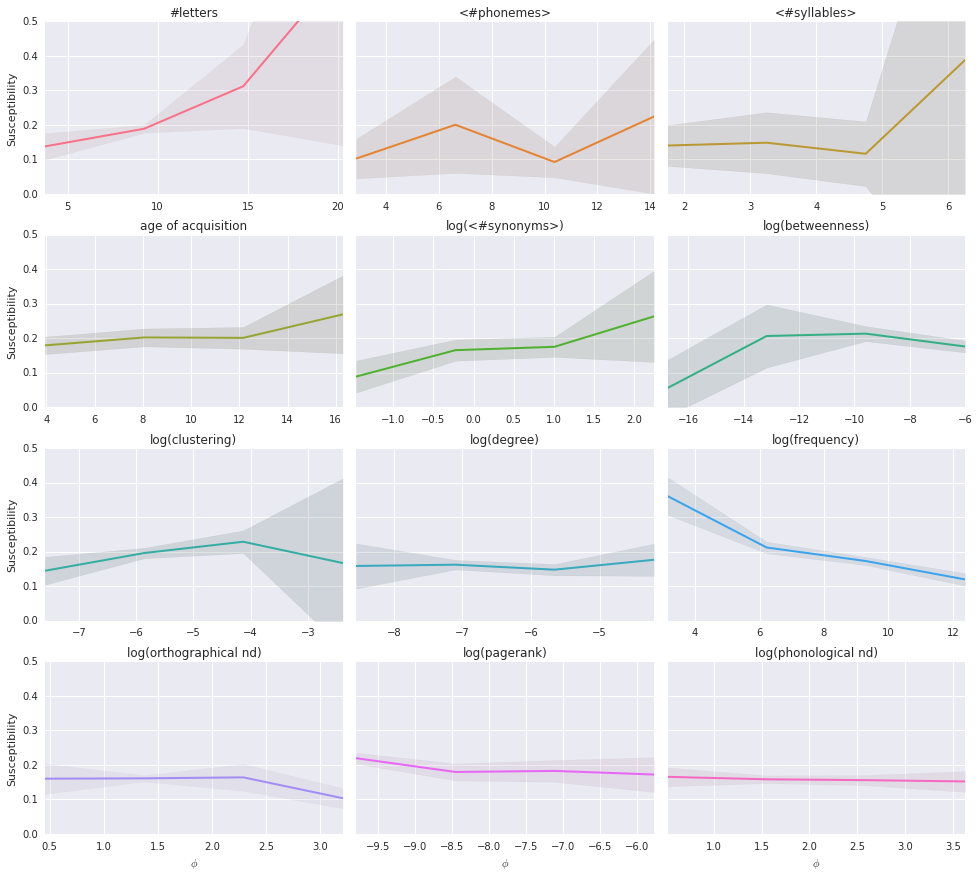

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

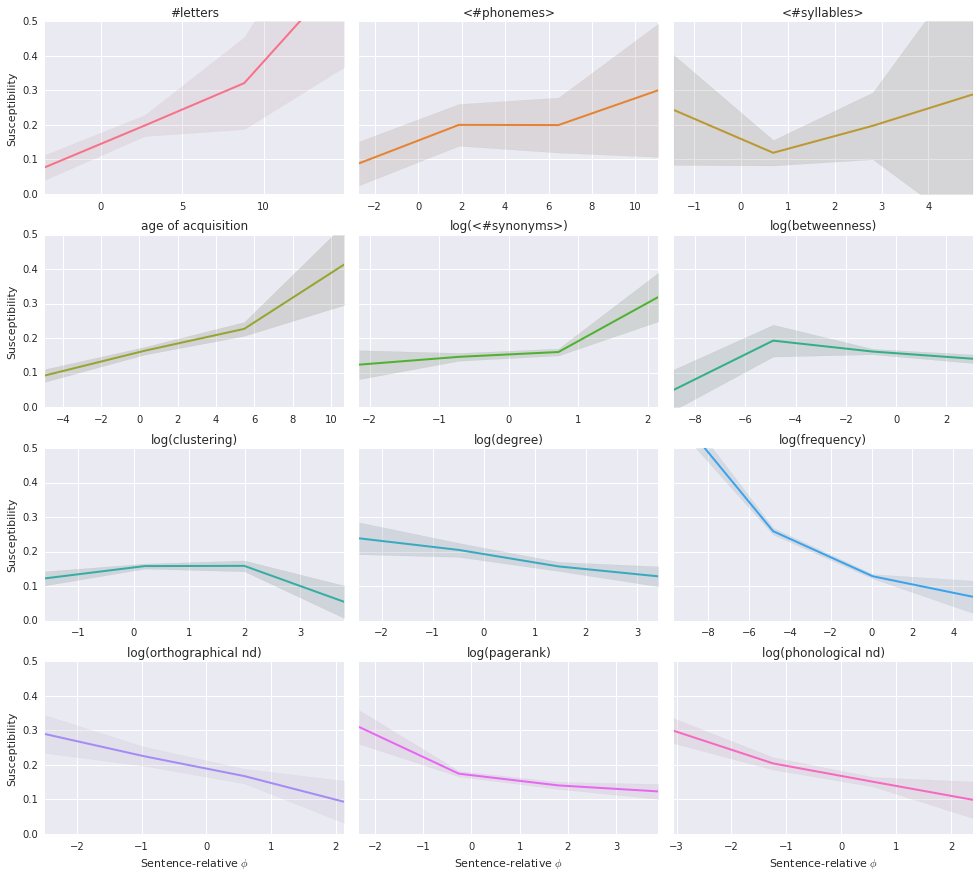

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

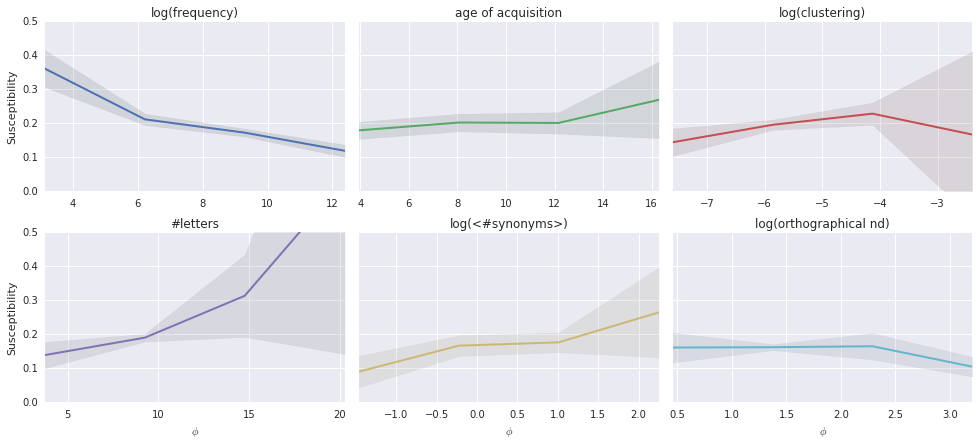

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

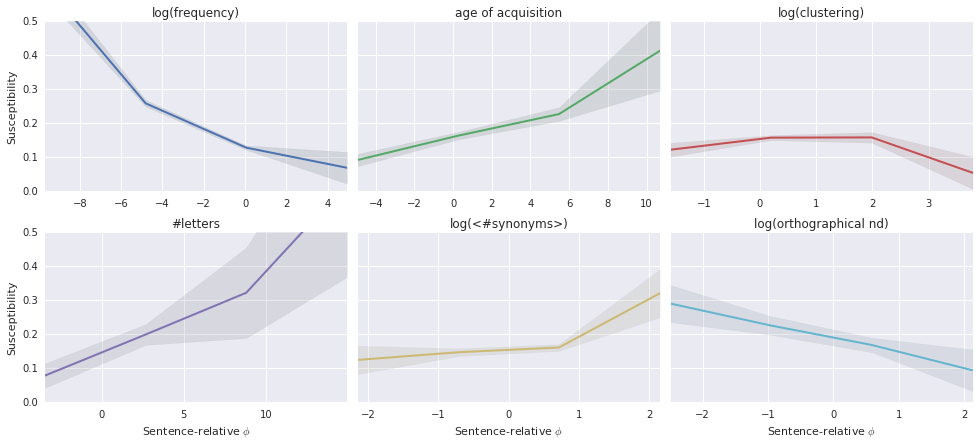

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

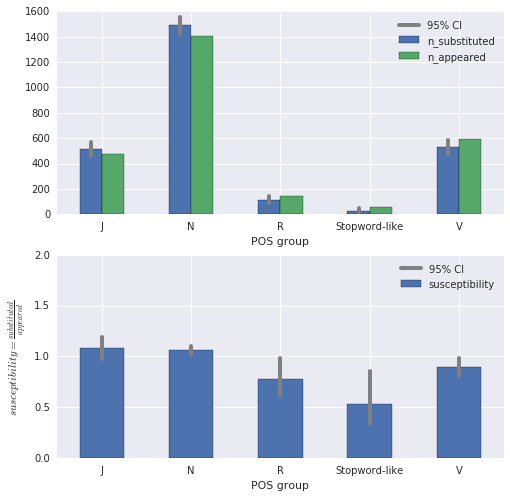

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like', 'V']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

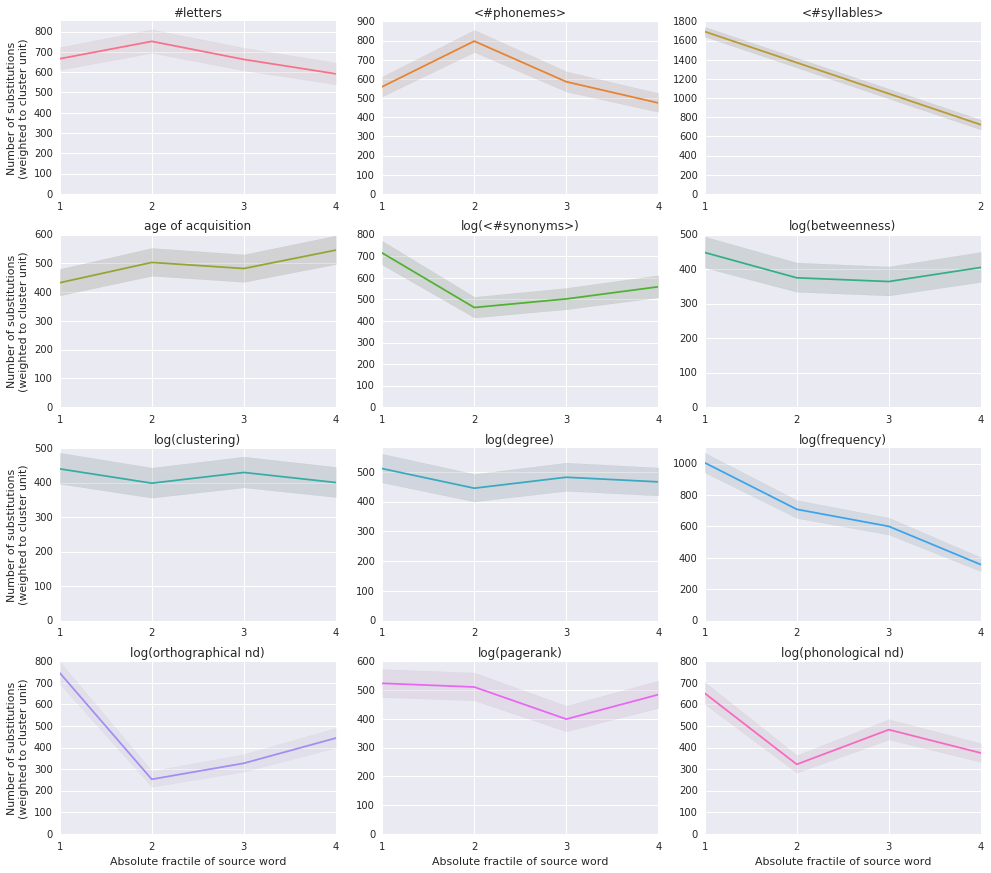

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

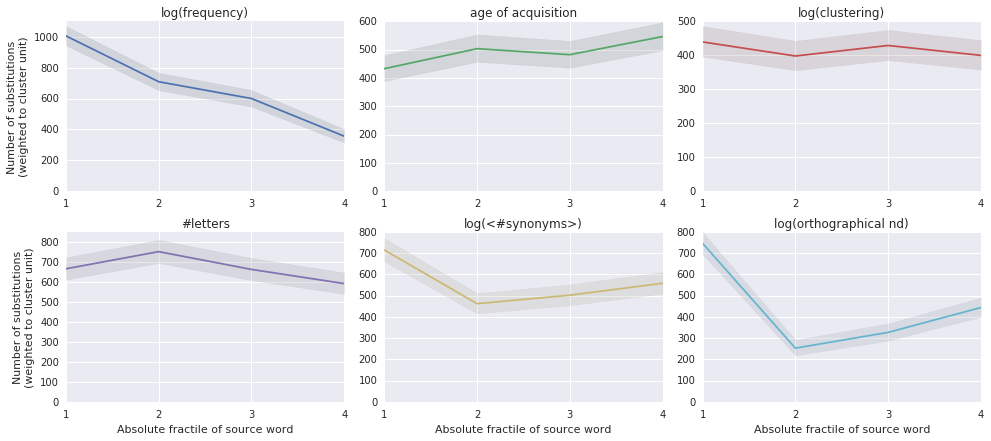

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (    1 of 99525) |             | Elapsed Time: 0:00:01 ETA:  1 day, 7:45:08

  0% (   43 of 99525) |                    | Elapsed Time: 0:00:02 ETA:  0:39:39

  0% (   63 of 99525) |                    | Elapsed Time: 0:00:03 ETA:  0:54:28

  0% (  106 of 99525) |                    | Elapsed Time: 0:00:04 ETA:  0:48:06

  0% (  170 of 99525) |                    | Elapsed Time: 0:00:05 ETA:  0:39:40

  0% (  245 of 99525) |                    | Elapsed Time: 0:00:06 ETA:  0:34:14

  0% (  305 of 99525) |                    | Elapsed Time: 0:00:07 ETA:  0:32:54

  0% (  361 of 99525) |                    | Elapsed Time: 0:00:08 ETA:  0:32:29

  0% (  421 of 99525) |                    | Elapsed Time: 0:00:09 ETA:  0:31:47

  0% (  488 of 99525) |                    | Elapsed Time: 0:00:10 ETA:  0:30:47

  0% (  560 of 99525) |                    | Elapsed Time: 0:00:11 ETA:  0:28:58

  0% (  602 of 99525) |                    | Elapsed Time: 0:00:12 ETA:  0:27:40

  0% (  641 of 99525) |                    | Elapsed Time: 0:00:13 ETA:  0:27:52

  0% (  707 of 99525) |                    | Elapsed Time: 0:00:14 ETA:  0:27:47

  0% (  778 of 99525) |                    | Elapsed Time: 0:00:15 ETA:  0:27:59

  0% (  840 of 99525) |                    | Elapsed Time: 0:00:16 ETA:  0:27:55

  0% (  864 of 99525) |                    | Elapsed Time: 0:00:17 ETA:  0:29:48

  0% (  878 of 99525) |                    | Elapsed Time: 0:00:18 ETA:  0:32:50

  0% (  897 of 99525) |                    | Elapsed Time: 0:00:19 ETA:  0:36:58

  0% (  918 of 99525) |                    | Elapsed Time: 0:00:20 ETA:  0:42:24

  0% (  929 of 99525) |                    | Elapsed Time: 0:00:21 ETA:  0:46:32

  0% (  945 of 99525) |                    | Elapsed Time: 0:00:22 ETA:  0:50:35

  0% (  954 of 99525) |                    | Elapsed Time: 0:00:23 ETA:  1:02:36

  0% (  966 of 99525) |                    | Elapsed Time: 0:00:24 ETA:  1:22:46

  0% (  988 of 99525) |                    | Elapsed Time: 0:00:25 ETA:  1:45:32

  1% ( 1010 of 99525) |                    | Elapsed Time: 0:00:26 ETA:  1:46:46

  1% ( 1019 of 99525) |                    | Elapsed Time: 0:00:27 ETA:  1:50:30

  1% ( 1039 of 99525) |                    | Elapsed Time: 0:00:28 ETA:  1:49:09

  1% ( 1047 of 99525) |                    | Elapsed Time: 0:00:29 ETA:  2:00:02

  1% ( 1061 of 99525) |                    | Elapsed Time: 0:00:30 ETA:  1:57:14

  1% ( 1067 of 99525) |                    | Elapsed Time: 0:00:32 ETA:  2:09:04

  1% ( 1073 of 99525) |                    | Elapsed Time: 0:00:33 ETA:  2:11:44

  1% ( 1086 of 99525) |                    | Elapsed Time: 0:00:34 ETA:  2:11:15

  1% ( 1094 of 99525) |                    | Elapsed Time: 0:00:35 ETA:  2:28:21

  1% ( 1101 of 99525) |                    | Elapsed Time: 0:00:36 ETA:  2:52:11

  1% ( 1113 of 99525) |                    | Elapsed Time: 0:00:37 ETA:  2:47:02

  1% ( 1122 of 99525) |                    | Elapsed Time: 0:00:38 ETA:  3:09:24

  1% ( 1129 of 99525) |                    | Elapsed Time: 0:00:39 ETA:  3:13:36

  1% ( 1131 of 99525) |                    | Elapsed Time: 0:00:40 ETA:  3:48:45

  1% ( 1133 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  3:58:14

  1% ( 1148 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  3:29:29

  1% ( 1155 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  3:46:19

  1% ( 1162 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  3:52:31

  1% ( 1180 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  3:22:13

  1% ( 1187 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  3:37:27

  1% ( 1194 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  3:43:20

  1% ( 1207 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  3:24:18

  1% ( 1214 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  3:10:01

  1% ( 1229 of 99525) |                    | Elapsed Time: 0:00:51 ETA:  2:43:18

  1% ( 1238 of 99525) |                    | Elapsed Time: 0:00:52 ETA:  2:54:35

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  2:51:17

  1% ( 1262 of 99525) |                    | Elapsed Time: 0:00:54 ETA:  2:31:49

  1% ( 1271 of 99525) |                    | Elapsed Time: 0:00:55 ETA:  2:46:10

  1% ( 1283 of 99525) |                    | Elapsed Time: 0:00:56 ETA:  2:35:52

  1% ( 1295 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  2:28:51

  1% ( 1305 of 99525) |                    | Elapsed Time: 0:00:58 ETA:  2:34:38

  1% ( 1325 of 99525) |                    | Elapsed Time: 0:00:59 ETA:  2:16:38

  1% ( 1335 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  2:23:04

  1% ( 1351 of 99525) |                    | Elapsed Time: 0:01:01 ETA:  2:14:09

  1% ( 1360 of 99525) |                    | Elapsed Time: 0:01:02 ETA:  2:14:48

  1% ( 1378 of 99525) |                    | Elapsed Time: 0:01:03 ETA:  2:14:39

  1% ( 1388 of 99525) |                    | Elapsed Time: 0:01:04 ETA:  2:13:13

  1% ( 1405 of 99525) |                    | Elapsed Time: 0:01:05 ETA:  2:08:19

  1% ( 1414 of 99525) |                    | Elapsed Time: 0:01:06 ETA:  2:10:43

  1% ( 1432 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  2:02:20

  1% ( 1443 of 99525) |                    | Elapsed Time: 0:01:08 ETA:  2:11:43

  1% ( 1462 of 99525) |                    | Elapsed Time: 0:01:09 ETA:  2:02:11

  1% ( 1475 of 99525) |                    | Elapsed Time: 0:01:10 ETA:  2:05:58

  1% ( 1494 of 99525) |                    | Elapsed Time: 0:01:11 ETA:  1:55:47

  1% ( 1507 of 99525) |                    | Elapsed Time: 0:01:12 ETA:  1:59:35

  1% ( 1522 of 99525) |                    | Elapsed Time: 0:01:13 ETA:  1:55:08

  1% ( 1535 of 99525) |                    | Elapsed Time: 0:01:14 ETA:  1:58:16

  1% ( 1550 of 99525) |                    | Elapsed Time: 0:01:16 ETA:  1:53:06

  1% ( 1574 of 99525) |                    | Elapsed Time: 0:01:17 ETA:  1:47:22

  1% ( 1591 of 99525) |                    | Elapsed Time: 0:01:18 ETA:  1:42:52

  1% ( 1611 of 99525) |                    | Elapsed Time: 0:01:19 ETA:  1:41:48

  1% ( 1638 of 99525) |                    | Elapsed Time: 0:01:20 ETA:  1:32:02

  1% ( 1664 of 99525) |                    | Elapsed Time: 0:01:21 ETA:  1:28:14

  1% ( 1705 of 99525) |                    | Elapsed Time: 0:01:22 ETA:  1:15:20

  1% ( 1757 of 99525) |                    | Elapsed Time: 0:01:23 ETA:  1:02:51

  1% ( 1813 of 99525) |                    | Elapsed Time: 0:01:24 ETA:  0:52:51

  1% ( 1880 of 99525) |                    | Elapsed Time: 0:01:25 ETA:  0:44:12

  1% ( 1907 of 99525) |                    | Elapsed Time: 0:01:26 ETA:  0:44:39

  1% ( 1912 of 99525) |                    | Elapsed Time: 0:01:27 ETA:  0:47:36

  1% ( 1916 of 99525) |                    | Elapsed Time: 0:01:28 ETA:  0:51:36

  1% ( 1920 of 99525) |                    | Elapsed Time: 0:01:29 ETA:  0:55:58

  1% ( 1923 of 99525) |                    | Elapsed Time: 0:01:30 ETA:  1:01:51

  1% ( 1936 of 99525) |                    | Elapsed Time: 0:01:31 ETA:  1:09:36

  1% ( 1943 of 99525) |                    | Elapsed Time: 0:01:33 ETA:  1:27:20

  1% ( 1948 of 99525) |                    | Elapsed Time: 0:01:34 ETA:  2:01:48

  1% ( 1953 of 99525) |                    | Elapsed Time: 0:01:35 ETA:  3:49:07

  1% ( 1969 of 99525) |                    | Elapsed Time: 0:01:36 ETA:  4:24:49

  1% ( 1976 of 99525) |                    | Elapsed Time: 0:01:37 ETA:  4:11:17

  2% ( 2041 of 99525) |                    | Elapsed Time: 0:01:38 ETA:  2:04:19

  2% ( 2135 of 99525) |                    | Elapsed Time: 0:01:39 ETA:  1:11:32

  2% ( 2190 of 99525) |                    | Elapsed Time: 0:01:40 ETA:  0:56:27

  2% ( 2219 of 99525) |                    | Elapsed Time: 0:01:41 ETA:  0:53:07

  2% ( 2258 of 99525) |                    | Elapsed Time: 0:01:42 ETA:  0:47:13

  2% ( 2306 of 99525) |                    | Elapsed Time: 0:01:43 ETA:  0:40:58

  2% ( 2372 of 99525) |                    | Elapsed Time: 0:01:44 ETA:  0:34:17

  2% ( 2438 of 99525) |                    | Elapsed Time: 0:01:45 ETA:  0:30:27

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:01:45 ETA:  0:26:17

  2% ( 2546 of 99525) |                    | Elapsed Time: 0:01:47 ETA:  0:26:48

  2% ( 2588 of 99525) |                    | Elapsed Time: 0:01:48 ETA:  0:30:04

  2% ( 2632 of 99525) |                    | Elapsed Time: 0:01:49 ETA:  0:30:47

  2% ( 2669 of 99525) |                    | Elapsed Time: 0:01:50 ETA:  0:30:10

  2% ( 2719 of 99525) |                    | Elapsed Time: 0:01:51 ETA:  0:29:24

  2% ( 2777 of 99525) |                    | Elapsed Time: 0:01:52 ETA:  0:28:43

  2% ( 2832 of 99525) |                    | Elapsed Time: 0:01:53 ETA:  0:29:28

  2% ( 2901 of 99525) |                    | Elapsed Time: 0:01:54 ETA:  0:29:15

  2% ( 2950 of 99525) |                    | Elapsed Time: 0:01:55 ETA:  0:30:46

  3% ( 3012 of 99525) |                    | Elapsed Time: 0:01:56 ETA:  0:30:17

  3% ( 3082 of 99525) |                    | Elapsed Time: 0:01:57 ETA:  0:28:25

  3% ( 3136 of 99525) |                    | Elapsed Time: 0:01:58 ETA:  0:27:50

  3% ( 3195 of 99525) |                    | Elapsed Time: 0:01:59 ETA:  0:26:35

  3% ( 3258 of 99525) |                    | Elapsed Time: 0:02:00 ETA:  0:25:56

  3% ( 3319 of 99525) |                    | Elapsed Time: 0:02:01 ETA:  0:25:45

  3% ( 3380 of 99525) |                    | Elapsed Time: 0:02:02 ETA:  0:25:24

  3% ( 3454 of 99525) |                    | Elapsed Time: 0:02:03 ETA:  0:25:08

  3% ( 3529 of 99525) |                    | Elapsed Time: 0:02:04 ETA:  0:23:52

  3% ( 3605 of 99525) |                    | Elapsed Time: 0:02:05 ETA:  0:23:15

  3% ( 3676 of 99525) |                    | Elapsed Time: 0:02:06 ETA:  0:23:19

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:02:06 ETA:  0:22:24

  3% ( 3814 of 99525) |                    | Elapsed Time: 0:02:07 ETA:  0:21:30

  3% ( 3898 of 99525) |                    | Elapsed Time: 0:02:08 ETA:  0:20:41

  4% ( 3981 of 99525) |                    | Elapsed Time: 0:02:09 ETA:  0:19:56

  4% ( 4065 of 99525) |                    | Elapsed Time: 0:02:10 ETA:  0:19:10

  4% ( 4149 of 99525) |                    | Elapsed Time: 0:02:11 ETA:  0:18:51

  4% ( 4237 of 99525) |                    | Elapsed Time: 0:02:12 ETA:  0:18:27

  4% ( 4318 of 99525) |                    | Elapsed Time: 0:02:13 ETA:  0:18:18

  4% ( 4404 of 99525) |                    | Elapsed Time: 0:02:14 ETA:  0:17:47

  4% ( 4485 of 99525) |                    | Elapsed Time: 0:02:15 ETA:  0:17:44

  4% ( 4563 of 99525) |                    | Elapsed Time: 0:02:16 ETA:  0:17:50

  4% ( 4634 of 99525) |                    | Elapsed Time: 0:02:17 ETA:  0:18:09

  4% ( 4706 of 99525) |                    | Elapsed Time: 0:02:19 ETA:  0:18:26

  4% ( 4776 of 99525) |                    | Elapsed Time: 0:02:20 ETA:  0:18:50

  4% ( 4849 of 99525) |                    | Elapsed Time: 0:02:21 ETA:  0:19:09

  4% ( 4919 of 99525) |                    | Elapsed Time: 0:02:22 ETA:  0:19:42

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:02:22 ETA:  0:20:13

  5% ( 5080 of 99525) |#                   | Elapsed Time: 0:02:23 ETA:  0:19:41

  5% ( 5227 of 99525) |#                   | Elapsed Time: 0:02:24 ETA:  0:17:41

  5% ( 5371 of 99525) |#                   | Elapsed Time: 0:02:25 ETA:  0:15:59

  5% ( 5515 of 99525) |#                   | Elapsed Time: 0:02:26 ETA:  0:14:27

  5% ( 5659 of 99525) |#                   | Elapsed Time: 0:02:27 ETA:  0:13:09

  5% ( 5803 of 99525) |#                   | Elapsed Time: 0:02:28 ETA:  0:12:00

  5% ( 5937 of 99525) |#                   | Elapsed Time: 0:02:29 ETA:  0:11:10

  6% ( 6078 of 99525) |#                   | Elapsed Time: 0:02:30 ETA:  0:10:18

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:02:32 ETA:  0:09:08

  6% ( 6361 of 99525) |#                   | Elapsed Time: 0:02:33 ETA:  0:09:12

  6% ( 6497 of 99525) |#                   | Elapsed Time: 0:02:34 ETA:  0:09:16

  6% ( 6632 of 99525) |#                   | Elapsed Time: 0:02:35 ETA:  0:09:20

  6% ( 6708 of 99525) |#                   | Elapsed Time: 0:02:36 ETA:  0:10:06

  6% ( 6785 of 99525) |#                   | Elapsed Time: 0:02:37 ETA:  0:10:56

  6% ( 6863 of 99525) |#                   | Elapsed Time: 0:02:38 ETA:  0:11:45

  6% ( 6944 of 99525) |#                   | Elapsed Time: 0:02:39 ETA:  0:12:44

  7% ( 7027 of 99525) |#                   | Elapsed Time: 0:02:40 ETA:  0:13:51

  7% ( 7105 of 99525) |#                   | Elapsed Time: 0:02:41 ETA:  0:14:16

  7% ( 7185 of 99525) |#                   | Elapsed Time: 0:02:42 ETA:  0:15:28

  7% ( 7270 of 99525) |#                   | Elapsed Time: 0:02:43 ETA:  0:16:40

  7% ( 7356 of 99525) |#                   | Elapsed Time: 0:02:44 ETA:  0:17:57

  7% ( 7434 of 99525) |#                   | Elapsed Time: 0:02:45 ETA:  0:17:52

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:02:45 ETA:  0:17:49

  7% ( 7543 of 99525) |#                   | Elapsed Time: 0:02:46 ETA:  0:17:47

  7% ( 7618 of 99525) |#                   | Elapsed Time: 0:02:47 ETA:  0:17:57

  7% ( 7701 of 99525) |#                   | Elapsed Time: 0:02:48 ETA:  0:17:56

  7% ( 7781 of 99525) |#                   | Elapsed Time: 0:02:49 ETA:  0:17:52

  7% ( 7866 of 99525) |#                   | Elapsed Time: 0:02:50 ETA:  0:17:44

  7% ( 7949 of 99525) |#                   | Elapsed Time: 0:02:51 ETA:  0:17:47

  8% ( 8033 of 99525) |#                   | Elapsed Time: 0:02:52 ETA:  0:17:50

  8% ( 8123 of 99525) |#                   | Elapsed Time: 0:02:53 ETA:  0:17:28

  8% ( 8208 of 99525) |#                   | Elapsed Time: 0:02:54 ETA:  0:17:24

  8% ( 8286 of 99525) |#                   | Elapsed Time: 0:02:55 ETA:  0:17:24

  8% ( 8368 of 99525) |#                   | Elapsed Time: 0:02:56 ETA:  0:17:15

  8% ( 8454 of 99525) |#                   | Elapsed Time: 0:02:57 ETA:  0:17:09

  8% ( 8537 of 99525) |#                   | Elapsed Time: 0:02:58 ETA:  0:17:03

  8% ( 8624 of 99525) |#                   | Elapsed Time: 0:02:59 ETA:  0:16:58

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:03:00 ETA:  0:17:01

  8% ( 8796 of 99525) |#                   | Elapsed Time: 0:03:01 ETA:  0:17:05

  8% ( 8867 of 99525) |#                   | Elapsed Time: 0:03:02 ETA:  0:17:23

  9% ( 8982 of 99525) |#                   | Elapsed Time: 0:03:03 ETA:  0:16:17

  9% ( 9067 of 99525) |#                   | Elapsed Time: 0:03:04 ETA:  0:16:07

  9% ( 9141 of 99525) |#                   | Elapsed Time: 0:03:05 ETA:  0:16:27

  9% ( 9214 of 99525) |#                   | Elapsed Time: 0:03:06 ETA:  0:16:44

  9% ( 9286 of 99525) |#                   | Elapsed Time: 0:03:07 ETA:  0:17:10

  9% ( 9363 of 99525) |#                   | Elapsed Time: 0:03:08 ETA:  0:17:16

  9% ( 9449 of 99525) |#                   | Elapsed Time: 0:03:09 ETA:  0:17:08

  9% ( 9533 of 99525) |#                   | Elapsed Time: 0:03:10 ETA:  0:17:12

  9% ( 9628 of 99525) |#                   | Elapsed Time: 0:03:11 ETA:  0:16:33

  9% ( 9737 of 99525) |#                   | Elapsed Time: 0:03:12 ETA:  0:16:41

  9% ( 9822 of 99525) |#                   | Elapsed Time: 0:03:13 ETA:  0:16:41

  9% ( 9918 of 99525) |#                   | Elapsed Time: 0:03:14 ETA:  0:16:05

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:03:15 ETA:  0:15:45

 10% (10037 of 99525) |##                  | Elapsed Time: 0:03:16 ETA:  0:15:26

 10% (10119 of 99525) |##                  | Elapsed Time: 0:03:17 ETA:  0:15:17

 10% (10202 of 99525) |##                  | Elapsed Time: 0:03:18 ETA:  0:15:20

 10% (10284 of 99525) |##                  | Elapsed Time: 0:03:19 ETA:  0:15:23

 10% (10366 of 99525) |##                  | Elapsed Time: 0:03:20 ETA:  0:15:41

 10% (10456 of 99525) |##                  | Elapsed Time: 0:03:21 ETA:  0:16:09

 10% (10584 of 99525) |##                  | Elapsed Time: 0:03:22 ETA:  0:15:02

 10% (10722 of 99525) |##                  | Elapsed Time: 0:03:23 ETA:  0:14:03

 10% (10844 of 99525) |##                  | Elapsed Time: 0:03:24 ETA:  0:13:26

 11% (10950 of 99525) |##                  | Elapsed Time: 0:03:25 ETA:  0:13:00

 11% (11062 of 99525) |##                  | Elapsed Time: 0:03:26 ETA:  0:12:27

 11% (11163 of 99525) |##                  | Elapsed Time: 0:03:27 ETA:  0:12:09

 11% (11197 of 99525) |##                  | Elapsed Time: 0:03:27 ETA:  0:11:48

 11% (11279 of 99525) |##                  | Elapsed Time: 0:03:28 ETA:  0:11:47

 11% (11357 of 99525) |##                  | Elapsed Time: 0:03:29 ETA:  0:11:57

 11% (11440 of 99525) |##                  | Elapsed Time: 0:03:30 ETA:  0:12:46

 11% (11519 of 99525) |##                  | Elapsed Time: 0:03:31 ETA:  0:13:58

 11% (11595 of 99525) |##                  | Elapsed Time: 0:03:32 ETA:  0:15:01

 11% (11676 of 99525) |##                  | Elapsed Time: 0:03:33 ETA:  0:15:39

 11% (11763 of 99525) |##                  | Elapsed Time: 0:03:34 ETA:  0:16:21

 11% (11840 of 99525) |##                  | Elapsed Time: 0:03:35 ETA:  0:17:02

 11% (11930 of 99525) |##                  | Elapsed Time: 0:03:36 ETA:  0:16:53

 12% (12012 of 99525) |##                  | Elapsed Time: 0:03:37 ETA:  0:16:52

 12% (12098 of 99525) |##                  | Elapsed Time: 0:03:38 ETA:  0:16:38

 12% (12181 of 99525) |##                  | Elapsed Time: 0:03:39 ETA:  0:16:37

 12% (12267 of 99525) |##                  | Elapsed Time: 0:03:40 ETA:  0:16:22

 12% (12348 of 99525) |##                  | Elapsed Time: 0:03:41 ETA:  0:16:13

 12% (12441 of 99525) |##                  | Elapsed Time: 0:03:42 ETA:  0:16:13

 12% (12512 of 99525) |##                  | Elapsed Time: 0:03:43 ETA:  0:16:23

 12% (12597 of 99525) |##                  | Elapsed Time: 0:03:44 ETA:  0:16:31

 12% (12680 of 99525) |##                  | Elapsed Time: 0:03:45 ETA:  0:16:28

 12% (12758 of 99525) |##                  | Elapsed Time: 0:03:46 ETA:  0:16:41

 12% (12842 of 99525) |##                  | Elapsed Time: 0:03:47 ETA:  0:16:38

 12% (12924 of 99525) |##                  | Elapsed Time: 0:03:48 ETA:  0:16:46

 13% (13000 of 99525) |##                  | Elapsed Time: 0:03:49 ETA:  0:16:55

 13% (13079 of 99525) |##                  | Elapsed Time: 0:03:50 ETA:  0:17:03

 13% (13156 of 99525) |##                  | Elapsed Time: 0:03:51 ETA:  0:17:06

 13% (13241 of 99525) |##                  | Elapsed Time: 0:03:52 ETA:  0:16:42

 13% (13319 of 99525) |##                  | Elapsed Time: 0:03:53 ETA:  0:16:53

 13% (13408 of 99525) |##                  | Elapsed Time: 0:03:54 ETA:  0:16:41

 13% (13505 of 99525) |##                  | Elapsed Time: 0:03:55 ETA:  0:16:10

 13% (13607 of 99525) |##                  | Elapsed Time: 0:03:56 ETA:  0:15:40

 13% (13685 of 99525) |##                  | Elapsed Time: 0:03:57 ETA:  0:15:15

 13% (13780 of 99525) |##                  | Elapsed Time: 0:03:58 ETA:  0:14:46

 13% (13882 of 99525) |##                  | Elapsed Time: 0:03:59 ETA:  0:14:13

 14% (13983 of 99525) |##                  | Elapsed Time: 0:04:00 ETA:  0:13:40

 14% (14086 of 99525) |##                  | Elapsed Time: 0:04:01 ETA:  0:13:16

 14% (14178 of 99525) |##                  | Elapsed Time: 0:04:02 ETA:  0:12:59

 14% (14257 of 99525) |##                  | Elapsed Time: 0:04:03 ETA:  0:13:11

 14% (14342 of 99525) |##                  | Elapsed Time: 0:04:04 ETA:  0:13:24

 14% (14437 of 99525) |##                  | Elapsed Time: 0:04:05 ETA:  0:13:31

 14% (14530 of 99525) |##                  | Elapsed Time: 0:04:06 ETA:  0:13:39

 14% (14628 of 99525) |##                  | Elapsed Time: 0:04:07 ETA:  0:13:33

 14% (14714 of 99525) |##                  | Elapsed Time: 0:04:08 ETA:  0:13:52

 14% (14795 of 99525) |##                  | Elapsed Time: 0:04:09 ETA:  0:14:17

 14% (14875 of 99525) |##                  | Elapsed Time: 0:04:10 ETA:  0:14:48

 15% (14929 of 99525) |###                 | Elapsed Time: 0:04:11 ETA:  0:15:05

 15% (15011 of 99525) |###                 | Elapsed Time: 0:04:12 ETA:  0:15:00

 15% (15089 of 99525) |###                 | Elapsed Time: 0:04:13 ETA:  0:15:11

 15% (15174 of 99525) |###                 | Elapsed Time: 0:04:14 ETA:  0:15:26

 15% (15265 of 99525) |###                 | Elapsed Time: 0:04:15 ETA:  0:15:27

 15% (15350 of 99525) |###                 | Elapsed Time: 0:04:16 ETA:  0:15:48

 15% (15442 of 99525) |###                 | Elapsed Time: 0:04:17 ETA:  0:15:38

 15% (15532 of 99525) |###                 | Elapsed Time: 0:04:18 ETA:  0:15:24

 15% (15621 of 99525) |###                 | Elapsed Time: 0:04:19 ETA:  0:15:08

 15% (15713 of 99525) |###                 | Elapsed Time: 0:04:20 ETA:  0:14:48

 15% (15802 of 99525) |###                 | Elapsed Time: 0:04:21 ETA:  0:14:36

 15% (15892 of 99525) |###                 | Elapsed Time: 0:04:22 ETA:  0:14:18

 16% (15985 of 99525) |###                 | Elapsed Time: 0:04:23 ETA:  0:14:07

 16% (16073 of 99525) |###                 | Elapsed Time: 0:04:24 ETA:  0:14:10

 16% (16173 of 99525) |###                 | Elapsed Time: 0:04:25 ETA:  0:14:01

 16% (16265 of 99525) |###                 | Elapsed Time: 0:04:26 ETA:  0:13:57

 16% (16362 of 99525) |###                 | Elapsed Time: 0:04:27 ETA:  0:13:44

 16% (16460 of 99525) |###                 | Elapsed Time: 0:04:28 ETA:  0:13:34

 16% (16552 of 99525) |###                 | Elapsed Time: 0:04:29 ETA:  0:13:29

 16% (16645 of 99525) |###                 | Elapsed Time: 0:04:30 ETA:  0:13:24

 16% (16737 of 99525) |###                 | Elapsed Time: 0:04:31 ETA:  0:13:24

 16% (16833 of 99525) |###                 | Elapsed Time: 0:04:32 ETA:  0:13:12

 17% (16927 of 99525) |###                 | Elapsed Time: 0:04:33 ETA:  0:13:07

 17% (17023 of 99525) |###                 | Elapsed Time: 0:04:34 ETA:  0:13:03

 17% (17118 of 99525) |###                 | Elapsed Time: 0:04:35 ETA:  0:13:00

 17% (17210 of 99525) |###                 | Elapsed Time: 0:04:36 ETA:  0:13:04

 17% (17306 of 99525) |###                 | Elapsed Time: 0:04:37 ETA:  0:13:07

 17% (17417 of 99525) |###                 | Elapsed Time: 0:04:38 ETA:  0:12:59

 17% (17512 of 99525) |###                 | Elapsed Time: 0:04:39 ETA:  0:12:55

 17% (17607 of 99525) |###                 | Elapsed Time: 0:04:40 ETA:  0:12:56

 17% (17705 of 99525) |###                 | Elapsed Time: 0:04:41 ETA:  0:12:50

 17% (17803 of 99525) |###                 | Elapsed Time: 0:04:42 ETA:  0:12:46

 17% (17897 of 99525) |###                 | Elapsed Time: 0:04:43 ETA:  0:12:46

 18% (17995 of 99525) |###                 | Elapsed Time: 0:04:44 ETA:  0:12:37

 18% (18092 of 99525) |###                 | Elapsed Time: 0:04:45 ETA:  0:12:35

 18% (18188 of 99525) |###                 | Elapsed Time: 0:04:46 ETA:  0:12:33

 18% (18284 of 99525) |###                 | Elapsed Time: 0:04:47 ETA:  0:12:32

 18% (18383 of 99525) |###                 | Elapsed Time: 0:04:48 ETA:  0:12:25

 18% (18482 of 99525) |###                 | Elapsed Time: 0:04:49 ETA:  0:12:19

 18% (18577 of 99525) |###                 | Elapsed Time: 0:04:50 ETA:  0:12:22

 18% (18661 of 99525) |###                 | Elapsed Time: 0:04:51 ETA:  0:12:20

 18% (18761 of 99525) |###                 | Elapsed Time: 0:04:52 ETA:  0:12:11

 18% (18860 of 99525) |###                 | Elapsed Time: 0:04:53 ETA:  0:12:09

 19% (18958 of 99525) |###                 | Elapsed Time: 0:04:54 ETA:  0:12:07

 19% (19056 of 99525) |###                 | Elapsed Time: 0:04:55 ETA:  0:12:03

 19% (19149 of 99525) |###                 | Elapsed Time: 0:04:56 ETA:  0:12:05

 19% (19248 of 99525) |###                 | Elapsed Time: 0:04:57 ETA:  0:12:04

 19% (19339 of 99525) |###                 | Elapsed Time: 0:04:58 ETA:  0:12:12

 19% (19431 of 99525) |###                 | Elapsed Time: 0:04:59 ETA:  0:12:14

 19% (19526 of 99525) |###                 | Elapsed Time: 0:05:00 ETA:  0:12:18

 19% (19625 of 99525) |###                 | Elapsed Time: 0:05:01 ETA:  0:12:18

 19% (19721 of 99525) |###                 | Elapsed Time: 0:05:02 ETA:  0:12:20

 19% (19818 of 99525) |###                 | Elapsed Time: 0:05:03 ETA:  0:12:20

 20% (19905 of 99525) |####                | Elapsed Time: 0:05:04 ETA:  0:12:20

 20% (20003 of 99525) |####                | Elapsed Time: 0:05:05 ETA:  0:12:13

 20% (20101 of 99525) |####                | Elapsed Time: 0:05:06 ETA:  0:12:14

 20% (20199 of 99525) |####                | Elapsed Time: 0:05:07 ETA:  0:12:06

 20% (20296 of 99525) |####                | Elapsed Time: 0:05:08 ETA:  0:11:58

 20% (20386 of 99525) |####                | Elapsed Time: 0:05:09 ETA:  0:12:03

 20% (20487 of 99525) |####                | Elapsed Time: 0:05:10 ETA:  0:12:02

 20% (20569 of 99525) |####                | Elapsed Time: 0:05:11 ETA:  0:12:19

 20% (20653 of 99525) |####                | Elapsed Time: 0:05:12 ETA:  0:12:34

 20% (20735 of 99525) |####                | Elapsed Time: 0:05:13 ETA:  0:12:53

 20% (20815 of 99525) |####                | Elapsed Time: 0:05:14 ETA:  0:13:16

 20% (20895 of 99525) |####                | Elapsed Time: 0:05:15 ETA:  0:13:40

 21% (20973 of 99525) |####                | Elapsed Time: 0:05:16 ETA:  0:14:08

 21% (21052 of 99525) |####                | Elapsed Time: 0:05:17 ETA:  0:14:37

 21% (21150 of 99525) |####                | Elapsed Time: 0:05:18 ETA:  0:15:04

 21% (21246 of 99525) |####                | Elapsed Time: 0:05:19 ETA:  0:14:37

 21% (21342 of 99525) |####                | Elapsed Time: 0:05:20 ETA:  0:14:15

 21% (21433 of 99525) |####                | Elapsed Time: 0:05:21 ETA:  0:13:59

 21% (21526 of 99525) |####                | Elapsed Time: 0:05:22 ETA:  0:13:38

 21% (21619 of 99525) |####                | Elapsed Time: 0:05:23 ETA:  0:13:16

 21% (21695 of 99525) |####                | Elapsed Time: 0:05:24 ETA:  0:13:17

 21% (21772 of 99525) |####                | Elapsed Time: 0:05:25 ETA:  0:13:19

 21% (21848 of 99525) |####                | Elapsed Time: 0:05:26 ETA:  0:13:39

 22% (21924 of 99525) |####                | Elapsed Time: 0:05:27 ETA:  0:13:56

 22% (22012 of 99525) |####                | Elapsed Time: 0:05:28 ETA:  0:14:07

 22% (22121 of 99525) |####                | Elapsed Time: 0:05:29 ETA:  0:13:46

 22% (22231 of 99525) |####                | Elapsed Time: 0:05:30 ETA:  0:13:18

 22% (22336 of 99525) |####                | Elapsed Time: 0:05:31 ETA:  0:13:01

 22% (22394 of 99525) |####                | Elapsed Time: 0:05:32 ETA:  0:12:52

 22% (22501 of 99525) |####                | Elapsed Time: 0:05:33 ETA:  0:12:08

 22% (22528 of 99525) |####                | Elapsed Time: 0:05:47 ETA:  0:41:36

 22% (22628 of 99525) |####                | Elapsed Time: 0:05:48 ETA:  0:40:07

 22% (22727 of 99525) |####                | Elapsed Time: 0:05:49 ETA:  0:38:48

 22% (22828 of 99525) |####                | Elapsed Time: 0:05:50 ETA:  0:38:04

 23% (22924 of 99525) |####                | Elapsed Time: 0:05:51 ETA:  0:38:46

 23% (23025 of 99525) |####                | Elapsed Time: 0:05:52 ETA:  0:39:15

 23% (23128 of 99525) |####                | Elapsed Time: 0:05:53 ETA:  0:39:21

 23% (23232 of 99525) |####                | Elapsed Time: 0:05:54 ETA:  0:37:44

 23% (23308 of 99525) |####                | Elapsed Time: 0:05:55 ETA:  0:39:24

 23% (23382 of 99525) |####                | Elapsed Time: 0:05:56 ETA:  0:11:38

 23% (23471 of 99525) |####                | Elapsed Time: 0:05:57 ETA:  0:11:51

 23% (23548 of 99525) |####                | Elapsed Time: 0:05:58 ETA:  0:12:19

 23% (23638 of 99525) |####                | Elapsed Time: 0:05:59 ETA:  0:13:08

 23% (23712 of 99525) |####                | Elapsed Time: 0:06:00 ETA:  0:13:53

 23% (23784 of 99525) |####                | Elapsed Time: 0:06:01 ETA:  0:14:48

 24% (23888 of 99525) |####                | Elapsed Time: 0:06:02 ETA:  0:14:46

 24% (24021 of 99525) |####                | Elapsed Time: 0:06:03 ETA:  0:13:06

 24% (24171 of 99525) |####                | Elapsed Time: 0:06:04 ETA:  0:11:14

 24% (24282 of 99525) |####                | Elapsed Time: 0:06:05 ETA:  0:10:45

 24% (24423 of 99525) |####                | Elapsed Time: 0:06:06 ETA:  0:09:29

 24% (24522 of 99525) |####                | Elapsed Time: 0:06:07 ETA:  0:09:03

 24% (24622 of 99525) |####                | Elapsed Time: 0:06:08 ETA:  0:09:05

 24% (24725 of 99525) |####                | Elapsed Time: 0:06:09 ETA:  0:08:38

 24% (24813 of 99525) |####                | Elapsed Time: 0:06:10 ETA:  0:08:24

 25% (24882 of 99525) |#####               | Elapsed Time: 0:06:11 ETA:  0:08:37

 25% (24970 of 99525) |#####               | Elapsed Time: 0:06:12 ETA:  0:09:19

 25% (25059 of 99525) |#####               | Elapsed Time: 0:06:13 ETA:  0:10:22

 25% (25144 of 99525) |#####               | Elapsed Time: 0:06:14 ETA:  0:10:51

 25% (25226 of 99525) |#####               | Elapsed Time: 0:06:15 ETA:  0:12:06

 25% (25308 of 99525) |#####               | Elapsed Time: 0:06:16 ETA:  0:12:28

 25% (25393 of 99525) |#####               | Elapsed Time: 0:06:17 ETA:  0:12:49

 25% (25501 of 99525) |#####               | Elapsed Time: 0:06:18 ETA:  0:12:40

 25% (25618 of 99525) |#####               | Elapsed Time: 0:06:19 ETA:  0:11:58

 25% (25733 of 99525) |#####               | Elapsed Time: 0:06:20 ETA:  0:11:16

 25% (25836 of 99525) |#####               | Elapsed Time: 0:06:21 ETA:  0:10:57

 26% (25924 of 99525) |#####               | Elapsed Time: 0:06:22 ETA:  0:10:57

 26% (26013 of 99525) |#####               | Elapsed Time: 0:06:23 ETA:  0:10:51

 26% (26102 of 99525) |#####               | Elapsed Time: 0:06:24 ETA:  0:10:42

 26% (26126 of 99525) |#####               | Elapsed Time: 0:06:25 ETA:  0:10:27

 26% (26214 of 99525) |#####               | Elapsed Time: 0:06:26 ETA:  0:10:23

 26% (26289 of 99525) |#####               | Elapsed Time: 0:06:27 ETA:  0:11:05

 26% (26364 of 99525) |#####               | Elapsed Time: 0:06:28 ETA:  0:12:02

 26% (26437 of 99525) |#####               | Elapsed Time: 0:06:29 ETA:  0:13:07

 26% (26519 of 99525) |#####               | Elapsed Time: 0:06:30 ETA:  0:13:43

 26% (26590 of 99525) |#####               | Elapsed Time: 0:06:31 ETA:  0:14:12

 26% (26698 of 99525) |#####               | Elapsed Time: 0:06:32 ETA:  0:13:37

 26% (26825 of 99525) |#####               | Elapsed Time: 0:06:33 ETA:  0:12:32

 27% (26954 of 99525) |#####               | Elapsed Time: 0:06:34 ETA:  0:11:33

 27% (27079 of 99525) |#####               | Elapsed Time: 0:06:35 ETA:  0:10:45

 27% (27204 of 99525) |#####               | Elapsed Time: 0:06:36 ETA:  0:09:47

 27% (27333 of 99525) |#####               | Elapsed Time: 0:06:37 ETA:  0:08:51

 27% (27370 of 99525) |#####               | Elapsed Time: 0:06:37 ETA:  0:08:11

 27% (27500 of 99525) |#####               | Elapsed Time: 0:06:38 ETA:  0:07:26

 27% (27630 of 99525) |#####               | Elapsed Time: 0:06:39 ETA:  0:06:37

 27% (27760 of 99525) |#####               | Elapsed Time: 0:06:40 ETA:  0:06:20

 28% (27889 of 99525) |#####               | Elapsed Time: 0:06:41 ETA:  0:06:17

 28% (28017 of 99525) |#####               | Elapsed Time: 0:06:42 ETA:  0:06:17

 28% (28117 of 99525) |#####               | Elapsed Time: 0:06:43 ETA:  0:06:35

 28% (28210 of 99525) |#####               | Elapsed Time: 0:06:44 ETA:  0:06:59

 28% (28301 of 99525) |#####               | Elapsed Time: 0:06:45 ETA:  0:07:30

 28% (28394 of 99525) |#####               | Elapsed Time: 0:06:46 ETA:  0:07:52

 28% (28486 of 99525) |#####               | Elapsed Time: 0:06:47 ETA:  0:08:25

 28% (28577 of 99525) |#####               | Elapsed Time: 0:06:48 ETA:  0:09:01

 28% (28614 of 99525) |#####               | Elapsed Time: 0:06:48 ETA:  0:09:34

 28% (28706 of 99525) |#####               | Elapsed Time: 0:06:49 ETA:  0:10:18

 28% (28799 of 99525) |#####               | Elapsed Time: 0:06:50 ETA:  0:11:03

 29% (28890 of 99525) |#####               | Elapsed Time: 0:06:51 ETA:  0:11:15

 29% (28982 of 99525) |#####               | Elapsed Time: 0:06:52 ETA:  0:11:16

 29% (29075 of 99525) |#####               | Elapsed Time: 0:06:53 ETA:  0:11:12

 29% (29147 of 99525) |#####               | Elapsed Time: 0:06:54 ETA:  0:11:41

 29% (29265 of 99525) |#####               | Elapsed Time: 0:06:55 ETA:  0:11:02

 29% (29332 of 99525) |#####               | Elapsed Time: 0:06:56 ETA:  0:11:36

 29% (29395 of 99525) |#####               | Elapsed Time: 0:06:57 ETA:  0:12:16

 29% (29477 of 99525) |#####               | Elapsed Time: 0:06:58 ETA:  0:12:29

 29% (29557 of 99525) |#####               | Elapsed Time: 0:06:59 ETA:  0:12:48

 29% (29640 of 99525) |#####               | Elapsed Time: 0:07:00 ETA:  0:13:00

 29% (29728 of 99525) |#####               | Elapsed Time: 0:07:01 ETA:  0:13:06

 29% (29825 of 99525) |#####               | Elapsed Time: 0:07:02 ETA:  0:12:59

 30% (29858 of 99525) |######              | Elapsed Time: 0:07:03 ETA:  0:12:35

 30% (29954 of 99525) |######              | Elapsed Time: 0:07:04 ETA:  0:13:12

 30% (30055 of 99525) |######              | Elapsed Time: 0:07:05 ETA:  0:12:14

 30% (30151 of 99525) |######              | Elapsed Time: 0:07:06 ETA:  0:11:22

 30% (30244 of 99525) |######              | Elapsed Time: 0:07:07 ETA:  0:11:05

 30% (30343 of 99525) |######              | Elapsed Time: 0:07:08 ETA:  0:10:37

 30% (30448 of 99525) |######              | Elapsed Time: 0:07:09 ETA:  0:10:07

 30% (30538 of 99525) |######              | Elapsed Time: 0:07:10 ETA:  0:10:04

 30% (30673 of 99525) |######              | Elapsed Time: 0:07:11 ETA:  0:09:16

 30% (30760 of 99525) |######              | Elapsed Time: 0:07:12 ETA:  0:09:27

 31% (30860 of 99525) |######              | Elapsed Time: 0:07:13 ETA:  0:09:21

 31% (30967 of 99525) |######              | Elapsed Time: 0:07:14 ETA:  0:09:13

 31% (31074 of 99525) |######              | Elapsed Time: 0:07:15 ETA:  0:09:00

 31% (31102 of 99525) |######              | Elapsed Time: 0:07:15 ETA:  0:08:47

 31% (31211 of 99525) |######              | Elapsed Time: 0:07:16 ETA:  0:08:34

 31% (31320 of 99525) |######              | Elapsed Time: 0:07:17 ETA:  0:08:29

 31% (31433 of 99525) |######              | Elapsed Time: 0:07:18 ETA:  0:08:02

 31% (31543 of 99525) |######              | Elapsed Time: 0:07:19 ETA:  0:08:28

 31% (31657 of 99525) |######              | Elapsed Time: 0:07:20 ETA:  0:07:58

 31% (31779 of 99525) |######              | Elapsed Time: 0:07:21 ETA:  0:07:35

 32% (31872 of 99525) |######              | Elapsed Time: 0:07:22 ETA:  0:07:48

 32% (31973 of 99525) |######              | Elapsed Time: 0:07:23 ETA:  0:07:54

 32% (32051 of 99525) |######              | Elapsed Time: 0:07:24 ETA:  0:08:23

 32% (32135 of 99525) |######              | Elapsed Time: 0:07:25 ETA:  0:08:48

 32% (32227 of 99525) |######              | Elapsed Time: 0:07:26 ETA:  0:09:06

 32% (32346 of 99525) |######              | Elapsed Time: 0:07:27 ETA:  0:09:30

 32% (32462 of 99525) |######              | Elapsed Time: 0:07:28 ETA:  0:09:26

 32% (32563 of 99525) |######              | Elapsed Time: 0:07:29 ETA:  0:09:53

 32% (32644 of 99525) |######              | Elapsed Time: 0:07:30 ETA:  0:10:09

 32% (32725 of 99525) |######              | Elapsed Time: 0:07:31 ETA:  0:10:37

 32% (32817 of 99525) |######              | Elapsed Time: 0:07:32 ETA:  0:10:15

 33% (32911 of 99525) |######              | Elapsed Time: 0:07:33 ETA:  0:10:00

 33% (33042 of 99525) |######              | Elapsed Time: 0:07:34 ETA:  0:09:08

 33% (33164 of 99525) |######              | Elapsed Time: 0:07:35 ETA:  0:08:43

 33% (33274 of 99525) |######              | Elapsed Time: 0:07:36 ETA:  0:08:35

 33% (33403 of 99525) |######              | Elapsed Time: 0:07:37 ETA:  0:08:20

 33% (33541 of 99525) |######              | Elapsed Time: 0:07:38 ETA:  0:07:42

 33% (33590 of 99525) |######              | Elapsed Time: 0:07:39 ETA:  0:07:04

 33% (33714 of 99525) |######              | Elapsed Time: 0:07:40 ETA:  0:06:24

 33% (33802 of 99525) |######              | Elapsed Time: 0:07:41 ETA:  0:06:27

 34% (33892 of 99525) |######              | Elapsed Time: 0:07:42 ETA:  0:06:30

 34% (33979 of 99525) |######              | Elapsed Time: 0:07:43 ETA:  0:07:10

 34% (34063 of 99525) |######              | Elapsed Time: 0:07:44 ETA:  0:07:45

 34% (34153 of 99525) |######              | Elapsed Time: 0:07:45 ETA:  0:08:05

 34% (34262 of 99525) |######              | Elapsed Time: 0:07:46 ETA:  0:08:27

 34% (34372 of 99525) |######              | Elapsed Time: 0:07:47 ETA:  0:08:59

 34% (34485 of 99525) |######              | Elapsed Time: 0:07:48 ETA:  0:08:59

 34% (34601 of 99525) |######              | Elapsed Time: 0:07:49 ETA:  0:09:07

 34% (34678 of 99525) |######              | Elapsed Time: 0:07:50 ETA:  0:09:18

 34% (34768 of 99525) |######              | Elapsed Time: 0:07:51 ETA:  0:09:17

 35% (34834 of 99525) |#######             | Elapsed Time: 0:07:52 ETA:  0:09:28

 35% (34918 of 99525) |#######             | Elapsed Time: 0:07:53 ETA:  0:09:28

 35% (35000 of 99525) |#######             | Elapsed Time: 0:07:54 ETA:  0:09:36

 35% (35073 of 99525) |#######             | Elapsed Time: 0:07:55 ETA:  0:10:21

 35% (35145 of 99525) |#######             | Elapsed Time: 0:07:56 ETA:  0:11:14

 35% (35234 of 99525) |#######             | Elapsed Time: 0:07:57 ETA:  0:11:49

 35% (35339 of 99525) |#######             | Elapsed Time: 0:07:58 ETA:  0:12:06

 35% (35431 of 99525) |#######             | Elapsed Time: 0:07:59 ETA:  0:11:40

 35% (35520 of 99525) |#######             | Elapsed Time: 0:08:00 ETA:  0:11:41

 35% (35620 of 99525) |#######             | Elapsed Time: 0:08:01 ETA:  0:11:03

 35% (35721 of 99525) |#######             | Elapsed Time: 0:08:02 ETA:  0:10:37

 35% (35810 of 99525) |#######             | Elapsed Time: 0:08:03 ETA:  0:10:27

 36% (35893 of 99525) |#######             | Elapsed Time: 0:08:04 ETA:  0:10:13

 36% (35987 of 99525) |#######             | Elapsed Time: 0:08:05 ETA:  0:09:43

 36% (36078 of 99525) |#######             | Elapsed Time: 0:08:06 ETA:  0:10:06

 36% (36159 of 99525) |#######             | Elapsed Time: 0:08:07 ETA:  0:10:22

 36% (36250 of 99525) |#######             | Elapsed Time: 0:08:08 ETA:  0:10:19

 36% (36367 of 99525) |#######             | Elapsed Time: 0:08:09 ETA:  0:09:51

 36% (36458 of 99525) |#######             | Elapsed Time: 0:08:10 ETA:  0:10:05

 36% (36547 of 99525) |#######             | Elapsed Time: 0:08:11 ETA:  0:10:04

 36% (36632 of 99525) |#######             | Elapsed Time: 0:08:12 ETA:  0:10:00

 36% (36726 of 99525) |#######             | Elapsed Time: 0:08:13 ETA:  0:10:00

 36% (36823 of 99525) |#######             | Elapsed Time: 0:08:14 ETA:  0:09:41

 37% (36920 of 99525) |#######             | Elapsed Time: 0:08:15 ETA:  0:09:33

 37% (37014 of 99525) |#######             | Elapsed Time: 0:08:16 ETA:  0:09:15

 37% (37109 of 99525) |#######             | Elapsed Time: 0:08:17 ETA:  0:09:08

 37% (37199 of 99525) |#######             | Elapsed Time: 0:08:18 ETA:  0:09:41

 37% (37280 of 99525) |#######             | Elapsed Time: 0:08:19 ETA:  0:09:54

 37% (37322 of 99525) |#######             | Elapsed Time: 0:08:19 ETA:  0:09:54

 37% (37417 of 99525) |#######             | Elapsed Time: 0:08:20 ETA:  0:09:39

 37% (37521 of 99525) |#######             | Elapsed Time: 0:08:21 ETA:  0:09:25

 37% (37642 of 99525) |#######             | Elapsed Time: 0:08:22 ETA:  0:08:53

 37% (37723 of 99525) |#######             | Elapsed Time: 0:08:23 ETA:  0:09:13

 37% (37801 of 99525) |#######             | Elapsed Time: 0:08:24 ETA:  0:09:35

 38% (37878 of 99525) |#######             | Elapsed Time: 0:08:25 ETA:  0:09:59

 38% (37957 of 99525) |#######             | Elapsed Time: 0:08:26 ETA:  0:10:14

 38% (38038 of 99525) |#######             | Elapsed Time: 0:08:27 ETA:  0:10:13

 38% (38141 of 99525) |#######             | Elapsed Time: 0:08:28 ETA:  0:09:50

 38% (38247 of 99525) |#######             | Elapsed Time: 0:08:29 ETA:  0:09:35

 38% (38350 of 99525) |#######             | Elapsed Time: 0:08:30 ETA:  0:09:35

 38% (38447 of 99525) |#######             | Elapsed Time: 0:08:32 ETA:  0:10:07

 38% (38541 of 99525) |#######             | Elapsed Time: 0:08:33 ETA:  0:09:47

 38% (38566 of 99525) |#######             | Elapsed Time: 0:08:33 ETA:  0:09:28

 38% (38665 of 99525) |#######             | Elapsed Time: 0:08:34 ETA:  0:08:57

 38% (38744 of 99525) |#######             | Elapsed Time: 0:08:35 ETA:  0:08:56

 39% (38821 of 99525) |#######             | Elapsed Time: 0:08:36 ETA:  0:09:00

 39% (38907 of 99525) |#######             | Elapsed Time: 0:08:37 ETA:  0:09:23

 39% (38996 of 99525) |#######             | Elapsed Time: 0:08:38 ETA:  0:09:46

 39% (39086 of 99525) |#######             | Elapsed Time: 0:08:39 ETA:  0:10:05

 39% (39165 of 99525) |#######             | Elapsed Time: 0:08:40 ETA:  0:10:34

 39% (39246 of 99525) |#######             | Elapsed Time: 0:08:41 ETA:  0:10:55

 39% (39323 of 99525) |#######             | Elapsed Time: 0:08:42 ETA:  0:11:10

 39% (39400 of 99525) |#######             | Elapsed Time: 0:08:43 ETA:  0:11:44

 39% (39475 of 99525) |#######             | Elapsed Time: 0:08:44 ETA:  0:11:50

 39% (39550 of 99525) |#######             | Elapsed Time: 0:08:45 ETA:  0:11:53

 39% (39623 of 99525) |#######             | Elapsed Time: 0:08:46 ETA:  0:12:14

 39% (39696 of 99525) |#######             | Elapsed Time: 0:08:47 ETA:  0:12:43

 39% (39771 of 99525) |#######             | Elapsed Time: 0:08:48 ETA:  0:13:10

 40% (39810 of 99525) |########            | Elapsed Time: 0:08:48 ETA:  0:13:17

 40% (39888 of 99525) |########            | Elapsed Time: 0:08:49 ETA:  0:13:22

 40% (39978 of 99525) |########            | Elapsed Time: 0:08:50 ETA:  0:12:54

 40% (40054 of 99525) |########            | Elapsed Time: 0:08:51 ETA:  0:12:55

 40% (40148 of 99525) |########            | Elapsed Time: 0:08:52 ETA:  0:12:20

 40% (40257 of 99525) |########            | Elapsed Time: 0:08:53 ETA:  0:11:17

 40% (40369 of 99525) |########            | Elapsed Time: 0:08:54 ETA:  0:10:12

 40% (40463 of 99525) |########            | Elapsed Time: 0:08:55 ETA:  0:09:39

 40% (40566 of 99525) |########            | Elapsed Time: 0:08:56 ETA:  0:08:58

 40% (40673 of 99525) |########            | Elapsed Time: 0:08:57 ETA:  0:08:26

 40% (40761 of 99525) |########            | Elapsed Time: 0:08:58 ETA:  0:08:14

 41% (40853 of 99525) |########            | Elapsed Time: 0:08:59 ETA:  0:08:10

 41% (40945 of 99525) |########            | Elapsed Time: 0:09:01 ETA:  0:07:50

 41% (41032 of 99525) |########            | Elapsed Time: 0:09:02 ETA:  0:07:54

 41% (41055 of 99525) |########            | Elapsed Time: 0:09:02 ETA:  0:08:12

 41% (41145 of 99525) |########            | Elapsed Time: 0:09:03 ETA:  0:08:41

 41% (41231 of 99525) |########            | Elapsed Time: 0:09:04 ETA:  0:08:51

 41% (41297 of 99525) |########            | Elapsed Time: 0:09:05 ETA:  0:09:46

 41% (41369 of 99525) |########            | Elapsed Time: 0:09:06 ETA:  0:10:41

 41% (41443 of 99525) |########            | Elapsed Time: 0:09:07 ETA:  0:11:05

 41% (41524 of 99525) |########            | Elapsed Time: 0:09:08 ETA:  0:11:24

 41% (41600 of 99525) |########            | Elapsed Time: 0:09:09 ETA:  0:11:55

 41% (41677 of 99525) |########            | Elapsed Time: 0:09:10 ETA:  0:12:13

 42% (41859 of 99525) |########            | Elapsed Time: 0:09:11 ETA:  0:09:29

 42% (42061 of 99525) |########            | Elapsed Time: 0:09:12 ETA:  0:07:11

 42% (42224 of 99525) |########            | Elapsed Time: 0:09:13 ETA:  0:05:53

 42% (42299 of 99525) |########            | Elapsed Time: 0:09:14 ETA:  0:05:22

 42% (42385 of 99525) |########            | Elapsed Time: 0:09:15 ETA:  0:05:09

 42% (42465 of 99525) |########            | Elapsed Time: 0:09:16 ETA:  0:05:02

 42% (42546 of 99525) |########            | Elapsed Time: 0:09:17 ETA:  0:05:01

 42% (42625 of 99525) |########            | Elapsed Time: 0:09:18 ETA:  0:04:57

 42% (42716 of 99525) |########            | Elapsed Time: 0:09:19 ETA:  0:04:46

 43% (42797 of 99525) |########            | Elapsed Time: 0:09:20 ETA:  0:06:16

 43% (42872 of 99525) |########            | Elapsed Time: 0:09:21 ETA:  0:08:42

 43% (42948 of 99525) |########            | Elapsed Time: 0:09:22 ETA:  0:10:51

 43% (43024 of 99525) |########            | Elapsed Time: 0:09:23 ETA:  0:11:18

 43% (43101 of 99525) |########            | Elapsed Time: 0:09:24 ETA:  0:11:34

 43% (43188 of 99525) |########            | Elapsed Time: 0:09:25 ETA:  0:11:20

 43% (43290 of 99525) |########            | Elapsed Time: 0:09:26 ETA:  0:10:43

 43% (43381 of 99525) |########            | Elapsed Time: 0:09:27 ETA:  0:10:23

 43% (43465 of 99525) |########            | Elapsed Time: 0:09:28 ETA:  0:10:33

 43% (43543 of 99525) |########            | Elapsed Time: 0:09:29 ETA:  0:10:18

 43% (43630 of 99525) |########            | Elapsed Time: 0:09:30 ETA:  0:09:59

 43% (43723 of 99525) |########            | Elapsed Time: 0:09:31 ETA:  0:09:32

 44% (43844 of 99525) |########            | Elapsed Time: 0:09:32 ETA:  0:08:28

 44% (43970 of 99525) |########            | Elapsed Time: 0:09:33 ETA:  0:07:26

 44% (44091 of 99525) |########            | Elapsed Time: 0:09:34 ETA:  0:06:46

 44% (44181 of 99525) |########            | Elapsed Time: 0:09:35 ETA:  0:06:58

 44% (44264 of 99525) |########            | Elapsed Time: 0:09:36 ETA:  0:07:07

 44% (44348 of 99525) |########            | Elapsed Time: 0:09:37 ETA:  0:07:05

 44% (44459 of 99525) |########            | Elapsed Time: 0:09:38 ETA:  0:06:44

 44% (44550 of 99525) |########            | Elapsed Time: 0:09:39 ETA:  0:06:40

 44% (44631 of 99525) |########            | Elapsed Time: 0:09:40 ETA:  0:06:54

 44% (44738 of 99525) |########            | Elapsed Time: 0:09:41 ETA:  0:07:09

 44% (44742 of 99525) |########            | Elapsed Time: 0:09:42 ETA:  0:09:47

 45% (44787 of 99525) |#########           | Elapsed Time: 0:09:43 ETA:  0:11:51

 45% (44868 of 99525) |#########           | Elapsed Time: 0:09:44 ETA:  0:12:07

 45% (44948 of 99525) |#########           | Elapsed Time: 0:09:45 ETA:  0:12:12

 45% (45031 of 99525) |#########           | Elapsed Time: 0:09:46 ETA:  0:12:12

 45% (45110 of 99525) |#########           | Elapsed Time: 0:09:47 ETA:  0:13:13

 45% (45191 of 99525) |#########           | Elapsed Time: 0:09:48 ETA:  0:13:34

 45% (45274 of 99525) |#########           | Elapsed Time: 0:09:49 ETA:  0:13:26

 45% (45368 of 99525) |#########           | Elapsed Time: 0:09:50 ETA:  0:13:54

 45% (45469 of 99525) |#########           | Elapsed Time: 0:09:51 ETA:  0:10:44

 45% (45564 of 99525) |#########           | Elapsed Time: 0:09:52 ETA:  0:09:28

 45% (45657 of 99525) |#########           | Elapsed Time: 0:09:53 ETA:  0:09:09

 45% (45745 of 99525) |#########           | Elapsed Time: 0:09:54 ETA:  0:08:57

 46% (45853 of 99525) |#########           | Elapsed Time: 0:09:55 ETA:  0:08:21

 46% (45940 of 99525) |#########           | Elapsed Time: 0:09:56 ETA:  0:08:11

 46% (46031 of 99525) |#########           | Elapsed Time: 0:09:57 ETA:  0:08:07

 46% (46120 of 99525) |#########           | Elapsed Time: 0:09:58 ETA:  0:08:14

 46% (46212 of 99525) |#########           | Elapsed Time: 0:09:59 ETA:  0:08:25

 46% (46282 of 99525) |#########           | Elapsed Time: 0:10:00 ETA:  0:09:01

 46% (46343 of 99525) |#########           | Elapsed Time: 0:10:01 ETA:  0:09:55

 46% (46415 of 99525) |#########           | Elapsed Time: 0:10:02 ETA:  0:10:21

 46% (46510 of 99525) |#########           | Elapsed Time: 0:10:03 ETA:  0:10:44

 46% (46599 of 99525) |#########           | Elapsed Time: 0:10:04 ETA:  0:10:40

 46% (46682 of 99525) |#########           | Elapsed Time: 0:10:05 ETA:  0:10:27

 46% (46761 of 99525) |#########           | Elapsed Time: 0:10:06 ETA:  0:10:29

 47% (46837 of 99525) |#########           | Elapsed Time: 0:10:07 ETA:  0:10:51

 47% (46906 of 99525) |#########           | Elapsed Time: 0:10:08 ETA:  0:11:32

 47% (46988 of 99525) |#########           | Elapsed Time: 0:10:09 ETA:  0:11:09

 47% (47065 of 99525) |#########           | Elapsed Time: 0:10:10 ETA:  0:10:39

 47% (47131 of 99525) |#########           | Elapsed Time: 0:10:11 ETA:  0:10:48

 47% (47181 of 99525) |#########           | Elapsed Time: 0:10:12 ETA:  0:12:15

 47% (47242 of 99525) |#########           | Elapsed Time: 0:10:13 ETA:  0:13:14

 47% (47275 of 99525) |#########           | Elapsed Time: 0:10:14 ETA:  0:14:24

 47% (47311 of 99525) |#########           | Elapsed Time: 0:10:15 ETA:  0:16:17

 47% (47350 of 99525) |#########           | Elapsed Time: 0:10:16 ETA:  0:18:11

 47% (47392 of 99525) |#########           | Elapsed Time: 0:10:17 ETA:  0:19:44

 47% (47458 of 99525) |#########           | Elapsed Time: 0:10:18 ETA:  0:20:45

 47% (47539 of 99525) |#########           | Elapsed Time: 0:10:19 ETA:  0:20:27

 47% (47619 of 99525) |#########           | Elapsed Time: 0:10:20 ETA:  0:19:33

 47% (47705 of 99525) |#########           | Elapsed Time: 0:10:21 ETA:  0:17:30

 48% (47792 of 99525) |#########           | Elapsed Time: 0:10:22 ETA:  0:16:08

 48% (47855 of 99525) |#########           | Elapsed Time: 0:10:23 ETA:  0:15:34

 48% (47922 of 99525) |#########           | Elapsed Time: 0:10:24 ETA:  0:14:14

 48% (47986 of 99525) |#########           | Elapsed Time: 0:10:25 ETA:  0:13:18

 48% (48046 of 99525) |#########           | Elapsed Time: 0:10:26 ETA:  0:12:38

 48% (48133 of 99525) |#########           | Elapsed Time: 0:10:27 ETA:  0:11:53

 48% (48242 of 99525) |#########           | Elapsed Time: 0:10:28 ETA:  0:11:00

 48% (48336 of 99525) |#########           | Elapsed Time: 0:10:29 ETA:  0:10:33

 48% (48398 of 99525) |#########           | Elapsed Time: 0:10:30 ETA:  0:11:12

 48% (48470 of 99525) |#########           | Elapsed Time: 0:10:31 ETA:  0:11:40

 48% (48519 of 99525) |#########           | Elapsed Time: 0:10:32 ETA:  0:11:20

 48% (48611 of 99525) |#########           | Elapsed Time: 0:10:33 ETA:  0:10:31

 48% (48697 of 99525) |#########           | Elapsed Time: 0:10:34 ETA:  0:09:50

 49% (48805 of 99525) |#########           | Elapsed Time: 0:10:35 ETA:  0:08:31

 49% (48903 of 99525) |#########           | Elapsed Time: 0:10:36 ETA:  0:08:14

 49% (48984 of 99525) |#########           | Elapsed Time: 0:10:37 ETA:  0:08:56

 49% (49065 of 99525) |#########           | Elapsed Time: 0:10:38 ETA:  0:09:16

 49% (49130 of 99525) |#########           | Elapsed Time: 0:10:39 ETA:  0:09:13

 49% (49196 of 99525) |#########           | Elapsed Time: 0:10:40 ETA:  0:09:21

 49% (49279 of 99525) |#########           | Elapsed Time: 0:10:41 ETA:  0:09:06

 49% (49371 of 99525) |#########           | Elapsed Time: 0:10:42 ETA:  0:09:05

 49% (49463 of 99525) |#########           | Elapsed Time: 0:10:43 ETA:  0:08:54

 49% (49541 of 99525) |#########           | Elapsed Time: 0:10:44 ETA:  0:09:41

 49% (49624 of 99525) |#########           | Elapsed Time: 0:10:45 ETA:  0:10:05

 49% (49704 of 99525) |#########           | Elapsed Time: 0:10:46 ETA:  0:10:03

 50% (49763 of 99525) |##########          | Elapsed Time: 0:10:46 ETA:  0:10:07

 50% (49842 of 99525) |##########          | Elapsed Time: 0:10:47 ETA:  0:09:38

 50% (49922 of 99525) |##########          | Elapsed Time: 0:10:48 ETA:  0:09:14

 50% (50002 of 99525) |##########          | Elapsed Time: 0:10:49 ETA:  0:09:18

 50% (50079 of 99525) |##########          | Elapsed Time: 0:10:50 ETA:  0:09:42

 50% (50160 of 99525) |##########          | Elapsed Time: 0:10:51 ETA:  0:10:02

 50% (50242 of 99525) |##########          | Elapsed Time: 0:10:52 ETA:  0:09:55

 50% (50322 of 99525) |##########          | Elapsed Time: 0:10:53 ETA:  0:09:59

 50% (50411 of 99525) |##########          | Elapsed Time: 0:10:54 ETA:  0:09:43

 50% (50496 of 99525) |##########          | Elapsed Time: 0:10:55 ETA:  0:09:32

 50% (50577 of 99525) |##########          | Elapsed Time: 0:10:57 ETA:  0:09:29

 50% (50671 of 99525) |##########          | Elapsed Time: 0:10:58 ETA:  0:09:05

 51% (50771 of 99525) |##########          | Elapsed Time: 0:10:59 ETA:  0:08:34

 51% (50850 of 99525) |##########          | Elapsed Time: 0:11:00 ETA:  0:08:31

 51% (50927 of 99525) |##########          | Elapsed Time: 0:11:01 ETA:  0:08:36

 51% (51007 of 99525) |##########          | Elapsed Time: 0:11:02 ETA:  0:08:32

 51% (51084 of 99525) |##########          | Elapsed Time: 0:11:03 ETA:  0:08:52

 51% (51161 of 99525) |##########          | Elapsed Time: 0:11:04 ETA:  0:09:06

 51% (51237 of 99525) |##########          | Elapsed Time: 0:11:05 ETA:  0:09:13

 51% (51313 of 99525) |##########          | Elapsed Time: 0:11:06 ETA:  0:09:46

 51% (51354 of 99525) |##########          | Elapsed Time: 0:11:11 ETA:  0:23:39

 51% (51461 of 99525) |##########          | Elapsed Time: 0:11:12 ETA:  0:22:01

 51% (51588 of 99525) |##########          | Elapsed Time: 0:11:13 ETA:  0:19:28

 51% (51708 of 99525) |##########          | Elapsed Time: 0:11:14 ETA:  0:17:38

 52% (51806 of 99525) |##########          | Elapsed Time: 0:11:15 ETA:  0:16:11

 52% (51906 of 99525) |##########          | Elapsed Time: 0:11:16 ETA:  0:15:22

 52% (52013 of 99525) |##########          | Elapsed Time: 0:11:17 ETA:  0:14:25

 52% (52124 of 99525) |##########          | Elapsed Time: 0:11:18 ETA:  0:13:24

 52% (52212 of 99525) |##########          | Elapsed Time: 0:11:19 ETA:  0:13:03

 52% (52251 of 99525) |##########          | Elapsed Time: 0:11:19 ETA:  0:04:15

 52% (52361 of 99525) |##########          | Elapsed Time: 0:11:20 ETA:  0:04:10

 52% (52466 of 99525) |##########          | Elapsed Time: 0:11:21 ETA:  0:04:32

 52% (52573 of 99525) |##########          | Elapsed Time: 0:11:22 ETA:  0:04:49

 52% (52649 of 99525) |##########          | Elapsed Time: 0:11:23 ETA:  0:05:13

 53% (52753 of 99525) |##########          | Elapsed Time: 0:11:24 ETA:  0:05:08

 53% (52834 of 99525) |##########          | Elapsed Time: 0:11:25 ETA:  0:05:39

 53% (52940 of 99525) |##########          | Elapsed Time: 0:11:26 ETA:  0:05:44

 53% (53030 of 99525) |##########          | Elapsed Time: 0:11:27 ETA:  0:05:41

 53% (53118 of 99525) |##########          | Elapsed Time: 0:11:28 ETA:  0:05:52

 53% (53210 of 99525) |##########          | Elapsed Time: 0:11:29 ETA:  0:06:14

 53% (53291 of 99525) |##########          | Elapsed Time: 0:11:30 ETA:  0:06:44

 53% (53373 of 99525) |##########          | Elapsed Time: 0:11:31 ETA:  0:07:14

 53% (53460 of 99525) |##########          | Elapsed Time: 0:11:32 ETA:  0:06:58

 53% (53495 of 99525) |##########          | Elapsed Time: 0:11:33 ETA:  0:06:55

 53% (53629 of 99525) |##########          | Elapsed Time: 0:11:34 ETA:  0:05:39

 53% (53724 of 99525) |##########          | Elapsed Time: 0:11:35 ETA:  0:05:53

 54% (53800 of 99525) |##########          | Elapsed Time: 0:11:36 ETA:  0:06:12

 54% (53932 of 99525) |##########          | Elapsed Time: 0:11:37 ETA:  0:05:14

 54% (54039 of 99525) |##########          | Elapsed Time: 0:11:38 ETA:  0:04:54

 54% (54130 of 99525) |##########          | Elapsed Time: 0:11:39 ETA:  0:04:42

 54% (54229 of 99525) |##########          | Elapsed Time: 0:11:40 ETA:  0:04:22

 54% (54311 of 99525) |##########          | Elapsed Time: 0:11:41 ETA:  0:04:27

 54% (54413 of 99525) |##########          | Elapsed Time: 0:11:42 ETA:  0:04:42

 54% (54498 of 99525) |##########          | Elapsed Time: 0:11:43 ETA:  0:05:37

 54% (54612 of 99525) |##########          | Elapsed Time: 0:11:44 ETA:  0:05:13

 55% (54739 of 99525) |###########         | Elapsed Time: 0:11:45 ETA:  0:04:57

 55% (54836 of 99525) |###########         | Elapsed Time: 0:11:46 ETA:  0:05:09

 55% (54917 of 99525) |###########         | Elapsed Time: 0:11:47 ETA:  0:05:20

 55% (55006 of 99525) |###########         | Elapsed Time: 0:11:48 ETA:  0:05:33

 55% (55101 of 99525) |###########         | Elapsed Time: 0:11:49 ETA:  0:05:13

 55% (55195 of 99525) |###########         | Elapsed Time: 0:11:50 ETA:  0:05:22

 55% (55287 of 99525) |###########         | Elapsed Time: 0:11:51 ETA:  0:05:12

 55% (55389 of 99525) |###########         | Elapsed Time: 0:11:52 ETA:  0:05:28

 55% (55511 of 99525) |###########         | Elapsed Time: 0:11:53 ETA:  0:05:22

 55% (55588 of 99525) |###########         | Elapsed Time: 0:11:54 ETA:  0:05:49

 55% (55670 of 99525) |###########         | Elapsed Time: 0:11:55 ETA:  0:06:06

 56% (55758 of 99525) |###########         | Elapsed Time: 0:11:56 ETA:  0:05:56

 56% (55887 of 99525) |###########         | Elapsed Time: 0:11:57 ETA:  0:05:08

 56% (55962 of 99525) |###########         | Elapsed Time: 0:11:58 ETA:  0:05:31

 56% (55983 of 99525) |###########         | Elapsed Time: 0:11:58 ETA:  0:05:34

 56% (56087 of 99525) |###########         | Elapsed Time: 0:11:59 ETA:  0:05:18

 56% (56181 of 99525) |###########         | Elapsed Time: 0:12:00 ETA:  0:05:28

 56% (56276 of 99525) |###########         | Elapsed Time: 0:12:01 ETA:  0:06:03

 56% (56383 of 99525) |###########         | Elapsed Time: 0:12:02 ETA:  0:05:21

 56% (56456 of 99525) |###########         | Elapsed Time: 0:12:03 ETA:  0:05:32

 56% (56532 of 99525) |###########         | Elapsed Time: 0:12:04 ETA:  0:05:47

 56% (56640 of 99525) |###########         | Elapsed Time: 0:12:05 ETA:  0:06:16

 57% (56753 of 99525) |###########         | Elapsed Time: 0:12:06 ETA:  0:05:21

 57% (56840 of 99525) |###########         | Elapsed Time: 0:12:07 ETA:  0:05:27

 57% (56928 of 99525) |###########         | Elapsed Time: 0:12:08 ETA:  0:05:45

 57% (57042 of 99525) |###########         | Elapsed Time: 0:12:09 ETA:  0:05:18

 57% (57148 of 99525) |###########         | Elapsed Time: 0:12:10 ETA:  0:05:03

 57% (57227 of 99525) |###########         | Elapsed Time: 0:12:11 ETA:  0:04:47

 57% (57343 of 99525) |###########         | Elapsed Time: 0:12:12 ETA:  0:03:57

 57% (57431 of 99525) |###########         | Elapsed Time: 0:12:13 ETA:  0:03:43

 57% (57540 of 99525) |###########         | Elapsed Time: 0:12:14 ETA:  0:03:39

 57% (57633 of 99525) |###########         | Elapsed Time: 0:12:15 ETA:  0:03:59

 58% (57734 of 99525) |###########         | Elapsed Time: 0:12:16 ETA:  0:03:41

 58% (57858 of 99525) |###########         | Elapsed Time: 0:12:17 ETA:  0:03:03

 58% (57957 of 99525) |###########         | Elapsed Time: 0:12:18 ETA:  0:03:17

 58% (58039 of 99525) |###########         | Elapsed Time: 0:12:19 ETA:  0:03:41

 58% (58119 of 99525) |###########         | Elapsed Time: 0:12:20 ETA:  0:04:27

 58% (58239 of 99525) |###########         | Elapsed Time: 0:12:21 ETA:  0:04:21

 58% (58320 of 99525) |###########         | Elapsed Time: 0:12:22 ETA:  0:04:28

 58% (58423 of 99525) |###########         | Elapsed Time: 0:12:23 ETA:  0:04:35

 58% (58471 of 99525) |###########         | Elapsed Time: 0:12:23 ETA:  0:04:26

 58% (58572 of 99525) |###########         | Elapsed Time: 0:12:24 ETA:  0:04:25

 58% (58659 of 99525) |###########         | Elapsed Time: 0:12:25 ETA:  0:05:10

 59% (58746 of 99525) |###########         | Elapsed Time: 0:12:26 ETA:  0:05:26

 59% (58832 of 99525) |###########         | Elapsed Time: 0:12:27 ETA:  0:05:19

 59% (58920 of 99525) |###########         | Elapsed Time: 0:12:28 ETA:  0:05:07

 59% (59008 of 99525) |###########         | Elapsed Time: 0:12:29 ETA:  0:05:51

 59% (59088 of 99525) |###########         | Elapsed Time: 0:12:30 ETA:  0:05:50

 59% (59180 of 99525) |###########         | Elapsed Time: 0:12:31 ETA:  0:06:04

 59% (59275 of 99525) |###########         | Elapsed Time: 0:12:32 ETA:  0:06:06

 59% (59369 of 99525) |###########         | Elapsed Time: 0:12:33 ETA:  0:06:15

 59% (59468 of 99525) |###########         | Elapsed Time: 0:12:34 ETA:  0:05:57

 59% (59552 of 99525) |###########         | Elapsed Time: 0:12:35 ETA:  0:06:01

 59% (59646 of 99525) |###########         | Elapsed Time: 0:12:36 ETA:  0:05:49

 60% (59715 of 99525) |############        | Elapsed Time: 0:12:37 ETA:  0:05:40

 60% (59799 of 99525) |############        | Elapsed Time: 0:12:38 ETA:  0:05:45

 60% (59874 of 99525) |############        | Elapsed Time: 0:12:39 ETA:  0:05:51

 60% (59967 of 99525) |############        | Elapsed Time: 0:12:40 ETA:  0:05:49

 60% (60069 of 99525) |############        | Elapsed Time: 0:12:41 ETA:  0:05:37

 60% (60159 of 99525) |############        | Elapsed Time: 0:12:42 ETA:  0:05:42

 60% (60258 of 99525) |############        | Elapsed Time: 0:12:43 ETA:  0:05:41

 60% (60393 of 99525) |############        | Elapsed Time: 0:12:44 ETA:  0:04:34

 60% (60492 of 99525) |############        | Elapsed Time: 0:12:45 ETA:  0:04:27

 60% (60575 of 99525) |############        | Elapsed Time: 0:12:46 ETA:  0:04:41

 60% (60661 of 99525) |############        | Elapsed Time: 0:12:47 ETA:  0:04:38

 61% (60752 of 99525) |############        | Elapsed Time: 0:12:48 ETA:  0:04:19

 61% (60851 of 99525) |############        | Elapsed Time: 0:12:49 ETA:  0:04:10

 61% (60960 of 99525) |############        | Elapsed Time: 0:12:50 ETA:  0:04:02

 61% (61051 of 99525) |############        | Elapsed Time: 0:12:51 ETA:  0:04:11

 61% (61136 of 99525) |############        | Elapsed Time: 0:12:52 ETA:  0:05:19

 61% (61202 of 99525) |############        | Elapsed Time: 0:12:53 ETA:  0:06:11

 61% (61277 of 99525) |############        | Elapsed Time: 0:12:54 ETA:  0:06:24

 61% (61374 of 99525) |############        | Elapsed Time: 0:12:55 ETA:  0:06:04

 61% (61452 of 99525) |############        | Elapsed Time: 0:12:56 ETA:  0:06:23

 61% (61531 of 99525) |############        | Elapsed Time: 0:12:57 ETA:  0:06:57

 61% (61586 of 99525) |############        | Elapsed Time: 0:12:58 ETA:  0:08:19

 61% (61632 of 99525) |############        | Elapsed Time: 0:12:59 ETA:  0:09:25

 61% (61681 of 99525) |############        | Elapsed Time: 0:13:00 ETA:  0:10:53

 62% (61723 of 99525) |############        | Elapsed Time: 0:13:01 ETA:  0:12:35

 62% (61770 of 99525) |############        | Elapsed Time: 0:13:02 ETA:  0:13:26

 62% (61815 of 99525) |############        | Elapsed Time: 0:13:03 ETA:  0:14:56

 62% (61868 of 99525) |############        | Elapsed Time: 0:13:04 ETA:  0:17:24

 62% (61914 of 99525) |############        | Elapsed Time: 0:13:05 ETA:  0:19:30

 62% (61959 of 99525) |############        | Elapsed Time: 0:13:06 ETA:  0:22:05

 62% (61997 of 99525) |############        | Elapsed Time: 0:13:07 ETA:  0:23:29

 62% (62026 of 99525) |############        | Elapsed Time: 0:13:08 ETA:  0:25:02

 62% (62096 of 99525) |############        | Elapsed Time: 0:13:09 ETA:  0:23:05

 62% (62204 of 99525) |############        | Elapsed Time: 0:13:11 ETA:  0:18:18

 62% (62253 of 99525) |############        | Elapsed Time: 0:13:12 ETA:  0:17:57

 62% (62293 of 99525) |############        | Elapsed Time: 0:13:13 ETA:  0:19:02

 62% (62330 of 99525) |############        | Elapsed Time: 0:13:14 ETA:  0:19:46

 62% (62368 of 99525) |############        | Elapsed Time: 0:13:15 ETA:  0:20:17

 62% (62420 of 99525) |############        | Elapsed Time: 0:13:16 ETA:  0:19:13

 62% (62478 of 99525) |############        | Elapsed Time: 0:13:17 ETA:  0:17:25

 62% (62558 of 99525) |############        | Elapsed Time: 0:13:18 ETA:  0:16:47

 62% (62626 of 99525) |############        | Elapsed Time: 0:13:19 ETA:  0:17:46

 62% (62678 of 99525) |############        | Elapsed Time: 0:13:20 ETA:  0:18:51

 63% (62704 of 99525) |############        | Elapsed Time: 0:13:21 ETA:  0:20:35

 63% (62729 of 99525) |############        | Elapsed Time: 0:13:22 ETA:  0:21:39

 63% (62754 of 99525) |############        | Elapsed Time: 0:13:23 ETA:  0:22:42

 63% (62801 of 99525) |############        | Elapsed Time: 0:13:24 ETA:  0:21:58

 63% (62889 of 99525) |############        | Elapsed Time: 0:13:25 ETA:  0:19:12

 63% (62974 of 99525) |############        | Elapsed Time: 0:13:26 ETA:  0:17:07

 63% (63056 of 99525) |############        | Elapsed Time: 0:13:27 ETA:  0:16:57

 63% (63133 of 99525) |############        | Elapsed Time: 0:13:28 ETA:  0:16:24

 63% (63198 of 99525) |############        | Elapsed Time: 0:13:29 ETA:  0:15:37

 63% (63250 of 99525) |############        | Elapsed Time: 0:13:30 ETA:  0:14:08

 63% (63302 of 99525) |############        | Elapsed Time: 0:13:31 ETA:  0:12:48

 63% (63338 of 99525) |############        | Elapsed Time: 0:13:32 ETA:  0:12:18

 63% (63376 of 99525) |############        | Elapsed Time: 0:13:33 ETA:  0:12:45

 63% (63429 of 99525) |############        | Elapsed Time: 0:13:34 ETA:  0:14:26

 63% (63448 of 99525) |############        | Elapsed Time: 0:13:34 ETA:  0:15:50

 63% (63522 of 99525) |############        | Elapsed Time: 0:13:35 ETA:  0:16:27

 63% (63603 of 99525) |############        | Elapsed Time: 0:13:36 ETA:  0:16:11

 63% (63682 of 99525) |############        | Elapsed Time: 0:13:37 ETA:  0:15:20

 64% (63749 of 99525) |############        | Elapsed Time: 0:13:38 ETA:  0:14:26

 64% (63823 of 99525) |############        | Elapsed Time: 0:13:39 ETA:  0:13:14

 64% (63875 of 99525) |############        | Elapsed Time: 0:13:40 ETA:  0:12:19

 64% (63935 of 99525) |############        | Elapsed Time: 0:13:41 ETA:  0:11:10

 64% (63999 of 99525) |############        | Elapsed Time: 0:13:42 ETA:  0:10:41

 64% (64052 of 99525) |############        | Elapsed Time: 0:13:43 ETA:  0:11:14

 64% (64111 of 99525) |############        | Elapsed Time: 0:13:44 ETA:  0:11:44

 64% (64191 of 99525) |############        | Elapsed Time: 0:13:45 ETA:  0:11:45

 64% (64273 of 99525) |############        | Elapsed Time: 0:13:46 ETA:  0:11:36

 64% (64363 of 99525) |############        | Elapsed Time: 0:13:47 ETA:  0:10:40

 64% (64433 of 99525) |############        | Elapsed Time: 0:13:48 ETA:  0:10:48

 64% (64521 of 99525) |############        | Elapsed Time: 0:13:49 ETA:  0:09:24

 64% (64600 of 99525) |############        | Elapsed Time: 0:13:50 ETA:  0:08:44

 65% (64692 of 99525) |#############       | Elapsed Time: 0:13:51 ETA:  0:07:47

 65% (64782 of 99525) |#############       | Elapsed Time: 0:13:52 ETA:  0:06:40

 65% (64891 of 99525) |#############       | Elapsed Time: 0:13:53 ETA:  0:05:21

 65% (64975 of 99525) |#############       | Elapsed Time: 0:13:54 ETA:  0:05:15

 65% (65052 of 99525) |#############       | Elapsed Time: 0:13:55 ETA:  0:05:20

 65% (65145 of 99525) |#############       | Elapsed Time: 0:13:56 ETA:  0:05:13

 65% (65242 of 99525) |#############       | Elapsed Time: 0:13:57 ETA:  0:04:33

 65% (65335 of 99525) |#############       | Elapsed Time: 0:13:58 ETA:  0:04:26

 65% (65404 of 99525) |#############       | Elapsed Time: 0:13:59 ETA:  0:04:39

 65% (65495 of 99525) |#############       | Elapsed Time: 0:14:00 ETA:  0:04:40

 65% (65573 of 99525) |#############       | Elapsed Time: 0:14:01 ETA:  0:04:59

 65% (65650 of 99525) |#############       | Elapsed Time: 0:14:02 ETA:  0:05:45

 66% (65737 of 99525) |#############       | Elapsed Time: 0:14:03 ETA:  0:05:40

 66% (65837 of 99525) |#############       | Elapsed Time: 0:14:05 ETA:  0:05:05

 66% (65936 of 99525) |#############       | Elapsed Time: 0:14:06 ETA:  0:05:28

 66% (66018 of 99525) |#############       | Elapsed Time: 0:14:07 ETA:  0:05:47

 66% (66102 of 99525) |#############       | Elapsed Time: 0:14:08 ETA:  0:05:21

 66% (66182 of 99525) |#############       | Elapsed Time: 0:14:09 ETA:  0:05:39

 66% (66261 of 99525) |#############       | Elapsed Time: 0:14:10 ETA:  0:05:34

 66% (66333 of 99525) |#############       | Elapsed Time: 0:14:11 ETA:  0:05:41

 66% (66416 of 99525) |#############       | Elapsed Time: 0:14:12 ETA:  0:05:48

 66% (66508 of 99525) |#############       | Elapsed Time: 0:14:13 ETA:  0:06:00

 66% (66584 of 99525) |#############       | Elapsed Time: 0:14:14 ETA:  0:06:23

 66% (66680 of 99525) |#############       | Elapsed Time: 0:14:15 ETA:  0:05:57

 67% (66771 of 99525) |#############       | Elapsed Time: 0:14:16 ETA:  0:05:40

 67% (66866 of 99525) |#############       | Elapsed Time: 0:14:17 ETA:  0:05:20

 67% (66952 of 99525) |#############       | Elapsed Time: 0:14:18 ETA:  0:05:10

 67% (67040 of 99525) |#############       | Elapsed Time: 0:14:19 ETA:  0:04:55

 67% (67180 of 99525) |#############       | Elapsed Time: 0:14:20 ETA:  0:03:21

 67% (67260 of 99525) |#############       | Elapsed Time: 0:14:21 ETA:  0:03:37

 67% (67340 of 99525) |#############       | Elapsed Time: 0:14:22 ETA:  0:03:31

 67% (67411 of 99525) |#############       | Elapsed Time: 0:14:23 ETA:  0:04:06

 67% (67515 of 99525) |#############       | Elapsed Time: 0:14:24 ETA:  0:03:46

 67% (67607 of 99525) |#############       | Elapsed Time: 0:14:25 ETA:  0:03:50

 68% (67718 of 99525) |#############       | Elapsed Time: 0:14:26 ETA:  0:03:13

 68% (67825 of 99525) |#############       | Elapsed Time: 0:14:27 ETA:  0:02:46

 68% (67912 of 99525) |#############       | Elapsed Time: 0:14:28 ETA:  0:03:41

 68% (67995 of 99525) |#############       | Elapsed Time: 0:14:29 ETA:  0:03:55

 68% (68092 of 99525) |#############       | Elapsed Time: 0:14:30 ETA:  0:03:34

 68% (68175 of 99525) |#############       | Elapsed Time: 0:14:31 ETA:  0:03:29

 68% (68252 of 99525) |#############       | Elapsed Time: 0:14:32 ETA:  0:03:20

 68% (68343 of 99525) |#############       | Elapsed Time: 0:14:33 ETA:  0:03:35

 68% (68424 of 99525) |#############       | Elapsed Time: 0:14:34 ETA:  0:04:38

 68% (68503 of 99525) |#############       | Elapsed Time: 0:14:35 ETA:  0:05:24

 68% (68611 of 99525) |#############       | Elapsed Time: 0:14:36 ETA:  0:04:48

 69% (68702 of 99525) |#############       | Elapsed Time: 0:14:37 ETA:  0:04:31

 69% (68794 of 99525) |#############       | Elapsed Time: 0:14:38 ETA:  0:04:36

 69% (68881 of 99525) |#############       | Elapsed Time: 0:14:39 ETA:  0:04:29

 69% (68965 of 99525) |#############       | Elapsed Time: 0:14:40 ETA:  0:04:18

 69% (69031 of 99525) |#############       | Elapsed Time: 0:14:41 ETA:  0:04:58

 69% (69116 of 99525) |#############       | Elapsed Time: 0:14:42 ETA:  0:04:37

 69% (69194 of 99525) |#############       | Elapsed Time: 0:14:43 ETA:  0:04:46

 69% (69288 of 99525) |#############       | Elapsed Time: 0:14:44 ETA:  0:04:23

 69% (69388 of 99525) |#############       | Elapsed Time: 0:14:45 ETA:  0:04:35

 69% (69504 of 99525) |#############       | Elapsed Time: 0:14:46 ETA:  0:03:58

 69% (69599 of 99525) |#############       | Elapsed Time: 0:14:47 ETA:  0:03:52

 70% (69668 of 99525) |##############      | Elapsed Time: 0:14:48 ETA:  0:04:10

 70% (69745 of 99525) |##############      | Elapsed Time: 0:14:49 ETA:  0:04:18

 70% (69822 of 99525) |##############      | Elapsed Time: 0:14:50 ETA:  0:04:02

 70% (69897 of 99525) |##############      | Elapsed Time: 0:14:51 ETA:  0:04:15

 70% (69991 of 99525) |##############      | Elapsed Time: 0:14:52 ETA:  0:03:50

 70% (70095 of 99525) |##############      | Elapsed Time: 0:14:53 ETA:  0:03:36

 70% (70178 of 99525) |##############      | Elapsed Time: 0:14:54 ETA:  0:04:00

 70% (70268 of 99525) |##############      | Elapsed Time: 0:14:55 ETA:  0:04:37

 70% (70370 of 99525) |##############      | Elapsed Time: 0:14:56 ETA:  0:04:26

 70% (70466 of 99525) |##############      | Elapsed Time: 0:14:57 ETA:  0:03:52

 70% (70563 of 99525) |##############      | Elapsed Time: 0:14:58 ETA:  0:03:24

 71% (70676 of 99525) |##############      | Elapsed Time: 0:14:59 ETA:  0:02:36

 71% (70751 of 99525) |##############      | Elapsed Time: 0:15:00 ETA:  0:02:35

 71% (70825 of 99525) |##############      | Elapsed Time: 0:15:01 ETA:  0:03:00

 71% (70912 of 99525) |##############      | Elapsed Time: 0:15:02 ETA:  0:03:09

 71% (71015 of 99525) |##############      | Elapsed Time: 0:15:03 ETA:  0:02:48

 71% (71114 of 99525) |##############      | Elapsed Time: 0:15:04 ETA:  0:02:52

 71% (71200 of 99525) |##############      | Elapsed Time: 0:15:05 ETA:  0:03:06

 71% (71285 of 99525) |##############      | Elapsed Time: 0:15:06 ETA:  0:03:23

 71% (71374 of 99525) |##############      | Elapsed Time: 0:15:07 ETA:  0:04:01

 71% (71453 of 99525) |##############      | Elapsed Time: 0:15:08 ETA:  0:03:53

 71% (71557 of 99525) |##############      | Elapsed Time: 0:15:09 ETA:  0:03:06

 71% (71637 of 99525) |##############      | Elapsed Time: 0:15:10 ETA:  0:03:13

 72% (71719 of 99525) |##############      | Elapsed Time: 0:15:11 ETA:  0:03:24

 72% (71795 of 99525) |##############      | Elapsed Time: 0:15:12 ETA:  0:04:02

 72% (71883 of 99525) |##############      | Elapsed Time: 0:15:13 ETA:  0:04:18

 72% (71971 of 99525) |##############      | Elapsed Time: 0:15:14 ETA:  0:04:15

 72% (72048 of 99525) |##############      | Elapsed Time: 0:15:15 ETA:  0:04:27

 72% (72125 of 99525) |##############      | Elapsed Time: 0:15:16 ETA:  0:04:44

 72% (72156 of 99525) |##############      | Elapsed Time: 0:15:17 ETA:  0:04:45

 72% (72260 of 99525) |##############      | Elapsed Time: 0:15:18 ETA:  0:04:43

 72% (72351 of 99525) |##############      | Elapsed Time: 0:15:19 ETA:  0:04:23

 72% (72426 of 99525) |##############      | Elapsed Time: 0:15:20 ETA:  0:04:33

 72% (72506 of 99525) |##############      | Elapsed Time: 0:15:21 ETA:  0:04:25

 72% (72589 of 99525) |##############      | Elapsed Time: 0:15:22 ETA:  0:04:32

 73% (72688 of 99525) |##############      | Elapsed Time: 0:15:23 ETA:  0:04:14

 73% (72776 of 99525) |##############      | Elapsed Time: 0:15:24 ETA:  0:03:54

 73% (72871 of 99525) |##############      | Elapsed Time: 0:15:25 ETA:  0:03:24

 73% (72955 of 99525) |##############      | Elapsed Time: 0:15:26 ETA:  0:03:21

 73% (73048 of 99525) |##############      | Elapsed Time: 0:15:27 ETA:  0:03:35

 73% (73142 of 99525) |##############      | Elapsed Time: 0:15:28 ETA:  0:03:30

 73% (73227 of 99525) |##############      | Elapsed Time: 0:15:29 ETA:  0:03:15

 73% (73316 of 99525) |##############      | Elapsed Time: 0:15:30 ETA:  0:03:02

 73% (73400 of 99525) |##############      | Elapsed Time: 0:15:31 ETA:  0:02:58

 73% (73493 of 99525) |##############      | Elapsed Time: 0:15:32 ETA:  0:03:03

 73% (73572 of 99525) |##############      | Elapsed Time: 0:15:33 ETA:  0:03:16

 74% (73653 of 99525) |##############      | Elapsed Time: 0:15:34 ETA:  0:03:36

 74% (73736 of 99525) |##############      | Elapsed Time: 0:15:35 ETA:  0:03:36

 74% (73838 of 99525) |##############      | Elapsed Time: 0:15:36 ETA:  0:03:22

 74% (73916 of 99525) |##############      | Elapsed Time: 0:15:37 ETA:  0:03:44

 74% (73998 of 99525) |##############      | Elapsed Time: 0:15:38 ETA:  0:03:49

 74% (74082 of 99525) |##############      | Elapsed Time: 0:15:39 ETA:  0:03:55

 74% (74158 of 99525) |##############      | Elapsed Time: 0:15:40 ETA:  0:04:09

 74% (74256 of 99525) |##############      | Elapsed Time: 0:15:41 ETA:  0:04:01

 74% (74349 of 99525) |##############      | Elapsed Time: 0:15:42 ETA:  0:03:37

 74% (74430 of 99525) |##############      | Elapsed Time: 0:15:43 ETA:  0:03:37

 74% (74508 of 99525) |##############      | Elapsed Time: 0:15:44 ETA:  0:03:44

 74% (74591 of 99525) |##############      | Elapsed Time: 0:15:45 ETA:  0:04:13

 75% (74644 of 99525) |###############     | Elapsed Time: 0:15:45 ETA:  0:03:39

 75% (74741 of 99525) |###############     | Elapsed Time: 0:15:46 ETA:  0:03:14

 75% (74822 of 99525) |###############     | Elapsed Time: 0:15:47 ETA:  0:03:17

 75% (74902 of 99525) |###############     | Elapsed Time: 0:15:48 ETA:  0:03:09

 75% (74985 of 99525) |###############     | Elapsed Time: 0:15:49 ETA:  0:03:32

 75% (75043 of 99525) |###############     | Elapsed Time: 0:15:50 ETA:  0:04:36

 75% (75099 of 99525) |###############     | Elapsed Time: 0:15:51 ETA:  0:05:20

 75% (75185 of 99525) |###############     | Elapsed Time: 0:15:52 ETA:  0:05:04

 75% (75259 of 99525) |###############     | Elapsed Time: 0:15:53 ETA:  0:05:20

 75% (75336 of 99525) |###############     | Elapsed Time: 0:15:54 ETA:  0:05:53

 75% (75412 of 99525) |###############     | Elapsed Time: 0:15:55 ETA:  0:06:33

 75% (75520 of 99525) |###############     | Elapsed Time: 0:15:56 ETA:  0:05:40

 75% (75622 of 99525) |###############     | Elapsed Time: 0:15:57 ETA:  0:05:00

 76% (75703 of 99525) |###############     | Elapsed Time: 0:15:58 ETA:  0:05:02

 76% (75785 of 99525) |###############     | Elapsed Time: 0:15:59 ETA:  0:04:14

 76% (75888 of 99525) |###############     | Elapsed Time: 0:16:00 ETA:  0:02:53

 76% (76014 of 99525) |###############     | Elapsed Time: 0:16:01 ETA:  0:01:57

 76% (76091 of 99525) |###############     | Elapsed Time: 0:16:02 ETA:  0:01:52

 76% (76170 of 99525) |###############     | Elapsed Time: 0:16:03 ETA:  0:01:48

 76% (76261 of 99525) |###############     | Elapsed Time: 0:16:04 ETA:  0:01:28

 76% (76337 of 99525) |###############     | Elapsed Time: 0:16:05 ETA:  0:02:08

 76% (76434 of 99525) |###############     | Elapsed Time: 0:16:06 ETA:  0:02:14

 76% (76518 of 99525) |###############     | Elapsed Time: 0:16:07 ETA:  0:02:09

 76% (76622 of 99525) |###############     | Elapsed Time: 0:16:08 ETA:  0:01:40

 77% (76708 of 99525) |###############     | Elapsed Time: 0:16:09 ETA:  0:02:08

 77% (76815 of 99525) |###############     | Elapsed Time: 0:16:10 ETA:  0:02:34

 77% (76905 of 99525) |###############     | Elapsed Time: 0:16:11 ETA:  0:02:15

 77% (76997 of 99525) |###############     | Elapsed Time: 0:16:12 ETA:  0:01:57

 77% (77110 of 99525) |###############     | Elapsed Time: 0:16:13 ETA:  0:01:27

 77% (77132 of 99525) |###############     | Elapsed Time: 0:16:14 ETA:  0:01:03

 77% (77216 of 99525) |###############     | Elapsed Time: 0:16:15 ETA:  0:01:18

 77% (77303 of 99525) |###############     | Elapsed Time: 0:16:16 ETA:  0:01:13

 77% (77400 of 99525) |###############     | Elapsed Time: 0:16:17 ETA:  0:01:21

 77% (77509 of 99525) |###############     | Elapsed Time: 0:16:18 ETA:  0:00:49

 77% (77594 of 99525) |###############     | Elapsed Time: 0:16:19 ETA:  0:01:16

 78% (77680 of 99525) |###############     | Elapsed Time: 0:16:20 ETA:  0:01:19

 78% (77776 of 99525) |###############     | Elapsed Time: 0:16:21 ETA:  0:01:13

 78% (77865 of 99525) |###############     | Elapsed Time: 0:16:22 ETA:  0:01:46

 78% (77970 of 99525) |###############     | Elapsed Time: 0:16:23 ETA:  0:01:29

 78% (78085 of 99525) |###############     | Elapsed Time: 0:16:24 ETA:  0:00:49

 78% (78185 of 99525) |###############     | Elapsed Time: 0:16:25 ETA:  0:00:32

 78% (78297 of 99525) |###############     | Elapsed Time: 0:16:26 ETA:  0:00:16

 78% (78376 of 99525) |###############     | Elapsed Time: 0:16:27 ETA:  0:00:43

 78% (78473 of 99525) |###############     | Elapsed Time: 0:16:28 ETA:  0:00:28

 78% (78570 of 99525) |###############     | Elapsed Time: 0:16:29 ETA:  0:00:26

 79% (78669 of 99525) |###############     | Elapsed Time: 0:16:30 ETA:  0:00:13

 79% (78753 of 99525) |###############     | Elapsed Time: 0:16:31 ETA:  0:00:39

 79% (78824 of 99525) |###############     | Elapsed Time: 0:16:32 ETA:  0:01:40

 79% (78918 of 99525) |###############     | Elapsed Time: 0:16:33 ETA:  0:01:49

 79% (79022 of 99525) |###############     | Elapsed Time: 0:16:34 ETA:  0:01:59

 79% (79136 of 99525) |###############     | Elapsed Time: 0:16:35 ETA:  0:00:59

 79% (79235 of 99525) |###############     | Elapsed Time: 0:16:36 ETA:  0:00:52

 79% (79331 of 99525) |###############     | Elapsed Time: 0:16:37 ETA:  0:00:53

 79% (79408 of 99525) |###############     | Elapsed Time: 0:16:38 ETA:  0:01:17

 79% (79518 of 99525) |###############     | Elapsed Time: 0:16:39 ETA:  0:01:02

 80% (79620 of 99525) |################    | Elapsed Time: 0:16:40 ETA:  0:00:23

 80% (79704 of 99525) |################    | Elapsed Time: 0:16:41 ETA:  0:00:39

 80% (79799 of 99525) |################    | Elapsed Time: 0:16:42 ETA:  0:00:51

 80% (79898 of 99525) |################    | Elapsed Time: 0:16:43 ETA:  0:01:11

 80% (79991 of 99525) |################    | Elapsed Time: 0:16:44 ETA:  0:01:19

 80% (80094 of 99525) |################    | Elapsed Time: 0:16:45 ETA:  0:01:07

 80% (80188 of 99525) |################    | Elapsed Time: 0:16:46 ETA:  0:00:42

 80% (80295 of 99525) |################    | Elapsed Time: 0:16:47 ETA:  0:00:47

 80% (80377 of 99525) |################    | Elapsed Time: 0:16:48 ETA:  0:00:55

 80% (80481 of 99525) |################    | Elapsed Time: 0:16:49 ETA:  0:00:42

 80% (80580 of 99525) |################    | Elapsed Time: 0:16:50 ETA:  0:00:19

 81% (80677 of 99525) |################    | Elapsed Time: 0:16:51 ETA:  0:00:16

 81% (80771 of 99525) |################    | Elapsed Time: 0:16:52 ETA:  0:00:21

 81% (80865 of 99525) |################    | Elapsed Time: 0:16:53 ETA:  0:00:15

 81% (80971 of 99525) |################    | Elapsed Time: 0:16:54 ETA:  0:00:10

 81% (81081 of 99525) |################    | Elapsed Time: 0:16:55 ETA:  0:00:00

 81% (81180 of 99525) |################    | Elapsed Time: 0:16:56 ETA:  0:00:00

 81% (81264 of 99525) |################    | Elapsed Time: 0:16:57 ETA:  0:00:00

 81% (81370 of 99525) |################    | Elapsed Time: 0:16:58 ETA:  0:00:00

 81% (81492 of 99525) |################    | Elapsed Time: 0:16:59 ETA:  0:00:00

 81% (81588 of 99525) |################    | Elapsed Time: 0:17:00 ETA:  0:00:00

 82% (81687 of 99525) |################    | Elapsed Time: 0:17:01 ETA:  0:00:00

 82% (81786 of 99525) |################    | Elapsed Time: 0:17:02 ETA:  0:00:00

 82% (81922 of 99525) |################    | Elapsed Time: 0:17:03 ETA:  0:00:00

 82% (82030 of 99525) |################    | Elapsed Time: 0:17:04 ETA:  0:00:00

 82% (82109 of 99525) |################    | Elapsed Time: 0:17:05 ETA:  0:00:00

 82% (82211 of 99525) |################    | Elapsed Time: 0:17:06 ETA:  0:00:00

 82% (82309 of 99525) |################    | Elapsed Time: 0:17:07 ETA:  0:00:00

 82% (82400 of 99525) |################    | Elapsed Time: 0:17:08 ETA:  0:00:00

 82% (82502 of 99525) |################    | Elapsed Time: 0:17:09 ETA:  0:00:00

 82% (82588 of 99525) |################    | Elapsed Time: 0:17:10 ETA:  0:00:00

 83% (82717 of 99525) |################    | Elapsed Time: 0:17:11 ETA:  0:00:00

 83% (82817 of 99525) |################    | Elapsed Time: 0:17:12 ETA:  0:00:00

 83% (82937 of 99525) |################    | Elapsed Time: 0:17:13 ETA:  0:00:00

 83% (83026 of 99525) |################    | Elapsed Time: 0:17:14 ETA:  0:00:00

 83% (83125 of 99525) |################    | Elapsed Time: 0:17:15 ETA:  0:00:00

 83% (83227 of 99525) |################    | Elapsed Time: 0:17:16 ETA:  0:00:00

 83% (83353 of 99525) |################    | Elapsed Time: 0:17:17 ETA:  0:00:00

 83% (83434 of 99525) |################    | Elapsed Time: 0:17:18 ETA:  0:00:00

 83% (83528 of 99525) |################    | Elapsed Time: 0:17:19 ETA:  0:00:00

 84% (83640 of 99525) |################    | Elapsed Time: 0:17:20 ETA:  0:00:00

 84% (83736 of 99525) |################    | Elapsed Time: 0:17:21 ETA:  0:00:00

 84% (83835 of 99525) |################    | Elapsed Time: 0:17:22 ETA:  0:00:00

 84% (83935 of 99525) |################    | Elapsed Time: 0:17:23 ETA:  0:00:00

 84% (84029 of 99525) |################    | Elapsed Time: 0:17:24 ETA:  0:00:00

 84% (84144 of 99525) |################    | Elapsed Time: 0:17:25 ETA:  0:00:00

 84% (84293 of 99525) |################    | Elapsed Time: 0:17:26 ETA:  0:00:00

 84% (84440 of 99525) |################    | Elapsed Time: 0:17:27 ETA:  0:00:00

 84% (84540 of 99525) |################    | Elapsed Time: 0:17:28 ETA:  0:00:00

 85% (84597 of 99525) |#################   | Elapsed Time: 0:17:29 ETA:  0:00:00

 85% (84695 of 99525) |#################   | Elapsed Time: 0:17:30 ETA:  0:00:00

 85% (84802 of 99525) |#################   | Elapsed Time: 0:17:31 ETA:  0:00:00

 85% (84910 of 99525) |#################   | Elapsed Time: 0:17:32 ETA:  0:00:00

 85% (85010 of 99525) |#################   | Elapsed Time: 0:17:33 ETA:  0:00:00

 85% (85123 of 99525) |#################   | Elapsed Time: 0:17:34 ETA:  0:00:00

 85% (85229 of 99525) |#################   | Elapsed Time: 0:17:35 ETA:  0:00:00

 85% (85349 of 99525) |#################   | Elapsed Time: 0:17:36 ETA:  0:00:00

 85% (85455 of 99525) |#################   | Elapsed Time: 0:17:37 ETA:  0:00:00

 85% (85544 of 99525) |#################   | Elapsed Time: 0:17:38 ETA:  0:00:00

 86% (85653 of 99525) |#################   | Elapsed Time: 0:17:39 ETA:  0:00:00

 86% (85719 of 99525) |#################   | Elapsed Time: 0:17:40 ETA:  0:00:00

 86% (85841 of 99525) |#################   | Elapsed Time: 0:17:41 ETA:  0:00:00

 86% (85945 of 99525) |#################   | Elapsed Time: 0:17:42 ETA:  0:00:00

 86% (86052 of 99525) |#################   | Elapsed Time: 0:17:43 ETA:  0:00:00

 86% (86150 of 99525) |#################   | Elapsed Time: 0:17:44 ETA:  0:00:00

 86% (86254 of 99525) |#################   | Elapsed Time: 0:17:45 ETA:  0:00:00

 86% (86360 of 99525) |#################   | Elapsed Time: 0:17:46 ETA:  0:00:00

 86% (86455 of 99525) |#################   | Elapsed Time: 0:17:47 ETA:  0:00:00

 86% (86547 of 99525) |#################   | Elapsed Time: 0:17:48 ETA:  0:00:00

 87% (86627 of 99525) |#################   | Elapsed Time: 0:17:49 ETA:  0:00:00

 87% (86669 of 99525) |#################   | Elapsed Time: 0:17:55 ETA:  0:10:09

 87% (86769 of 99525) |#################   | Elapsed Time: 0:17:56 ETA:  0:10:16

 87% (86869 of 99525) |#################   | Elapsed Time: 0:17:57 ETA:  0:10:29

 87% (86977 of 99525) |#################   | Elapsed Time: 0:17:58 ETA:  0:10:07

 87% (87085 of 99525) |#################   | Elapsed Time: 0:17:59 ETA:  0:11:54

 87% (87199 of 99525) |#################   | Elapsed Time: 0:18:00 ETA:  0:11:06

 87% (87293 of 99525) |#################   | Elapsed Time: 0:18:01 ETA:  0:10:58

 87% (87388 of 99525) |#################   | Elapsed Time: 0:18:02 ETA:  0:10:23

 87% (87483 of 99525) |#################   | Elapsed Time: 0:18:03 ETA:  0:00:00

 87% (87548 of 99525) |#################   | Elapsed Time: 0:18:04 ETA:  0:00:00

 88% (87638 of 99525) |#################   | Elapsed Time: 0:18:05 ETA:  0:00:00

 88% (87736 of 99525) |#################   | Elapsed Time: 0:18:06 ETA:  0:00:00

 88% (87824 of 99525) |#################   | Elapsed Time: 0:18:07 ETA:  0:00:00

 88% (87919 of 99525) |#################   | Elapsed Time: 0:18:08 ETA:  0:00:00

 88% (88018 of 99525) |#################   | Elapsed Time: 0:18:09 ETA:  0:00:10

 88% (88104 of 99525) |#################   | Elapsed Time: 0:18:10 ETA:  0:00:20

 88% (88154 of 99525) |#################   | Elapsed Time: 0:18:11 ETA:  0:01:25

 88% (88191 of 99525) |#################   | Elapsed Time: 0:18:12 ETA:  0:02:59

 88% (88216 of 99525) |#################   | Elapsed Time: 0:18:13 ETA:  0:04:15

 88% (88241 of 99525) |#################   | Elapsed Time: 0:18:14 ETA:  0:06:40

 88% (88276 of 99525) |#################   | Elapsed Time: 0:18:16 ETA:  0:09:56

 88% (88308 of 99525) |#################   | Elapsed Time: 0:18:17 ETA:  0:13:15

 88% (88329 of 99525) |#################   | Elapsed Time: 0:18:17 ETA:  0:17:17

 88% (88384 of 99525) |#################   | Elapsed Time: 0:18:18 ETA:  0:21:34

 88% (88424 of 99525) |#################   | Elapsed Time: 0:18:19 ETA:  0:27:16

 88% (88462 of 99525) |#################   | Elapsed Time: 0:18:20 ETA:  0:29:10

 88% (88497 of 99525) |#################   | Elapsed Time: 0:18:21 ETA:  0:29:33

 88% (88533 of 99525) |#################   | Elapsed Time: 0:18:22 ETA:  0:27:51

 88% (88561 of 99525) |#################   | Elapsed Time: 0:18:23 ETA:  0:27:28

 89% (88609 of 99525) |#################   | Elapsed Time: 0:18:24 ETA:  0:25:07

 89% (88647 of 99525) |#################   | Elapsed Time: 0:18:25 ETA:  0:24:27

 89% (88684 of 99525) |#################   | Elapsed Time: 0:18:26 ETA:  0:24:24

 89% (88726 of 99525) |#################   | Elapsed Time: 0:18:27 ETA:  0:26:03

 89% (88776 of 99525) |#################   | Elapsed Time: 0:18:28 ETA:  0:24:47

 89% (88822 of 99525) |#################   | Elapsed Time: 0:18:29 ETA:  0:23:52

 89% (88869 of 99525) |#################   | Elapsed Time: 0:18:30 ETA:  0:22:28

 89% (88915 of 99525) |#################   | Elapsed Time: 0:18:31 ETA:  0:21:26

 89% (88954 of 99525) |#################   | Elapsed Time: 0:18:33 ETA:  0:21:27

 89% (88977 of 99525) |#################   | Elapsed Time: 0:18:34 ETA:  0:24:20

 89% (89053 of 99525) |#################   | Elapsed Time: 0:18:35 ETA:  0:20:07

 89% (89181 of 99525) |#################   | Elapsed Time: 0:18:36 ETA:  0:13:00

 89% (89270 of 99525) |#################   | Elapsed Time: 0:18:37 ETA:  0:10:13

 89% (89345 of 99525) |#################   | Elapsed Time: 0:18:38 ETA:  0:08:57

 89% (89431 of 99525) |#################   | Elapsed Time: 0:18:39 ETA:  0:07:01

 89% (89522 of 99525) |#################   | Elapsed Time: 0:18:40 ETA:  0:05:15

 90% (89573 of 99525) |##################  | Elapsed Time: 0:18:41 ETA:  0:04:17

 90% (89636 of 99525) |##################  | Elapsed Time: 0:18:42 ETA:  0:02:45

 90% (89688 of 99525) |##################  | Elapsed Time: 0:18:43 ETA:  0:01:45

 90% (89748 of 99525) |##################  | Elapsed Time: 0:18:44 ETA:  0:02:13

 90% (89808 of 99525) |##################  | Elapsed Time: 0:18:45 ETA:  0:04:35

 90% (89912 of 99525) |##################  | Elapsed Time: 0:18:46 ETA:  0:04:02

 90% (89991 of 99525) |##################  | Elapsed Time: 0:18:47 ETA:  0:03:53

 90% (90098 of 99525) |##################  | Elapsed Time: 0:18:48 ETA:  0:03:08

 90% (90177 of 99525) |##################  | Elapsed Time: 0:18:49 ETA:  0:03:31

 90% (90269 of 99525) |##################  | Elapsed Time: 0:18:50 ETA:  0:02:51

 90% (90348 of 99525) |##################  | Elapsed Time: 0:18:51 ETA:  0:02:21

 90% (90402 of 99525) |##################  | Elapsed Time: 0:18:52 ETA:  0:02:19

 90% (90466 of 99525) |##################  | Elapsed Time: 0:18:53 ETA:  0:02:10

 90% (90540 of 99525) |##################  | Elapsed Time: 0:18:54 ETA:  0:01:39

 91% (90663 of 99525) |##################  | Elapsed Time: 0:18:55 ETA:  0:01:06

 91% (90768 of 99525) |##################  | Elapsed Time: 0:18:56 ETA:  0:00:23

 91% (90817 of 99525) |##################  | Elapsed Time: 0:18:56 ETA:  0:00:46

 91% (90910 of 99525) |##################  | Elapsed Time: 0:18:57 ETA:  0:00:23

 91% (91019 of 99525) |##################  | Elapsed Time: 0:18:58 ETA:  0:00:00

 91% (91114 of 99525) |##################  | Elapsed Time: 0:18:59 ETA:  0:00:00

 91% (91205 of 99525) |##################  | Elapsed Time: 0:19:00 ETA:  0:00:00

 91% (91294 of 99525) |##################  | Elapsed Time: 0:19:01 ETA:  0:00:00

 91% (91393 of 99525) |##################  | Elapsed Time: 0:19:02 ETA:  0:00:00

 91% (91493 of 99525) |##################  | Elapsed Time: 0:19:03 ETA:  0:00:00

 92% (91588 of 99525) |##################  | Elapsed Time: 0:19:04 ETA:  0:00:00

 92% (91693 of 99525) |##################  | Elapsed Time: 0:19:05 ETA:  0:00:00

 92% (91803 of 99525) |##################  | Elapsed Time: 0:19:06 ETA:  0:00:00

 92% (91907 of 99525) |##################  | Elapsed Time: 0:19:07 ETA:  0:00:00

 92% (92025 of 99525) |##################  | Elapsed Time: 0:19:08 ETA:  0:00:00

 92% (92061 of 99525) |##################  | Elapsed Time: 0:19:09 ETA:  0:00:00

 92% (92177 of 99525) |##################  | Elapsed Time: 0:19:10 ETA:  0:00:00

 92% (92296 of 99525) |##################  | Elapsed Time: 0:19:11 ETA:  0:00:00

 92% (92372 of 99525) |##################  | Elapsed Time: 0:19:12 ETA:  0:00:00

 92% (92453 of 99525) |##################  | Elapsed Time: 0:19:13 ETA:  0:00:00

 93% (92560 of 99525) |##################  | Elapsed Time: 0:19:14 ETA:  0:00:00

 93% (92659 of 99525) |##################  | Elapsed Time: 0:19:15 ETA:  0:00:00

 93% (92754 of 99525) |##################  | Elapsed Time: 0:19:16 ETA:  0:00:00

 93% (92880 of 99525) |##################  | Elapsed Time: 0:19:17 ETA:  0:00:00

 93% (92996 of 99525) |##################  | Elapsed Time: 0:19:18 ETA:  0:00:00

 93% (93099 of 99525) |##################  | Elapsed Time: 0:19:19 ETA:  0:00:00

 93% (93200 of 99525) |##################  | Elapsed Time: 0:19:20 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 0:19:21 ETA:  0:00:00

 93% (93419 of 99525) |##################  | Elapsed Time: 0:19:22 ETA:  0:00:00

 93% (93531 of 99525) |##################  | Elapsed Time: 0:19:23 ETA:  0:00:00

 94% (93636 of 99525) |##################  | Elapsed Time: 0:19:24 ETA:  0:00:00

 94% (93717 of 99525) |##################  | Elapsed Time: 0:19:25 ETA:  0:00:00

 94% (93815 of 99525) |##################  | Elapsed Time: 0:19:26 ETA:  0:00:00

 94% (93919 of 99525) |##################  | Elapsed Time: 0:19:27 ETA:  0:00:00

 94% (94015 of 99525) |##################  | Elapsed Time: 0:19:28 ETA:  0:00:00

 94% (94122 of 99525) |##################  | Elapsed Time: 0:19:29 ETA:  0:00:00

 94% (94223 of 99525) |##################  | Elapsed Time: 0:19:30 ETA:  0:00:00

 94% (94323 of 99525) |##################  | Elapsed Time: 0:19:31 ETA:  0:00:00

 94% (94432 of 99525) |##################  | Elapsed Time: 0:19:32 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 0:19:33 ETA:  0:00:00

 95% (94655 of 99525) |################### | Elapsed Time: 0:19:34 ETA:  0:00:00

 95% (94761 of 99525) |################### | Elapsed Time: 0:19:35 ETA:  0:00:00

 95% (94836 of 99525) |################### | Elapsed Time: 0:19:36 ETA:  0:00:00

 95% (94937 of 99525) |################### | Elapsed Time: 0:19:37 ETA:  0:00:00

 95% (95051 of 99525) |################### | Elapsed Time: 0:19:38 ETA:  0:00:00

 95% (95153 of 99525) |################### | Elapsed Time: 0:19:39 ETA:  0:00:00

 95% (95258 of 99525) |################### | Elapsed Time: 0:19:40 ETA:  0:00:00

 95% (95359 of 99525) |################### | Elapsed Time: 0:19:41 ETA:  0:00:00

 95% (95446 of 99525) |################### | Elapsed Time: 0:19:42 ETA:  0:00:00

 95% (95539 of 99525) |################### | Elapsed Time: 0:19:43 ETA:  0:00:00

 96% (95641 of 99525) |################### | Elapsed Time: 0:19:44 ETA:  0:00:00

 96% (95770 of 99525) |################### | Elapsed Time: 0:19:45 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 0:19:45 ETA:  0:00:00

 96% (95899 of 99525) |################### | Elapsed Time: 0:19:46 ETA:  0:00:00

 96% (96006 of 99525) |################### | Elapsed Time: 0:19:47 ETA:  0:00:00

 96% (96111 of 99525) |################### | Elapsed Time: 0:19:48 ETA:  0:00:00

 96% (96213 of 99525) |################### | Elapsed Time: 0:19:49 ETA:  0:00:00

 96% (96312 of 99525) |################### | Elapsed Time: 0:19:50 ETA:  0:00:00

 96% (96422 of 99525) |################### | Elapsed Time: 0:19:51 ETA:  0:00:00

 96% (96528 of 99525) |################### | Elapsed Time: 0:19:52 ETA:  0:00:00

 97% (96646 of 99525) |################### | Elapsed Time: 0:19:53 ETA:  0:00:00

 97% (96739 of 99525) |################### | Elapsed Time: 0:19:54 ETA:  0:00:00

 97% (96840 of 99525) |################### | Elapsed Time: 0:19:55 ETA:  0:00:00

 97% (96948 of 99525) |################### | Elapsed Time: 0:19:56 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 0:19:57 ETA:  0:00:00

 97% (97134 of 99525) |################### | Elapsed Time: 0:19:58 ETA:  0:00:00

 97% (97230 of 99525) |################### | Elapsed Time: 0:19:59 ETA:  0:00:00

 97% (97348 of 99525) |################### | Elapsed Time: 0:20:00 ETA:  0:00:00

 97% (97451 of 99525) |################### | Elapsed Time: 0:20:01 ETA:  0:00:00

 98% (97559 of 99525) |################### | Elapsed Time: 0:20:02 ETA:  0:00:00

 98% (97664 of 99525) |################### | Elapsed Time: 0:20:03 ETA:  0:00:00

 98% (97762 of 99525) |################### | Elapsed Time: 0:20:04 ETA:  0:00:00

 98% (97858 of 99525) |################### | Elapsed Time: 0:20:05 ETA:  0:00:00

 98% (97954 of 99525) |################### | Elapsed Time: 0:20:06 ETA:  0:00:00

 98% (98044 of 99525) |################### | Elapsed Time: 0:20:07 ETA:  0:00:00

 98% (98160 of 99525) |################### | Elapsed Time: 0:20:08 ETA:  0:00:00

 98% (98249 of 99525) |################### | Elapsed Time: 0:20:09 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 0:20:10 ETA:  0:00:00

 98% (98381 of 99525) |################### | Elapsed Time: 0:20:11 ETA:  0:00:00

 98% (98486 of 99525) |################### | Elapsed Time: 0:20:12 ETA:  0:00:00

 99% (98593 of 99525) |################### | Elapsed Time: 0:20:13 ETA:  0:00:00

 99% (98682 of 99525) |################### | Elapsed Time: 0:20:14 ETA:  0:00:00

 99% (98786 of 99525) |################### | Elapsed Time: 0:20:15 ETA:  0:00:00

 99% (98884 of 99525) |################### | Elapsed Time: 0:20:16 ETA:  0:00:00

 99% (98987 of 99525) |################### | Elapsed Time: 0:20:17 ETA:  0:00:00

 99% (99086 of 99525) |################### | Elapsed Time: 0:20:18 ETA:  0:00:00

 99% (99201 of 99525) |################### | Elapsed Time: 0:20:19 ETA:  0:00:00

 99% (99298 of 99525) |################### | Elapsed Time: 0:20:20 ETA:  0:00:00

 99% (99391 of 99525) |################### | Elapsed Time: 0:20:21 ETA:  0:00:00

 99% (99495 of 99525) |################### | Elapsed Time: 0:20:22 ETA:  0:00:00

100% (99525 of 99525) |####################| Elapsed Time: 0:20:22 Time: 0:20:22


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

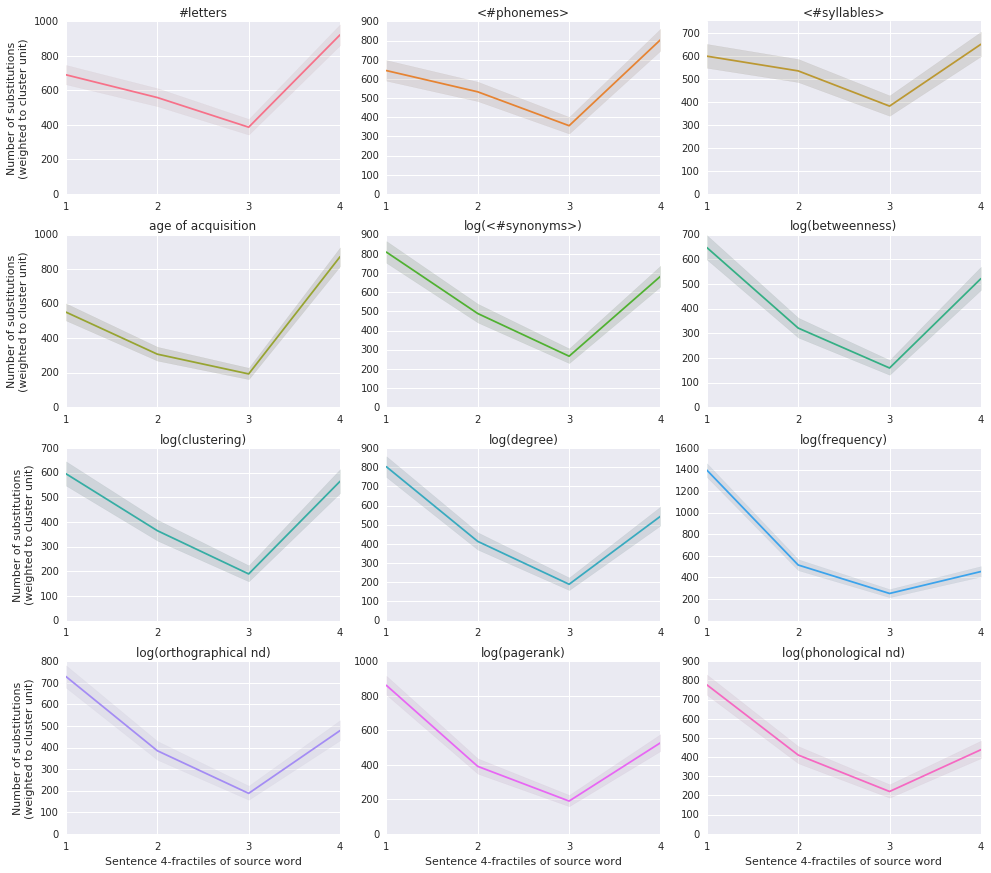

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

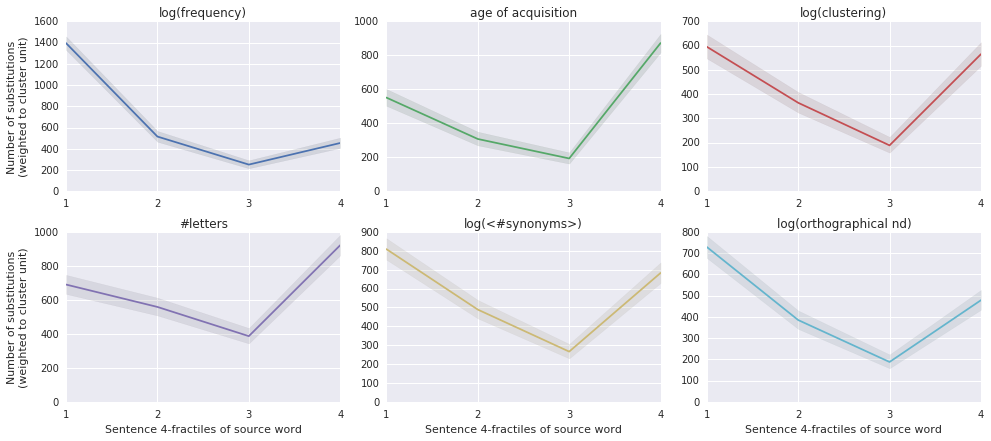

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)